In [1]:
import torch as to
import os
from tensorboardX import SummaryWriter
import time
import pandas as pd
import datetime
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
dataset_dir = '/home/ubuntu/ihor/'

In [3]:
measurements_dataset_path = os.path.join(dataset_dir, 'measurements.csv')

In [205]:
measurements_dataset = pd.read_csv(measurements_dataset_path, nrows=1000)

In [206]:
measurements_dataset['cap_time_timestamp'] = pd.to_datetime(measurements_dataset['Captured Time'], format="%Y-%m-%d %H:%M:%S")

In [207]:
cleared_measurements_dataset = measurements_dataset[pd.isnull(measurements_dataset['cap_time_timestamp']) == False].sort_values(by='cap_time_timestamp')

In [208]:
cleared_measurements_dataset

,Captured Time,Latitude,Longitude,Value,Unit,Location Name,Device ID,MD5Sum,Height,Surface,Radiation,Uploaded Time,Loader ID,cap_time_timestamp
984,2018-05-03 23:26:39,33.402649,-117.595573,38.0,celcius,NaN,300269.0,33f029490e1fd6ecf7ed9bc60abad999,41.0,NaN,NaN,2018-05-04 00:26:56.799917,NaN,2018-05-03 23:26:39
993,2018-05-03 23:26:39,33.402649,-117.595573,30.0,cpm,NaN,300262.0,e1fdbe07c669508026763483aced7887,41.0,NaN,NaN,2018-05-04 00:26:55.576305,NaN,2018-05-03 23:26:39
908,2018-05-03 23:29:30,34.483223,136.162628,55.0,cpm,NaN,300071.0,7a7b1d87bd6ea0ba63e1739cbcd4794a,519.0,NaN,NaN,2018-05-04 00:29:50.100532,NaN,2018-05-03 23:29:30
902,2018-05-03 23:29:30,34.483223,136.162628,44.0,cpm,NaN,300072.0,4cabe0efb87fb290c5c6a26d652be657,519.0,NaN,NaN,2018-05-04 00:29:51.342233,NaN,2018-05-03 23:29:30
900,2018-05-03 23:29:30,34.483223,136.162628,14.3,celcius,NaN,300079.0,9ecea8ebd077986be25e5cbbf097ff08,519.0,NaN,NaN,2018-05-04 00:29:52.559676,NaN,2018-05-03 23:29:30
837,2018-05-03 23:31:25,34.452065,-119.822136,42.6,celcius,NaN,300149.0,d5533e39162e51c4189059a073a67dd2,-1.0,NaN,NaN,2018-05-04 00:31:55.842205,NaN,2018-05-03 23:31:25
846,2018-05-03 23:31:25,34.452065,-119.822136,33.0,cpm,NaN,300142.0,ebb59fc8f84a3ef82fd47cc77d8867bd,-1.0,NaN,NaN,2018-05-04 00:31:54.616468,NaN,2018-05-03 23:31:25
856,2018-05-03 23:31:25,34.452065,-119.822136,43.0,cpm,NaN,300141.0,136ef129f8e7d327340943588fedaaa6,-1.0,NaN,NaN,2018-05-04 00:31:53.395613,NaN,2018-05-03 23:31:25
799,2018-05-03 23:32:47,34.111729,-118.255470,35.0,cpm,NaN,300171.0,3e60179ec4eae73733df1d9913f92483,121.0,NaN,NaN,2018-05-04 00:33:15.591358,NaN,2018-05-03 23:32:47
791,2018-05-03 23:32:47,34.111729,-118.255470,31.0,cpm,NaN,300172.0,fb7fa490b91d32a7cfe0189c983631da,121.0,NaN,NaN,2018-05-04 00:33:16.847165,NaN,2018-05-03 23:32:47


In [209]:
cleared_measurements_dataset['y'] = range(len(cleared_measurements_dataset))

In [210]:
from torch.utils import data
from torch.utils.data import Dataset
from torch.autograd import Variable

class NumericalDataset(Dataset):
    def __init__(self, values, labels):
        self.values = values
        self.labels = labels

    def __len__(self):
        return len(self.values)

    def __getitem__(self, num):
        x = to.Tensor([self.values[num]])
        y = self.labels[num]
        sample = {'x': x, 'y': y}

        return sample

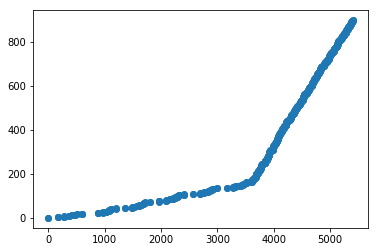

In [239]:
xs = np.array(cleared_measurements_dataset['cap_time_timestamp'].map(pd.Timestamp.timestamp).map(float))[:-100]
ys = np.array(cleared_measurements_dataset['y'])[:-100]

xs = xs - min(xs)
# xs = np.array(range(1000))
# ys = np.array(range(1000))

plt.plot(xs, ys, 'o')
plt.show()

In [248]:
minx = min(np.array(cleared_measurements_dataset['cap_time_timestamp'].map(pd.Timestamp.timestamp).map(float))[:-100])

In [240]:
xs_n = xs / np.max(xs)
ys_n = ys / np.max(ys)

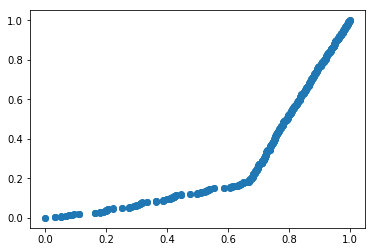

In [241]:
plt.plot(xs_n, ys_n, 'o')
plt.show()

In [242]:
import random
shuffled = list(range(len(ys)))
random.shuffle(shuffled)
xs_n[shuffled], ys_n[shuffled]

(array([0.71375671, 0.72319941, 0.87446769, 0.99240881, 0.36419182,
        0.77930013, 0.99518608, 0.88020737, 0.8144788 , 0.80614701,
        0.71283096, 0.83965932, 0.97815219, 0.75282355, 0.72023699,
        0.9389002 , 0.83873357, 0.74060359, 0.89890761, 0.18811331,
        0.31734864, 0.81003518, 0.82984632, 0.82355119, 0.80188854,
        0.87983707, 0.81355305, 0.97037586, 0.1640437 , 0.98092946,
        0.72523607, 0.97815219, 0.67839289, 0.95445288, 0.82984632,
        0.69579707, 0.89983336, 0.52138493, 0.69746343, 0.8359563 ,
        0.22218108, 0.825773  , 0.51249769, 0.75967413, 0.75041659,
        0.76097019, 0.87076467, 0.86872801, 0.74726902, 0.80947973,
        0.7009813 , 0.85613775, 0.95037956, 0.91408998, 0.74541752,
        0.2062581 , 0.81892242, 0.68376227, 0.89335308, 0.9490835 ,
        0.94575079, 0.74578782, 0.49731531, 0.74893538, 0.94112201,
        0.937419  , 0.7424551 , 0.86595075, 0.78115164, 0.2062581 ,
        0.79688946, 0.6806147 , 0.78337345, 0.75

In [243]:
input_size = 1
hidden_size = 50
# out_size = len(cleared_measurements_dataset['y'])
out_size = 1
batch_size = 4

model = to.nn.Sequential(
    to.nn.Linear(input_size, hidden_size),
    to.nn.ReLU(),
    to.nn.Linear(hidden_size, hidden_size),
    to.nn.ReLU(),
    to.nn.Linear(hidden_size, hidden_size),
    to.nn.ReLU(),
    to.nn.Linear(hidden_size, out_size),
)
summary_writer = SummaryWriter(log_dir=os.path.join('./logs_btree', str(int(time.time()))))

train_dataset = NumericalDataset(xs_n[shuffled], ys_n[shuffled])
train_loader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

train_total_batches = np.ceil(len(train_dataset) / float(batch_size))

def cuda(x):
    return x.cuda()

In [244]:
epochs = 100

loss_fn = to.nn.MSELoss(size_average=False)

learning_rate = 5e-4
# optimizer = to.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
optimizer = to.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=1e-5)

cuda(model), list(model.parameters())
10

10

In [245]:
for epoch in range(epochs):
    model.train(True)
    for i, batch in enumerate(train_loader):
        x = Variable(cuda(batch['x']))
        y = Variable(cuda(batch['y'].type(to.FloatTensor).view(-1, 1)))
        y_pred = model(x)

        # Compute and print loss.
        loss = loss_fn(y_pred, y)
        print(y_pred)
        
        if i % 100 == 0:
            print(epoch, i, loss.data[0])
            print('sample', y[0], y_pred[0])
            summary_writer.add_scalar(f'train mse loss', loss.data[0], epoch * train_total_batches + i)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
#     print(list(model.parameters()))

10

tensor([[-0.1670],
        [-0.1784],
        [-0.1795],
        [-0.1792]], device='cuda:0')
0 0 tensor(2.5692, device='cuda:0')
sample tensor(1.00000e-02 *
       [ 7.6752], device='cuda:0') tensor([-0.1670], device='cuda:0')
tensor([[-0.1692],
        [-0.1688],
        [-0.1679],
        [-0.1694]], device='cuda:0')
tensor([[-0.1517],
        [-0.1510],
        [-0.1505],
        [-0.1512]], device='cuda:0')
tensor([[-0.1241],
        [-0.1246],
        [-0.1230],
        [-0.1244]], device='cuda:0')
tensor(1.00000e-02 *
       [[-9.7225],
        [-8.8836],
        [-9.1479],
        [-8.8617]], device='cuda:0')
tensor(1.00000e-02 *
       [[-7.6430],
        [-6.7107],
        [-5.4641],
        [-5.4622]], device='cuda:0')
tensor(1.00000e-02 *
       [[-2.8750],
        [-5.2034],
        [-0.7539],
        [-2.0740]], device='cuda:0')
tensor(1.00000e-02 *
       [[ 1.9989],
        [ 0.6526],
        [-0.6325],
        [ 3.3989]], device='cuda:0')
tensor(1.00000e-02 *
       [[

/home/ubuntu/.pyenv/versions/3.6.1/envs/ihor/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  del sys.path[0]
/home/ubuntu/.pyenv/versions/3.6.1/envs/ihor/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  from ipykernel import kernelapp as app


tensor([[ 0.4983],
        [ 0.5229],
        [ 0.5168],
        [ 0.5221]], device='cuda:0')
tensor([[ 0.5252],
        [ 0.3544],
        [ 0.4836],
        [ 0.5612]], device='cuda:0')
tensor([[ 0.5066],
        [ 0.4942],
        [ 0.4958],
        [ 0.5632]], device='cuda:0')
tensor([[ 0.3497],
        [ 0.4971],
        [ 0.5159],
        [ 0.5283]], device='cuda:0')
tensor([[ 0.4779],
        [ 0.4999],
        [ 0.5109],
        [ 0.4820]], device='cuda:0')
tensor([[ 0.5192],
        [ 0.4822],
        [ 0.4720],
        [ 0.5022]], device='cuda:0')
tensor([[ 0.5368],
        [ 0.4555],
        [ 0.2755],
        [ 0.4744]], device='cuda:0')
tensor([[ 0.4835],
        [ 0.4943],
        [ 0.4746],
        [ 0.5367]], device='cuda:0')
tensor([[ 0.5037],
        [ 0.4703],
        [ 0.4658],
        [ 0.4657]], device='cuda:0')
tensor([[ 0.4917],
        [ 0.4801],
        [ 0.5148],
        [ 0.5147]], device='cuda:0')
tensor([[ 0.4934],
        [ 0.3613],
        [ 0.4940],
   

tensor([[ 0.4857],
        [ 0.5366],
        [ 0.5097],
        [ 0.4674]], device='cuda:0')
tensor([[ 0.5418],
        [ 0.4979],
        [ 0.4595],
        [ 0.2719]], device='cuda:0')
tensor([[ 0.5283],
        [ 0.4745],
        [ 0.4856],
        [ 0.4881]], device='cuda:0')
tensor([[ 0.5175],
        [ 0.4620],
        [ 0.5309],
        [ 0.5439]], device='cuda:0')
tensor([[ 0.4827],
        [ 0.4634],
        [ 0.4621],
        [ 0.4977]], device='cuda:0')
tensor([[ 0.4553],
        [ 0.4964],
        [ 0.5438],
        [ 0.4663]], device='cuda:0')
tensor([[ 0.4636],
        [ 0.4127],
        [ 0.5691],
        [ 0.5260]], device='cuda:0')
tensor([[ 0.4874],
        [ 0.3935],
        [ 0.4855],
        [ 0.3744]], device='cuda:0')
tensor([[ 0.5368],
        [ 0.5661],
        [ 0.5453],
        [ 0.3843]], device='cuda:0')
tensor([[ 0.4683],
        [ 0.4639],
        [ 0.3905],
        [ 0.5124]], device='cuda:0')
tensor([[ 0.4779],
        [ 0.4331],
        [ 0.4447],
   

tensor([[ 0.6204],
        [ 0.5265],
        [ 0.5184],
        [ 0.6141]], device='cuda:0')
tensor([[ 0.1374],
        [ 0.6920],
        [ 0.5270],
        [ 0.4966]], device='cuda:0')
tensor([[ 0.7011],
        [ 0.5579],
        [ 0.5801],
        [ 0.6564]], device='cuda:0')
tensor([[ 0.4310],
        [ 0.4775],
        [ 0.6488],
        [ 0.6570]], device='cuda:0')
tensor([[ 0.6178],
        [ 0.7105],
        [ 0.6163],
        [ 0.5071]], device='cuda:0')
tensor([[ 0.4159],
        [ 0.4827],
        [ 0.6615],
        [ 0.6011]], device='cuda:0')
tensor([[ 0.4937],
        [ 0.1376],
        [ 0.6431],
        [ 0.6318]], device='cuda:0')
tensor([[ 0.5113],
        [ 0.3572],
        [ 0.2377],
        [ 0.5130]], device='cuda:0')
tensor([[ 0.6244],
        [ 0.3436],
        [ 0.5058],
        [ 0.6172]], device='cuda:0')
tensor([[ 0.1103],
        [ 0.4836],
        [ 0.4794],
        [ 0.6784]], device='cuda:0')
tensor([[ 0.5623],
        [ 0.4728],
        [ 0.6859],
   

tensor([[ 0.5023],
        [ 0.6661],
        [ 0.7104],
        [ 0.4950]], device='cuda:0')
tensor([[ 0.4152],
        [ 0.7505],
        [ 0.5180],
        [ 0.6512]], device='cuda:0')
tensor([[-0.0888],
        [ 0.5577],
        [ 0.5840],
        [ 0.4932]], device='cuda:0')
tensor([[ 0.8002],
        [ 0.6661],
        [ 0.3803],
        [ 0.6161]], device='cuda:0')
tensor([[ 0.5853],
        [ 0.5571],
        [ 0.6535],
        [ 0.4605]], device='cuda:0')
tensor([[ 0.4904],
        [ 0.7458],
        [ 0.6890],
        [ 0.6980]], device='cuda:0')
tensor([[-0.0815],
        [ 0.5048],
        [ 0.6996],
        [ 0.4492]], device='cuda:0')
tensor([[ 0.4860],
        [ 0.5570],
        [ 0.6809],
        [ 0.4516]], device='cuda:0')
tensor([[ 0.7608],
        [ 0.5723],
        [ 0.4208],
        [ 0.3546]], device='cuda:0')
tensor([[ 0.1870],
        [ 0.6701],
        [ 0.3566],
        [ 0.7602]], device='cuda:0')
tensor([[ 0.6931],
        [ 0.4603],
        [ 0.5647],
   

tensor([[ 0.7489],
        [ 0.4861],
        [ 0.7465],
        [-0.0390]], device='cuda:0')
tensor([[ 0.0780],
        [ 0.8078],
        [ 0.7128],
        [ 0.4042]], device='cuda:0')
tensor([[ 0.5685],
        [ 0.3744],
        [ 0.7017],
        [ 0.7398]], device='cuda:0')
tensor([[-0.0022],
        [-0.0022],
        [ 0.7876],
        [ 0.8084]], device='cuda:0')
tensor([[-0.1439],
        [ 0.4046],
        [ 0.6609],
        [ 0.8035]], device='cuda:0')
tensor([[ 0.6049],
        [ 0.5600],
        [ 0.4334],
        [ 0.6386]], device='cuda:0')
tensor([[ 0.5795],
        [ 0.4559],
        [ 0.4759],
        [ 0.6876]], device='cuda:0')
tensor([[ 0.4881],
        [ 0.0770],
        [ 0.1215],
        [ 0.2279]], device='cuda:0')
tensor([[-0.0661],
        [ 0.7143],
        [ 0.8205],
        [ 0.5472]], device='cuda:0')
tensor([[ 0.4841],
        [ 0.5333],
        [ 0.6669],
        [ 0.7658]], device='cuda:0')
tensor([[-0.0618],
        [ 0.6079],
        [ 0.7221],
   

tensor([[-0.0962],
        [ 0.5985],
        [ 0.7862],
        [ 0.4645]], device='cuda:0')
tensor([[ 0.4472],
        [ 0.3287],
        [ 0.4200],
        [ 0.6608]], device='cuda:0')
tensor([[ 0.5854],
        [ 0.0325],
        [ 0.7417],
        [ 0.7934]], device='cuda:0')
tensor([[ 0.5944],
        [ 0.6495],
        [ 0.6819],
        [ 0.7267]], device='cuda:0')
tensor([[ 0.4907],
        [-0.0205],
        [ 0.3637],
        [ 0.6839]], device='cuda:0')
tensor([[ 0.6206],
        [ 0.3879],
        [ 0.4533],
        [ 0.3945]], device='cuda:0')
tensor([[ 0.4090],
        [ 0.4974],
        [ 0.5017],
        [ 0.1656]], device='cuda:0')
tensor([[-0.1397],
        [ 0.4891],
        [ 0.5071],
        [ 0.6734]], device='cuda:0')
tensor([[ 0.6178],
        [ 0.1118],
        [ 0.3518],
        [ 0.2882]], device='cuda:0')
tensor([[ 0.4735],
        [ 0.8118],
        [ 0.5794],
        [ 0.5019]], device='cuda:0')
tensor([[ 0.4038],
        [ 0.4903],
        [ 0.6450],
   

tensor([[ 0.7637],
        [ 0.7880],
        [ 0.3753],
        [-0.1495]], device='cuda:0')
tensor([[ 0.2556],
        [ 0.8530],
        [ 0.4518],
        [ 0.4778]], device='cuda:0')
tensor([[ 0.7073],
        [ 0.2335],
        [ 0.4636],
        [ 0.8419]], device='cuda:0')
tensor([[ 0.4925],
        [ 0.7471],
        [ 0.3490],
        [ 0.6787]], device='cuda:0')
tensor([[ 0.7915],
        [ 0.0775],
        [ 0.4787],
        [ 0.4780]], device='cuda:0')
tensor([[ 0.5596],
        [ 0.7198],
        [ 0.7307],
        [ 0.8286]], device='cuda:0')
tensor([[ 0.7590],
        [ 0.7856],
        [ 0.4572],
        [ 0.6130]], device='cuda:0')
tensor([[ 0.8839],
        [ 0.7011],
        [ 0.5176],
        [-0.1477]], device='cuda:0')
tensor([[ 0.8604],
        [ 0.7597],
        [ 0.8879],
        [ 0.7923]], device='cuda:0')
tensor([[ 0.7139],
        [ 0.7246],
        [ 0.7789],
        [ 0.3930]], device='cuda:0')
tensor([[ 0.4057],
        [-0.1364],
        [ 0.9089],
   

tensor([[ 0.8653],
        [ 0.8872],
        [ 0.6654],
        [-0.1395]], device='cuda:0')
tensor([[ 0.5077],
        [ 0.8154],
        [ 0.3403],
        [ 0.8141]], device='cuda:0')
tensor([[ 0.8408],
        [ 0.3799],
        [ 0.9073],
        [-0.1314]], device='cuda:0')
tensor([[ 0.3468],
        [ 0.7778],
        [ 0.6599],
        [ 0.7111]], device='cuda:0')
tensor([[ 0.1812],
        [ 0.8543],
        [ 0.3763],
        [ 0.1741]], device='cuda:0')
tensor([[ 0.8888],
        [ 0.5203],
        [ 0.9272],
        [ 0.8686]], device='cuda:0')
tensor([[ 0.8981],
        [-0.0822],
        [ 0.6440],
        [ 0.3943]], device='cuda:0')
tensor([[ 0.8811],
        [ 0.7022],
        [ 0.4358],
        [-0.0627]], device='cuda:0')
tensor([[ 0.6254],
        [ 0.7050],
        [ 0.2955],
        [ 0.8411]], device='cuda:0')
tensor([[ 0.4455],
        [ 0.6852],
        [ 0.9380],
        [ 0.5670]], device='cuda:0')
tensor([[ 0.6444],
        [ 0.9292],
        [ 0.7759],
   

tensor([[ 0.5850],
        [ 0.8047],
        [ 0.2993],
        [ 0.3195]], device='cuda:0')
tensor([[ 0.6656],
        [ 0.7557],
        [ 0.3888],
        [ 0.4951]], device='cuda:0')
tensor([[ 0.7908],
        [ 0.3455],
        [ 0.6822],
        [ 0.4059]], device='cuda:0')
tensor([[ 0.4077],
        [ 0.7892],
        [-0.0704],
        [ 0.6543]], device='cuda:0')
tensor([[ 0.2985],
        [-0.0690],
        [ 0.3293],
        [ 0.0420]], device='cuda:0')
tensor([[ 0.4403],
        [ 0.3081],
        [ 0.0381],
        [ 0.8869]], device='cuda:0')
tensor([[ 0.1275],
        [ 0.7520],
        [ 0.8414],
        [ 0.2918]], device='cuda:0')
4 200 tensor(1.00000e-02 *
       2.0451, device='cuda:0')
sample tensor([ 0.1424], device='cuda:0') tensor([ 0.1275], device='cuda:0')
tensor([[ 0.0340],
        [ 0.5611],
        [ 0.5998],
        [ 0.3875]], device='cuda:0')
tensor([[ 0.6984],
        [ 0.4749],
        [ 0.5576],
        [-0.0983]], device='cuda:0')
tensor([[ 0.8674],

tensor([[ 0.7531],
        [ 0.8818],
        [ 0.8008],
        [ 0.3003]], device='cuda:0')
tensor([[ 0.1250],
        [ 0.2862],
        [ 0.6351],
        [ 0.9163]], device='cuda:0')
tensor([[ 0.7975],
        [-0.0657],
        [ 0.5252],
        [ 0.9120]], device='cuda:0')
tensor([[ 0.4669],
        [ 0.0676],
        [ 0.6403],
        [ 0.9361]], device='cuda:0')
tensor([[ 0.3352],
        [ 0.4406],
        [ 0.5415],
        [ 0.7128]], device='cuda:0')
tensor([[ 0.7428],
        [ 0.3257],
        [ 0.8868],
        [ 0.0643]], device='cuda:0')
tensor([[ 0.4467],
        [ 0.4705],
        [ 0.9360],
        [ 0.3343]], device='cuda:0')
tensor([[ 0.4390],
        [ 0.4850],
        [ 0.7872],
        [ 0.4121]], device='cuda:0')
tensor([[ 0.6729],
        [ 0.6784],
        [-0.0322],
        [ 0.2446]], device='cuda:0')
tensor([[ 0.3766],
        [ 0.6846],
        [ 0.6986],
        [ 0.2896]], device='cuda:0')
tensor([[ 0.7840],
        [-0.0591],
        [ 0.5773],
   

tensor([[ 0.0207],
        [ 0.8711],
        [ 0.4385],
        [ 0.8441]], device='cuda:0')
tensor([[ 0.7651],
        [ 0.6112],
        [ 0.5271],
        [ 0.5542]], device='cuda:0')
tensor([[ 0.3111],
        [ 0.6923],
        [ 0.6691],
        [ 0.1384]], device='cuda:0')
tensor([[ 0.7372],
        [ 0.8389],
        [ 0.6056],
        [ 0.0106]], device='cuda:0')
tensor([[ 0.5182],
        [ 0.9288],
        [ 0.6496],
        [ 0.9483]], device='cuda:0')
tensor([[ 0.3297],
        [ 0.8160],
        [ 0.4203],
        [ 0.3702]], device='cuda:0')
tensor([[ 0.2645],
        [ 0.4691],
        [ 0.1803],
        [ 0.2279]], device='cuda:0')
tensor([[ 0.2626],
        [-0.0667],
        [ 0.4004],
        [ 0.2472]], device='cuda:0')
tensor([[ 0.3528],
        [ 0.4756],
        [ 0.2111],
        [-0.0545]], device='cuda:0')
tensor([[ 0.5606],
        [ 0.2866],
        [ 0.7317],
        [ 0.7019]], device='cuda:0')
tensor([[ 0.2141],
        [ 0.3690],
        [ 0.8965],
   

tensor([[ 0.4793],
        [ 0.7581],
        [ 0.9682],
        [ 0.8660]], device='cuda:0')
tensor([[ 0.5116],
        [ 0.9769],
        [ 0.6028],
        [ 0.6071]], device='cuda:0')
tensor([[ 0.4065],
        [ 0.0876],
        [ 0.2708],
        [-0.0448]], device='cuda:0')
tensor([[ 0.3513],
        [ 0.2204],
        [ 0.9308],
        [ 0.1510]], device='cuda:0')
tensor([[ 0.2651],
        [ 0.7477],
        [-0.0061],
        [ 0.0063]], device='cuda:0')
tensor([[ 0.1506],
        [ 0.7724],
        [ 0.3433],
        [ 0.2757]], device='cuda:0')
tensor([[ 0.9802],
        [ 0.2906],
        [ 0.2730],
        [-0.0355]], device='cuda:0')
tensor([[ 0.6713],
        [ 0.7057],
        [ 0.1447],
        [ 0.6881]], device='cuda:0')
tensor([[ 0.7559],
        [ 0.6033],
        [ 0.3161],
        [ 0.2869]], device='cuda:0')
tensor([[ 0.5031],
        [-0.0066],
        [-0.0086],
        [ 0.8972]], device='cuda:0')
tensor([[ 0.6340],
        [-0.0111],
        [ 0.3312],
   

tensor([[ 0.5545],
        [ 0.3419],
        [ 0.9940],
        [ 0.5492]], device='cuda:0')
tensor([[ 0.0308],
        [ 0.3418],
        [-0.0178],
        [ 0.6969]], device='cuda:0')
tensor([[-0.0288],
        [ 0.9245],
        [ 0.8498],
        [ 0.7729]], device='cuda:0')
tensor([[ 0.4188],
        [ 0.7449],
        [ 0.0064],
        [ 0.5654]], device='cuda:0')
tensor([[ 0.3795],
        [ 0.2146],
        [ 0.3744],
        [ 0.9380]], device='cuda:0')
tensor([[ 0.2241],
        [ 0.9000],
        [ 0.6351],
        [ 0.8638]], device='cuda:0')
tensor([[ 0.3455],
        [ 0.5596],
        [ 0.3326],
        [ 0.1472]], device='cuda:0')
tensor([[ 0.9669],
        [ 0.6568],
        [ 0.2053],
        [ 0.5021]], device='cuda:0')
tensor([[ 0.8023],
        [ 0.3394],
        [ 0.0854],
        [ 0.6477]], device='cuda:0')
tensor([[ 0.8146],
        [ 0.7127],
        [ 0.0387],
        [ 0.7920]], device='cuda:0')
tensor([[ 0.9640],
        [ 0.2397],
        [ 0.3950],
   

tensor([[ 0.2228],
        [ 0.1421],
        [ 0.2632],
        [ 0.5844]], device='cuda:0')
tensor([[ 0.9569],
        [ 0.7678],
        [ 0.3205],
        [ 0.8137]], device='cuda:0')
tensor([[ 0.2559],
        [ 0.5000],
        [ 0.4549],
        [ 0.7890]], device='cuda:0')
tensor([[ 0.4206],
        [ 0.1337],
        [ 0.6055],
        [ 0.9604]], device='cuda:0')
7 200 tensor(1.00000e-04 *
       1.9577, device='cuda:0')
sample tensor([ 0.4260], device='cuda:0') tensor([ 0.4206], device='cuda:0')
tensor([[ 0.9515],
        [ 0.3227],
        [ 0.9063],
        [ 0.0179]], device='cuda:0')
tensor([[ 0.6063],
        [ 0.3341],
        [ 0.7060],
        [ 0.2476]], device='cuda:0')
tensor([[ 0.9379],
        [ 0.5032],
        [ 0.3329],
        [ 0.8072]], device='cuda:0')
tensor([[ 0.2485],
        [ 0.9835],
        [ 0.6374],
        [ 0.1485]], device='cuda:0')
tensor([[ 0.2691],
        [ 0.3316],
        [ 0.9261],
        [ 0.5040]], device='cuda:0')
tensor([[ 0.2532],

tensor([[ 0.2667],
        [ 0.6246],
        [ 0.6036],
        [ 0.4947]], device='cuda:0')
tensor([[ 0.0491],
        [ 0.6837],
        [ 0.6035],
        [ 0.3393]], device='cuda:0')
tensor([[ 0.8034],
        [-0.0144],
        [ 0.8823],
        [ 0.2365]], device='cuda:0')
tensor([[ 0.9127],
        [ 0.2469],
        [ 0.0733],
        [ 0.9221]], device='cuda:0')
tensor([[ 0.2108],
        [ 0.4432],
        [ 0.1462],
        [ 0.9292]], device='cuda:0')
tensor([[ 0.6470],
        [ 0.4291],
        [ 0.3227],
        [ 0.4732]], device='cuda:0')
tensor([[ 0.7194],
        [ 0.8535],
        [ 0.7216],
        [ 0.7692]], device='cuda:0')
tensor([[ 0.4026],
        [ 0.5899],
        [-0.0140],
        [ 0.4692]], device='cuda:0')
tensor([[ 0.7471],
        [ 0.1992],
        [ 0.5900],
        [ 0.0450]], device='cuda:0')
tensor([[ 0.7966],
        [ 0.2786],
        [ 0.6331],
        [ 0.9806]], device='cuda:0')
tensor([[ 0.8964],
        [ 0.7827],
        [ 0.6749],
   

tensor([[ 0.4453],
        [ 0.2720],
        [ 0.2526],
        [ 0.6338]], device='cuda:0')
tensor([[ 0.6944],
        [ 0.2555],
        [ 0.8992],
        [ 0.5995]], device='cuda:0')
tensor([[ 0.5076],
        [ 0.2507],
        [ 0.7445],
        [ 0.7051]], device='cuda:0')
tensor([[ 0.4508],
        [ 0.0856],
        [ 0.4028],
        [ 0.2090]], device='cuda:0')
tensor([[ 0.8107],
        [ 0.7433],
        [ 0.9143],
        [ 0.6488]], device='cuda:0')
tensor([[ 0.6444],
        [ 0.5363],
        [ 0.1347],
        [ 0.7141]], device='cuda:0')
tensor([[ 0.7811],
        [ 0.1839],
        [ 0.0771],
        [-0.0087]], device='cuda:0')
tensor([[ 0.7812],
        [ 0.7504],
        [ 0.4199],
        [ 0.3697]], device='cuda:0')
tensor([[ 0.0596],
        [ 0.4440],
        [ 0.3705],
        [ 0.9916]], device='cuda:0')
tensor([[ 0.3722],
        [ 0.6874],
        [ 0.4336],
        [ 0.5461]], device='cuda:0')
tensor([[ 0.7722],
        [ 0.0746],
        [ 0.9852],
   

tensor([[ 0.8982],
        [ 0.0544],
        [ 0.8803],
        [ 0.0652]], device='cuda:0')
tensor([[ 0.3074],
        [ 0.6800],
        [ 0.9473],
        [ 0.4146]], device='cuda:0')
tensor([[ 0.2701],
        [ 0.4069],
        [-0.0219],
        [ 0.3934]], device='cuda:0')
9 100 tensor(1.00000e-04 *
       7.0100, device='cuda:0')
sample tensor([ 0.2570], device='cuda:0') tensor([ 0.2701], device='cuda:0')
tensor([[ 0.4431],
        [ 0.1291],
        [ 0.2307],
        [ 0.0061]], device='cuda:0')
tensor([[ 0.9909],
        [ 0.3298],
        [ 0.7135],
        [ 0.3995]], device='cuda:0')
tensor([[ 0.4062],
        [ 0.1278],
        [ 0.9804],
        [ 0.1011]], device='cuda:0')
tensor([[ 0.8470],
        [ 0.3198],
        [ 0.2784],
        [ 0.1013]], device='cuda:0')
tensor([[ 0.9453],
        [ 0.8502],
        [ 0.0810],
        [ 0.4010]], device='cuda:0')
tensor([[ 0.9966],
        [ 0.9966],
        [ 0.5136],
        [ 0.6710]], device='cuda:0')
tensor([[ 0.8259],

tensor([[ 0.0515],
        [ 0.8403],
        [ 0.2657],
        [ 0.4362]], device='cuda:0')
tensor([[ 0.8725],
        [ 0.3097],
        [ 0.2935],
        [ 0.2708]], device='cuda:0')
tensor([[ 0.1991],
        [-0.0013],
        [ 0.2146],
        [ 0.9475]], device='cuda:0')
tensor([[ 0.6674],
        [ 0.1256],
        [ 0.4264],
        [ 0.3258]], device='cuda:0')
tensor([[ 0.4351],
        [ 0.7676],
        [ 0.5001],
        [ 0.4307]], device='cuda:0')
tensor([[ 0.4220],
        [ 0.2745],
        [ 0.6454],
        [ 0.9247]], device='cuda:0')
tensor([[ 0.7413],
        [ 0.9332],
        [ 0.9521],
        [ 0.7069]], device='cuda:0')
tensor([[ 0.5340],
        [ 0.6083],
        [ 0.2739],
        [ 0.2787]], device='cuda:0')
tensor([[ 0.6923],
        [ 0.5132],
        [ 0.3378],
        [ 0.6119]], device='cuda:0')
tensor([[ 0.6827],
        [ 0.4149],
        [ 0.3789],
        [ 0.9377]], device='cuda:0')
tensor([[ 0.7459],
        [ 0.0709],
        [ 0.9230],
   

tensor([[ 0.9052],
        [ 0.3154],
        [ 0.3287],
        [ 0.9496]], device='cuda:0')
tensor([[ 0.6319],
        [ 0.1422],
        [ 0.7061],
        [ 0.2185]], device='cuda:0')
tensor([[ 0.0760],
        [ 0.9069],
        [ 0.7991],
        [ 0.8918]], device='cuda:0')
tensor([[ 0.5707],
        [ 0.6745],
        [ 0.0296],
        [ 0.4832]], device='cuda:0')
tensor([[ 0.2238],
        [ 0.3178],
        [-0.0110],
        [ 0.1788]], device='cuda:0')
tensor([[ 0.0833],
        [ 0.3666],
        [ 0.3820],
        [ 0.2702]], device='cuda:0')
tensor([[ 0.5984],
        [ 0.2161],
        [ 0.2647],
        [ 0.8680]], device='cuda:0')
tensor([[ 0.8053],
        [ 0.4011],
        [ 0.0392],
        [ 0.2981]], device='cuda:0')
tensor([[ 0.3562],
        [ 0.1317],
        [ 0.9571],
        [ 0.3681]], device='cuda:0')
tensor([[ 0.0641],
        [ 0.4426],
        [ 0.3119],
        [ 0.0560]], device='cuda:0')
tensor([[ 0.4638],
        [ 0.4251],
        [ 0.0873],
   

tensor([[ 0.7463],
        [ 0.9561],
        [ 0.6857],
        [ 0.8182]], device='cuda:0')
tensor([[ 0.2708],
        [ 0.8820],
        [ 0.1232],
        [ 0.8874]], device='cuda:0')
tensor([[ 0.7836],
        [ 0.4381],
        [ 0.3192],
        [ 0.1965]], device='cuda:0')
tensor([[ 0.0829],
        [ 0.6332],
        [ 0.0606],
        [ 0.8505]], device='cuda:0')
tensor([[ 0.7472],
        [ 0.1008],
        [ 0.5530],
        [ 0.3285]], device='cuda:0')
tensor([[ 0.7498],
        [ 0.0122],
        [ 0.9110],
        [ 0.0364]], device='cuda:0')
tensor([[ 0.5798],
        [ 0.0625],
        [ 0.2284],
        [ 0.0605]], device='cuda:0')
tensor([[ 0.8492],
        [ 0.0650],
        [ 0.3315],
        [ 0.3032]], device='cuda:0')
tensor([[ 0.8202],
        [ 0.0696],
        [ 0.9153],
        [ 0.3770]], device='cuda:0')
tensor([[ 0.6898],
        [ 0.7856],
        [ 0.8807],
        [ 0.7526]], device='cuda:0')
tensor([[ 0.8179],
        [ 0.6856],
        [ 0.0131],
   

tensor([[ 0.2239],
        [ 0.7489],
        [ 0.7194],
        [ 0.7949]], device='cuda:0')
tensor([[ 0.2511],
        [ 0.9343],
        [ 0.9909],
        [ 0.8463]], device='cuda:0')
tensor([[ 0.0348],
        [ 0.6857],
        [ 0.4575],
        [ 0.9358]], device='cuda:0')
tensor([[ 0.6019],
        [ 0.5314],
        [ 0.9377],
        [ 0.9328]], device='cuda:0')
tensor([[ 0.8373],
        [ 0.7726],
        [ 0.6881],
        [ 0.0564]], device='cuda:0')
tensor([[ 0.2284],
        [ 0.9271],
        [ 0.1384],
        [ 0.9458]], device='cuda:0')
tensor([[ 0.6473],
        [ 0.6078],
        [ 0.0605],
        [ 0.3133]], device='cuda:0')
tensor([[ 0.8885],
        [ 0.2238],
        [ 0.1922],
        [ 0.4379]], device='cuda:0')
tensor([[ 0.7482],
        [ 0.3761],
        [ 0.1851],
        [ 0.3845]], device='cuda:0')
tensor([[ 0.5448],
        [ 0.0289],
        [ 0.6399],
        [ 0.0823]], device='cuda:0')
tensor([[ 0.0986],
        [ 0.3707],
        [ 0.9536],
   

tensor([[ 0.8767],
        [ 0.5700],
        [ 0.9765],
        [ 0.7295]], device='cuda:0')
tensor([[ 0.5589],
        [ 0.7144],
        [ 0.9672],
        [ 0.7171]], device='cuda:0')
tensor([[ 0.3667],
        [ 0.8666],
        [ 0.2644],
        [ 0.7153]], device='cuda:0')
tensor([[ 0.9482],
        [ 0.7422],
        [ 0.3596],
        [ 0.2635]], device='cuda:0')
tensor([[ 0.5045],
        [ 0.3134],
        [ 0.1315],
        [ 0.3605]], device='cuda:0')
tensor([[ 0.9558],
        [ 0.2299],
        [ 0.3611],
        [ 0.6006]], device='cuda:0')
tensor([[ 0.2066],
        [ 0.6039],
        [ 0.3229],
        [ 0.1840]], device='cuda:0')
tensor([[ 0.0663],
        [ 0.7986],
        [ 0.1277],
        [ 0.5941]], device='cuda:0')
tensor([[ 0.5717],
        [ 0.4420],
        [ 0.3109],
        [ 0.3282]], device='cuda:0')
tensor([[ 0.2358],
        [ 0.9429],
        [ 0.1908],
        [ 0.4060]], device='cuda:0')
tensor([[ 0.4638],
        [ 0.8745],
        [ 0.6035],
   

tensor([[ 0.2054],
        [ 0.7750],
        [ 0.1127],
        [ 0.0972]], device='cuda:0')
tensor([[ 0.4664],
        [ 0.3610],
        [ 0.9511],
        [ 0.4056]], device='cuda:0')
tensor([[ 0.4256],
        [ 0.7762],
        [ 0.5572],
        [ 0.9925]], device='cuda:0')
tensor([[ 0.4608],
        [ 0.8407],
        [ 0.8712],
        [ 0.4367]], device='cuda:0')
tensor([[ 0.4981],
        [ 0.6069],
        [ 0.6777],
        [ 0.3272]], device='cuda:0')
tensor([[ 0.8129],
        [ 0.5979],
        [ 0.4923],
        [ 0.4086]], device='cuda:0')
tensor([[ 0.1557],
        [ 0.5867],
        [ 0.9937],
        [ 0.2633]], device='cuda:0')
tensor([[ 0.2997],
        [ 0.6375],
        [ 0.0917],
        [ 0.1810]], device='cuda:0')
tensor([[ 0.9093],
        [ 0.6419],
        [ 0.0188],
        [ 0.7240]], device='cuda:0')
tensor([[ 0.7759],
        [ 0.5250],
        [-0.0009],
        [ 0.0914]], device='cuda:0')
tensor([[ 0.3339],
        [ 0.5499],
        [ 0.5336],
   

tensor([[ 0.3607],
        [ 0.9592],
        [ 0.3227],
        [ 0.8678]], device='cuda:0')
tensor([[ 0.3680],
        [ 0.6086],
        [ 0.3313],
        [ 0.4119]], device='cuda:0')
tensor([[ 0.1733],
        [ 0.4572],
        [ 0.0932],
        [ 0.0330]], device='cuda:0')
tensor([[ 0.9841],
        [ 0.0677],
        [ 0.6577],
        [ 0.5851]], device='cuda:0')
tensor([[ 0.4667],
        [ 0.2657],
        [ 0.7752],
        [ 0.5020]], device='cuda:0')
tensor([[ 0.2057],
        [ 0.4962],
        [ 0.1881],
        [ 0.5379]], device='cuda:0')
tensor([[ 0.2060],
        [ 0.4100],
        [ 0.0207],
        [ 0.8155]], device='cuda:0')
tensor([[ 0.9886],
        [ 0.8214],
        [ 0.7489],
        [ 0.3984]], device='cuda:0')
tensor([[ 0.0604],
        [ 0.6137],
        [ 0.9355],
        [ 0.5589]], device='cuda:0')
tensor([[ 0.7771],
        [ 0.7289],
        [ 0.3668],
        [ 0.8889]], device='cuda:0')
tensor([[ 0.8238],
        [ 0.6795],
        [ 0.6565],
   

tensor([[ 0.9328],
        [ 0.2624],
        [ 0.7886],
        [ 0.3251]], device='cuda:0')
tensor([[ 0.0671],
        [ 0.5291],
        [ 0.7103],
        [ 0.4420]], device='cuda:0')
tensor([[ 0.5534],
        [ 0.4146],
        [ 0.3560],
        [ 0.5850]], device='cuda:0')
tensor([[ 0.5032],
        [ 0.4492],
        [ 0.8881],
        [ 0.1360]], device='cuda:0')
tensor([[ 0.3937],
        [ 0.8157],
        [ 0.3624],
        [ 0.5502]], device='cuda:0')
tensor([[ 0.3341],
        [ 0.0723],
        [ 0.3869],
        [ 0.0367]], device='cuda:0')
tensor([[ 0.0162],
        [ 0.4387],
        [ 0.3428],
        [ 0.1341]], device='cuda:0')
tensor([[ 0.5362],
        [ 0.4968],
        [ 0.9068],
        [ 0.3145]], device='cuda:0')
tensor([[ 0.6528],
        [ 0.6855],
        [ 0.1236],
        [ 0.5595]], device='cuda:0')
tensor([[ 0.2653],
        [ 0.2702],
        [ 0.3267],
        [ 0.8875]], device='cuda:0')
tensor([[ 1.0003],
        [ 0.4329],
        [ 0.3339],
   

tensor([[ 0.8908],
        [ 0.7478],
        [ 0.3620],
        [ 0.3154]], device='cuda:0')
tensor([[ 0.5628],
        [ 0.5526],
        [ 0.0418],
        [ 0.1327]], device='cuda:0')
tensor([[ 0.6968],
        [ 0.0107],
        [ 0.5216],
        [ 0.8266]], device='cuda:0')
tensor([[ 0.8056],
        [ 0.1298],
        [ 0.0614],
        [ 0.3328]], device='cuda:0')
tensor([[ 0.3137],
        [ 0.3899],
        [ 0.3146],
        [ 0.6381]], device='cuda:0')
tensor([[ 0.5474],
        [ 0.5324],
        [ 0.4987],
        [ 0.1669]], device='cuda:0')
tensor([[ 0.9161],
        [ 0.9875],
        [ 0.1190],
        [ 0.3385]], device='cuda:0')
tensor([[ 0.9080],
        [ 0.0310],
        [ 0.1995],
        [ 0.5570]], device='cuda:0')
tensor([[ 0.1344],
        [ 0.1109],
        [ 0.1771],
        [ 0.7446]], device='cuda:0')
tensor([[ 0.5128],
        [ 0.2682],
        [ 0.5123],
        [ 0.7407]], device='cuda:0')
tensor([[ 0.5010],
        [ 0.1800],
        [ 0.8708],
   

tensor([[ 0.9674],
        [ 0.3873],
        [ 0.8472],
        [ 0.6048]], device='cuda:0')
tensor([[ 0.5057],
        [ 0.4616],
        [ 0.3625],
        [ 0.7731]], device='cuda:0')
tensor([[ 0.3211],
        [ 0.2593],
        [ 0.0597],
        [ 0.7527]], device='cuda:0')
tensor([[ 0.1027],
        [ 0.5817],
        [ 0.3852],
        [ 0.8369]], device='cuda:0')
tensor([[ 0.0321],
        [ 0.9975],
        [ 0.9899],
        [ 0.0358]], device='cuda:0')
tensor([[ 0.8102],
        [ 0.3290],
        [ 0.6327],
        [ 0.2618]], device='cuda:0')
tensor([[ 0.5705],
        [ 0.1426],
        [ 0.8116],
        [ 0.7336]], device='cuda:0')
tensor([[ 0.8250],
        [ 0.3941],
        [ 0.6736],
        [ 0.4098]], device='cuda:0')
tensor([[ 0.1253],
        [ 0.3531],
        [ 0.9694],
        [ 0.8804]], device='cuda:0')
tensor([[ 0.7285],
        [ 0.6960],
        [ 0.6789],
        [ 0.4231]], device='cuda:0')
tensor([[ 0.2986],
        [ 0.9633],
        [ 0.3596],
   

tensor([[ 0.2678],
        [ 0.5030],
        [ 0.8737],
        [ 0.4405]], device='cuda:0')
16 0 tensor(1.00000e-04 *
       4.3871, device='cuda:0')
sample tensor([ 0.2681], device='cuda:0') tensor([ 0.2678], device='cuda:0')
tensor([[ 0.9077],
        [ 0.4210],
        [ 0.1445],
        [ 0.9858]], device='cuda:0')
tensor([[ 0.9150],
        [ 0.4601],
        [ 0.3888],
        [ 0.3233]], device='cuda:0')
tensor([[ 0.3092],
        [ 0.4653],
        [ 0.9154],
        [ 0.1809]], device='cuda:0')
tensor([[ 0.6365],
        [ 0.2703],
        [ 0.0068],
        [ 0.3560]], device='cuda:0')
tensor([[ 0.9540],
        [ 0.0555],
        [ 0.7337],
        [ 0.3832]], device='cuda:0')
tensor([[ 0.8187],
        [ 0.3632],
        [ 0.6059],
        [ 0.6420]], device='cuda:0')
tensor([[ 0.5909],
        [ 0.1383],
        [ 0.4155],
        [ 0.9560]], device='cuda:0')
tensor([[ 0.1805],
        [ 0.2425],
        [ 0.3278],
        [ 0.5600]], device='cuda:0')
tensor([[ 0.3960],


tensor([[ 0.9129],
        [ 0.7758],
        [ 0.3537],
        [ 0.4837]], device='cuda:0')
tensor([[ 0.6432],
        [ 0.7240],
        [ 0.4074],
        [ 0.7425]], device='cuda:0')
tensor([[ 0.0673],
        [ 0.6846],
        [ 0.6512],
        [ 0.3224]], device='cuda:0')
16 100 tensor(1.00000e-04 *
       1.4972, device='cuda:0')
sample tensor(1.00000e-02 *
       [ 7.3415], device='cuda:0') tensor(1.00000e-02 *
       [ 6.7262], device='cuda:0')
tensor([[ 0.8722],
        [ 0.9822],
        [ 0.2602],
        [ 0.8067]], device='cuda:0')
tensor([[ 0.0400],
        [ 0.3338],
        [ 0.5268],
        [ 0.2701]], device='cuda:0')
tensor([[ 0.8483],
        [ 0.9795],
        [ 0.9180],
        [ 0.0657]], device='cuda:0')
tensor([[ 0.7763],
        [ 0.3102],
        [ 0.0610],
        [ 0.9896]], device='cuda:0')
tensor([[ 0.0129],
        [ 0.9935],
        [ 0.5118],
        [ 0.4622]], device='cuda:0')
tensor([[ 0.7364],
        [ 0.8433],
        [ 0.2458],
        [ 0.

tensor([[ 0.6040],
        [ 0.9013],
        [ 0.3952],
        [ 0.4447]], device='cuda:0')
tensor([[ 0.1999],
        [ 0.8562],
        [ 0.3644],
        [ 0.7681]], device='cuda:0')
tensor([[ 0.2228],
        [ 0.7063],
        [ 0.5178],
        [ 0.9653]], device='cuda:0')
tensor([[ 0.6772],
        [ 0.8223],
        [ 0.7120],
        [ 0.7156]], device='cuda:0')
tensor([[ 0.6119],
        [ 0.7136],
        [ 0.6774],
        [ 0.4018]], device='cuda:0')
tensor([[ 0.2377],
        [ 0.0963],
        [ 0.6405],
        [ 0.3124]], device='cuda:0')
tensor([[ 0.3608],
        [ 0.5824],
        [ 0.6011],
        [ 0.0416]], device='cuda:0')
tensor([[ 0.9576],
        [ 0.2612],
        [ 0.8878],
        [ 0.6501]], device='cuda:0')
tensor([[ 0.3758],
        [ 0.2577],
        [ 0.9933],
        [ 0.1253]], device='cuda:0')
tensor([[ 0.9310],
        [ 0.5347],
        [ 0.4598],
        [ 0.1975]], device='cuda:0')
tensor([[ 0.5607],
        [ 0.3210],
        [ 1.0012],
   

tensor([[ 0.8183],
        [ 0.5340],
        [ 0.9532],
        [ 0.4940]], device='cuda:0')
tensor([[ 0.8112],
        [ 0.4093],
        [ 0.6445],
        [ 0.8365]], device='cuda:0')
tensor([[ 0.6422],
        [ 0.8823],
        [ 0.6020],
        [ 0.2647]], device='cuda:0')
tensor([[ 0.0545],
        [ 0.2570],
        [ 0.1851],
        [ 0.8865]], device='cuda:0')
tensor([[ 0.8233],
        [ 0.7451],
        [ 0.5075],
        [ 0.8922]], device='cuda:0')
tensor([[ 1.0038],
        [ 0.8214],
        [ 0.5780],
        [ 0.4656]], device='cuda:0')
tensor([[ 0.0997],
        [ 0.3620],
        [ 0.0883],
        [ 0.5773]], device='cuda:0')
tensor([[ 0.4455],
        [ 0.8691],
        [ 0.6598],
        [ 0.7837]], device='cuda:0')
tensor([[ 0.1802],
        [ 0.6097],
        [ 0.4160],
        [ 0.3138]], device='cuda:0')
tensor([[ 0.0372],
        [ 0.7191],
        [ 0.2003],
        [ 0.5404]], device='cuda:0')
tensor([[ 0.5382],
        [ 0.6429],
        [ 0.4115],
   

tensor([[ 0.8119],
        [ 0.1824],
        [ 0.8074],
        [ 0.1316]], device='cuda:0')
tensor([[ 0.7678],
        [ 0.2568],
        [ 0.1732],
        [ 0.8175]], device='cuda:0')
tensor([[ 0.2091],
        [ 0.3044],
        [ 0.6397],
        [ 0.0113]], device='cuda:0')
tensor([[ 0.0637],
        [ 0.0927],
        [ 0.4578],
        [ 0.6038]], device='cuda:0')
tensor([[ 0.0961],
        [ 0.7921],
        [ 0.3523],
        [ 0.0784]], device='cuda:0')
tensor([[ 0.4959],
        [ 0.0050],
        [ 0.1028],
        [ 0.5770]], device='cuda:0')
tensor([[ 0.9847],
        [ 0.3973],
        [ 0.3937],
        [ 0.2157]], device='cuda:0')
tensor([[ 0.2213],
        [ 0.6072],
        [ 0.7188],
        [ 0.6326]], device='cuda:0')
tensor([[ 0.8142],
        [ 0.0656],
        [ 0.8807],
        [ 0.2099]], device='cuda:0')
tensor([[ 0.4569],
        [ 0.4214],
        [ 0.5475],
        [ 0.4083]], device='cuda:0')
tensor([[ 0.5808],
        [ 0.5377],
        [ 0.8520],
   

tensor([[ 0.9035],
        [ 0.0390],
        [ 0.8819],
        [ 0.1301]], device='cuda:0')
tensor([[ 0.4117],
        [ 0.9070],
        [ 0.2603],
        [ 0.4747]], device='cuda:0')
tensor([[ 0.2415],
        [ 0.0975],
        [ 0.4705],
        [ 0.6467]], device='cuda:0')
tensor([[ 0.1816],
        [ 0.8196],
        [ 0.7030],
        [ 0.8822]], device='cuda:0')
tensor([[ 0.7163],
        [ 0.0664],
        [ 0.3004],
        [ 0.1818]], device='cuda:0')
tensor([[ 0.2960],
        [ 0.2640],
        [ 0.5784],
        [ 0.6858]], device='cuda:0')
tensor([[ 0.1227],
        [ 0.3351],
        [ 0.1035],
        [ 0.5524]], device='cuda:0')
tensor([[ 0.3176],
        [ 0.0377],
        [ 0.1684],
        [ 0.9511]], device='cuda:0')
tensor([[ 0.1204],
        [ 0.3901],
        [ 0.6860],
        [ 0.3044]], device='cuda:0')
tensor([[ 0.3389],
        [ 0.7133],
        [ 0.1284],
        [ 0.2664]], device='cuda:0')
tensor([[ 0.4340],
        [ 0.8766],
        [ 0.3088],
   

tensor([[ 0.2585],
        [ 0.9932],
        [ 0.0061],
        [ 0.5384]], device='cuda:0')
tensor([[ 0.3224],
        [ 0.2332],
        [ 0.4428],
        [ 0.2949]], device='cuda:0')
tensor([[ 0.8701],
        [ 0.8854],
        [ 1.0020],
        [ 0.6327]], device='cuda:0')
tensor([[ 0.8455],
        [ 0.8253],
        [ 0.0968],
        [ 0.5903]], device='cuda:0')
tensor([[ 0.7736],
        [ 0.2606],
        [ 0.1967],
        [ 0.1813]], device='cuda:0')
tensor([[ 0.3055],
        [ 0.2681],
        [ 0.4792],
        [ 0.6022]], device='cuda:0')
tensor([[ 0.1359],
        [ 0.5275],
        [ 0.4453],
        [ 0.6891]], device='cuda:0')
tensor([[ 0.4456],
        [ 0.7400],
        [ 0.9790],
        [ 0.6713]], device='cuda:0')
tensor([[ 0.3231],
        [ 0.4986],
        [ 0.2236],
        [ 0.5334]], device='cuda:0')
tensor([[ 0.4942],
        [ 0.7378],
        [ 0.1843],
        [ 0.7469]], device='cuda:0')
tensor([[ 0.6926],
        [ 0.3990],
        [ 0.4955],
   

tensor([[ 0.6128],
        [ 0.8538],
        [ 0.2692],
        [ 0.5616]], device='cuda:0')
tensor([[ 0.3619],
        [ 0.6347],
        [ 0.2626],
        [ 0.9242]], device='cuda:0')
tensor([[ 0.3611],
        [ 0.5359],
        [ 0.7211],
        [ 0.7758]], device='cuda:0')
tensor([[ 0.8083],
        [ 0.4429],
        [ 0.9214],
        [ 0.8840]], device='cuda:0')
tensor([[ 0.4070],
        [ 0.8008],
        [ 0.6544],
        [ 0.1803]], device='cuda:0')
tensor([[ 0.7818],
        [ 0.2180],
        [ 0.4633],
        [ 0.6308]], device='cuda:0')
18 200 tensor(1.00000e-04 *
       3.0929, device='cuda:0')
sample tensor([ 0.7864], device='cuda:0') tensor([ 0.7818], device='cuda:0')
tensor([[ 0.8828],
        [ 0.0908],
        [ 0.8098],
        [ 0.4143]], device='cuda:0')
tensor([[ 0.6746],
        [ 0.0908],
        [ 0.3631],
        [ 0.4227]], device='cuda:0')
tensor([[ 0.6057],
        [ 0.4572],
        [ 0.6962],
        [ 0.5197]], device='cuda:0')
tensor([[ 0.3776]

tensor([[ 0.5327],
        [ 0.0679],
        [ 0.0117],
        [ 0.0160]], device='cuda:0')
tensor([[ 0.5141],
        [ 0.9822],
        [ 0.4048],
        [ 0.3868]], device='cuda:0')
tensor([[ 0.9346],
        [ 0.1739],
        [ 0.6744],
        [ 0.0649]], device='cuda:0')
tensor([[ 0.7340],
        [ 0.7966],
        [ 0.1847],
        [ 0.2992]], device='cuda:0')
tensor([[ 0.7097],
        [ 0.0204],
        [ 0.2933],
        [ 0.4645]], device='cuda:0')
tensor([[ 0.0919],
        [ 0.0122],
        [ 0.0872],
        [ 0.3890]], device='cuda:0')
tensor([[ 0.9846],
        [ 0.3632],
        [ 1.0022],
        [ 0.0151]], device='cuda:0')
tensor([[ 0.1993],
        [ 0.0437],
        [ 0.0598],
        [ 0.0995]], device='cuda:0')
tensor([[ 0.1148],
        [ 0.5727],
        [ 0.2405],
        [ 0.6830]], device='cuda:0')
tensor([[ 0.7689],
        [ 0.8225],
        [ 0.6940],
        [ 0.6940]], device='cuda:0')
tensor([[ 0.9307],
        [ 0.4132],
        [ 0.7238],
   

tensor([[ 0.9972],
        [ 0.0540],
        [ 0.6025],
        [ 0.7956]], device='cuda:0')
tensor([[ 0.9840],
        [ 0.6546],
        [ 0.4350],
        [ 0.7288]], device='cuda:0')
tensor([[ 0.1370],
        [ 0.6078],
        [ 0.4597],
        [ 0.7151]], device='cuda:0')
tensor([[ 0.1573],
        [ 0.2484],
        [ 0.6069],
        [ 0.1345]], device='cuda:0')
tensor([[ 0.8130],
        [ 0.9000],
        [ 0.4966],
        [ 0.1339]], device='cuda:0')
tensor([[ 0.3843],
        [ 0.3138],
        [ 0.2447],
        [ 0.9839]], device='cuda:0')
tensor([[ 0.1693],
        [ 0.6028],
        [ 0.3383],
        [ 0.8973]], device='cuda:0')
tensor([[ 0.0939],
        [ 0.1669],
        [ 0.5758],
        [ 0.2652]], device='cuda:0')
tensor([[ 0.1959],
        [ 0.5371],
        [ 0.7095],
        [ 0.0469]], device='cuda:0')
tensor([[ 0.9897],
        [ 0.1371],
        [ 0.2590],
        [ 0.7458]], device='cuda:0')
tensor([[ 0.9480],
        [ 0.3581],
        [ 0.9195],
   

tensor([[ 0.8908],
        [ 0.2987],
        [ 0.9296],
        [ 0.2593]], device='cuda:0')
tensor([[ 0.5592],
        [ 0.3787],
        [ 0.3290],
        [ 0.0403]], device='cuda:0')
tensor([[ 0.4613],
        [ 0.9830],
        [ 0.1440],
        [ 0.0199]], device='cuda:0')
tensor([[ 0.5593],
        [ 0.1140],
        [ 0.4901],
        [ 0.1974]], device='cuda:0')
tensor([[ 0.3253],
        [ 0.1325],
        [ 0.2254],
        [ 0.4639]], device='cuda:0')
tensor([[ 0.7285],
        [ 0.9360],
        [ 0.4744],
        [ 0.6933]], device='cuda:0')
tensor([[ 0.1854],
        [ 0.5779],
        [ 0.8609],
        [ 0.6336]], device='cuda:0')
tensor([[ 0.6436],
        [ 0.8879],
        [ 0.2459],
        [ 0.1324]], device='cuda:0')
tensor([[ 0.3957],
        [ 0.6959],
        [ 0.7848],
        [ 0.0438]], device='cuda:0')
tensor([[ 0.3209],
        [ 0.0876],
        [ 0.9214],
        [ 0.2865]], device='cuda:0')
tensor([[ 0.3900],
        [ 0.0433],
        [ 0.4425],
   

tensor([[ 0.6873],
        [ 0.9069],
        [ 0.9968],
        [ 0.2015]], device='cuda:0')
tensor([[ 0.0685],
        [ 0.0987],
        [ 0.9258],
        [ 0.8878]], device='cuda:0')
tensor([[ 0.0012],
        [ 0.7492],
        [ 0.6369],
        [ 0.5414]], device='cuda:0')
tensor([[ 0.1865],
        [ 0.0974],
        [ 0.9948],
        [ 0.7476]], device='cuda:0')
tensor([[ 0.9851],
        [ 0.5598],
        [ 0.4147],
        [ 0.7145]], device='cuda:0')
tensor([[ 0.9132],
        [ 0.5244],
        [ 0.3312],
        [ 0.4049]], device='cuda:0')
tensor([[ 0.3967],
        [ 0.8156],
        [ 0.1970],
        [ 0.4000]], device='cuda:0')
tensor([[ 0.5394],
        [ 0.5069],
        [ 0.7821],
        [ 0.8985]], device='cuda:0')
tensor([[ 0.8184],
        [ 0.8135],
        [ 0.2810],
        [ 0.6975]], device='cuda:0')
tensor([[ 0.8788],
        [ 0.6555],
        [ 0.9709],
        [ 0.2597]], device='cuda:0')
tensor([[ 0.2209],
        [ 0.4989],
        [ 0.3579],
   

tensor([[ 0.9489],
        [ 0.1234],
        [ 0.1666],
        [ 0.7463]], device='cuda:0')
tensor([[ 0.3986],
        [ 0.3769],
        [ 0.6930],
        [ 0.6083]], device='cuda:0')
tensor([[ 0.0992],
        [ 0.4298],
        [ 0.7737],
        [ 0.7967]], device='cuda:0')
tensor([[ 0.1215],
        [ 0.9485],
        [ 0.2286],
        [ 0.2838]], device='cuda:0')
tensor([[ 0.5025],
        [ 0.4594],
        [ 0.6565],
        [ 0.5048]], device='cuda:0')
tensor([[ 0.5563],
        [ 0.8818],
        [ 0.1963],
        [ 0.2450]], device='cuda:0')
tensor([[ 0.0471],
        [ 0.0328],
        [ 0.5502],
        [ 0.9528]], device='cuda:0')
tensor([[ 0.2943],
        [ 0.4120],
        [ 0.9456],
        [ 0.3310]], device='cuda:0')
tensor([[ 0.4120],
        [ 0.1376],
        [ 0.0671],
        [ 0.9691]], device='cuda:0')
tensor([[ 0.7842],
        [ 0.0163],
        [ 0.2986],
        [ 0.2610]], device='cuda:0')
tensor([[ 0.5925],
        [ 0.3367],
        [ 0.2141],
   

tensor([[ 0.6936],
        [ 0.2611],
        [ 0.0316],
        [ 0.4998]], device='cuda:0')
tensor([[ 0.0904],
        [ 0.0392],
        [ 0.8885],
        [ 0.6761]], device='cuda:0')
tensor([[ 0.2856],
        [ 0.1839],
        [ 0.4320],
        [ 0.3291]], device='cuda:0')
tensor([[ 0.4700],
        [ 0.0375],
        [ 0.0968],
        [ 0.5953]], device='cuda:0')
tensor([[ 0.1661],
        [ 0.1793],
        [ 0.3763],
        [ 0.7297]], device='cuda:0')
tensor([[ 0.2426],
        [ 0.5559],
        [ 0.5388],
        [ 0.0190]], device='cuda:0')
tensor([[ 0.7443],
        [ 0.8280],
        [ 0.7172],
        [ 0.2690]], device='cuda:0')
tensor([[ 0.3923],
        [ 0.8014],
        [ 0.6617],
        [-0.0004]], device='cuda:0')
tensor([[ 0.0671],
        [ 0.5810],
        [ 0.8030],
        [ 0.4270]], device='cuda:0')
tensor([[ 0.7780],
        [ 0.0149],
        [ 0.3680],
        [ 0.7726]], device='cuda:0')
tensor([[ 0.0979],
        [ 0.9247],
        [ 0.6507],
   

tensor([[ 0.6354],
        [ 0.0416],
        [ 0.6774],
        [ 0.9289]], device='cuda:0')
22 200 tensor(1.00000e-05 *
       3.2800, device='cuda:0')
sample tensor([ 0.6352], device='cuda:0') tensor([ 0.6354], device='cuda:0')
tensor([[ 0.9895],
        [ 0.6783],
        [ 0.3879],
        [ 0.6806]], device='cuda:0')
tensor([[ 0.8780],
        [ 0.2194],
        [ 0.1965],
        [ 0.6140]], device='cuda:0')
tensor([[ 0.7824],
        [ 0.0652],
        [ 0.8967],
        [ 0.1764]], device='cuda:0')
tensor([[ 0.2258],
        [ 0.1212],
        [ 0.4707],
        [ 0.9345]], device='cuda:0')
tensor([[ 0.9643],
        [ 0.4658],
        [ 0.3325],
        [ 0.8739]], device='cuda:0')
tensor([[ 0.8205],
        [ 0.6057],
        [ 0.2959],
        [ 0.9855]], device='cuda:0')
tensor([[ 0.9857],
        [ 0.6018],
        [ 0.9003],
        [ 0.8289]], device='cuda:0')
tensor([[ 0.8839],
        [ 0.8663],
        [ 0.9567],
        [ 0.3150]], device='cuda:0')
tensor([[ 0.4592]

tensor([[ 0.6762],
        [ 0.6577],
        [ 0.9012],
        [ 0.0430]], device='cuda:0')
tensor([[ 0.3395],
        [ 0.9993],
        [ 0.1688],
        [ 0.7472]], device='cuda:0')
tensor([[ 0.0642],
        [ 0.3910],
        [ 0.2288],
        [ 0.0701]], device='cuda:0')
tensor([[ 0.6932],
        [ 0.2414],
        [ 0.5605],
        [ 0.6634]], device='cuda:0')
tensor([[ 0.8025],
        [ 0.5363],
        [ 0.4023],
        [ 0.5377]], device='cuda:0')
tensor([[ 0.7970],
        [ 0.8440],
        [ 0.3637],
        [ 0.9555]], device='cuda:0')
tensor([[ 0.9407],
        [ 0.4966],
        [ 0.8811],
        [ 0.8598]], device='cuda:0')
tensor([[ 0.9064],
        [ 0.4390],
        [ 0.2519],
        [ 0.6905]], device='cuda:0')
tensor([[ 0.4990],
        [ 0.3085],
        [ 0.1390],
        [ 0.6327]], device='cuda:0')
tensor([[ 0.1807],
        [ 0.5385],
        [ 0.8285],
        [ 0.5713]], device='cuda:0')
tensor([[ 0.6045],
        [ 0.4498],
        [ 0.8390],
   

tensor([[ 0.6127],
        [ 0.8409],
        [ 0.6801],
        [ 0.2261]], device='cuda:0')
tensor([[ 0.9567],
        [ 0.0958],
        [ 0.0965],
        [ 0.7755]], device='cuda:0')
tensor([[ 0.1771],
        [ 0.3011],
        [ 0.8529],
        [ 0.4956]], device='cuda:0')
tensor([[ 0.4625],
        [ 0.5403],
        [ 0.9052],
        [ 0.7110]], device='cuda:0')
tensor([[ 0.0992],
        [ 0.0677],
        [ 0.1668],
        [ 0.9503]], device='cuda:0')
tensor([[ 0.4514],
        [ 0.4319],
        [ 0.6859],
        [ 0.7085]], device='cuda:0')
tensor([[ 0.8602],
        [ 0.6456],
        [ 0.8209],
        [ 0.0659]], device='cuda:0')
tensor([[ 0.0330],
        [ 0.6916],
        [ 0.7734],
        [ 0.1840]], device='cuda:0')
tensor([[ 0.7464],
        [ 0.4627],
        [ 0.1802],
        [ 0.3930]], device='cuda:0')
tensor([[ 0.6755],
        [ 0.2582],
        [ 0.9515],
        [ 0.1735]], device='cuda:0')
tensor([[ 0.2950],
        [ 0.2615],
        [ 0.3150],
   

tensor([[ 0.6907],
        [ 0.3990],
        [ 0.0399],
        [ 0.5757]], device='cuda:0')
tensor([[ 0.7792],
        [ 0.8597],
        [ 0.5360],
        [ 0.2242]], device='cuda:0')
tensor([[ 0.3259],
        [ 0.8774],
        [ 0.2438],
        [ 0.6120]], device='cuda:0')
tensor([[ 0.4651],
        [ 0.3265],
        [ 0.7817],
        [ 0.3569]], device='cuda:0')
tensor([[ 0.9513],
        [ 0.9658],
        [ 0.4122],
        [ 0.8984]], device='cuda:0')
tensor([[ 0.8545],
        [ 0.2220],
        [ 0.7419],
        [ 0.3309]], device='cuda:0')
tensor([[ 0.0356],
        [ 0.7704],
        [ 0.5816],
        [ 0.0583]], device='cuda:0')
tensor([[ 0.7459],
        [ 0.7690],
        [ 0.3863],
        [ 0.5452]], device='cuda:0')
tensor([[ 0.9228],
        [ 0.2670],
        [ 0.6863],
        [ 0.4831]], device='cuda:0')
tensor([[ 0.0795],
        [ 0.2985],
        [ 0.8570],
        [ 0.8592]], device='cuda:0')
tensor([[ 0.3233],
        [ 0.8491],
        [-0.0076],
   

tensor([[ 0.0011],
        [ 0.4043],
        [ 0.9866],
        [ 0.1930]], device='cuda:0')
tensor([[ 0.5855],
        [ 0.6837],
        [ 0.7945],
        [ 0.6367]], device='cuda:0')
tensor([[ 0.7474],
        [ 0.9571],
        [ 0.6023],
        [ 0.5891]], device='cuda:0')
tensor([[ 0.5837],
        [ 0.7975],
        [ 0.8829],
        [ 0.6764]], device='cuda:0')
tensor([[ 0.3097],
        [ 0.1836],
        [ 0.2648],
        [ 0.9187]], device='cuda:0')
tensor([[ 0.6044],
        [ 0.4196],
        [ 0.2192],
        [ 0.8217]], device='cuda:0')
tensor([[ 0.6861],
        [ 0.7733],
        [ 0.0413],
        [ 0.3085]], device='cuda:0')
tensor([[ 0.3316],
        [ 0.9688],
        [ 0.4327],
        [ 0.7027]], device='cuda:0')
tensor([[ 0.6351],
        [ 0.3326],
        [ 0.1841],
        [ 0.8461]], device='cuda:0')
tensor([[ 0.6091],
        [ 0.1972],
        [ 0.9533],
        [ 0.6407]], device='cuda:0')
tensor([[ 0.8845],
        [ 0.1313],
        [ 0.3629],
   

tensor([[ 0.0018],
        [ 0.4629],
        [ 0.3375],
        [ 0.4605]], device='cuda:0')
tensor([[ 0.2135],
        [ 0.5013],
        [ 0.2594],
        [ 0.7814]], device='cuda:0')
tensor([[ 0.2698],
        [ 0.5540],
        [ 0.1957],
        [ 0.1845]], device='cuda:0')
tensor([[ 0.6821],
        [ 0.1969],
        [ 0.8815],
        [ 0.1150]], device='cuda:0')
tensor([[ 0.6994],
        [ 0.0723],
        [ 0.4639],
        [ 0.5014]], device='cuda:0')
tensor([[ 0.4676],
        [ 0.4105],
        [ 0.9899],
        [ 0.6410]], device='cuda:0')
tensor([[ 0.5382],
        [ 0.2599],
        [ 0.6845],
        [ 0.7930]], device='cuda:0')
tensor([[ 0.5448],
        [ 0.2756],
        [ 0.8611],
        [ 0.5187]], device='cuda:0')
tensor([[ 0.3873],
        [ 0.1375],
        [ 0.9924],
        [ 0.6560]], device='cuda:0')
tensor([[ 0.1704],
        [ 0.0132],
        [ 0.8008],
        [ 0.6674]], device='cuda:0')
tensor([[ 0.9125],
        [ 0.3897],
        [ 0.4033],
   

tensor([[ 0.2440],
        [ 0.3875],
        [ 0.7514],
        [ 0.8582]], device='cuda:0')
tensor([[ 0.7787],
        [ 0.6167],
        [ 0.7539],
        [ 0.3168]], device='cuda:0')
tensor([[ 0.9539],
        [ 0.0684],
        [ 0.8168],
        [ 0.3383]], device='cuda:0')
tensor([[ 0.7878],
        [ 0.8615],
        [ 0.7190],
        [ 0.3732]], device='cuda:0')
tensor([[ 0.7379],
        [ 0.2582],
        [ 0.7460],
        [ 0.5385]], device='cuda:0')
tensor([[ 0.4360],
        [ 0.8106],
        [ 0.6392],
        [ 0.0590]], device='cuda:0')
tensor([[ 0.6952],
        [ 0.5073],
        [ 0.4086],
        [ 0.0362]], device='cuda:0')
tensor([[ 0.1682],
        [ 0.0382],
        [ 0.2660],
        [ 0.9424]], device='cuda:0')
tensor([[ 0.9844],
        [ 0.6576],
        [ 0.8109],
        [ 0.6332]], device='cuda:0')
tensor([[ 0.9298],
        [ 0.3571],
        [ 0.3757],
        [ 0.1972]], device='cuda:0')
tensor([[ 0.6429],
        [ 0.4125],
        [ 0.3536],
   

tensor([[ 0.7383],
        [ 0.8843],
        [ 0.6046],
        [ 0.4141]], device='cuda:0')
tensor([[ 0.0087],
        [ 0.4350],
        [ 0.5332],
        [ 0.2671]], device='cuda:0')
tensor([[ 0.2715],
        [ 0.8207],
        [ 0.5596],
        [ 0.6104]], device='cuda:0')
tensor([[ 0.5834],
        [ 0.0970],
        [ 0.8864],
        [ 0.2215]], device='cuda:0')
tensor([[ 0.9934],
        [ 0.7207],
        [ 0.4739],
        [ 0.4269]], device='cuda:0')
tensor([[ 0.5847],
        [ 0.3672],
        [ 0.7495],
        [ 0.0428]], device='cuda:0')
tensor([[ 0.3272],
        [ 0.8885],
        [ 0.4898],
        [ 0.4556]], device='cuda:0')
tensor([[ 0.7168],
        [ 0.3320],
        [ 0.1732],
        [ 0.4261]], device='cuda:0')
tensor([[ 0.9634],
        [ 0.5359],
        [ 0.3018],
        [ 0.9693]], device='cuda:0')
tensor([[ 0.9769],
        [ 0.5311],
        [ 0.2805],
        [ 0.2450]], device='cuda:0')
tensor([[ 0.8556],
        [ 0.8167],
        [ 0.9154],
   

tensor([[ 0.6116],
        [ 0.0398],
        [ 0.3992],
        [ 0.4074]], device='cuda:0')
tensor([[ 0.4085],
        [ 0.3617],
        [ 0.2228],
        [ 0.2560]], device='cuda:0')
tensor([[ 0.9114],
        [ 0.2594],
        [ 0.5343],
        [ 0.0854]], device='cuda:0')
tensor([[ 0.5933],
        [ 0.5036],
        [ 0.6073],
        [ 0.0656]], device='cuda:0')
tensor([[ 0.0707],
        [ 0.6868],
        [ 0.7547],
        [ 0.2162]], device='cuda:0')
tensor([[ 0.3973],
        [ 0.6166],
        [ 0.0196],
        [ 0.6686]], device='cuda:0')
tensor([[ 0.9261],
        [ 0.4651],
        [ 0.0096],
        [ 0.6970]], device='cuda:0')
tensor([[ 0.7148],
        [ 0.8864],
        [ 0.7479],
        [ 0.6628]], device='cuda:0')
tensor([[ 0.1339],
        [ 0.3640],
        [ 0.3794],
        [ 0.7990]], device='cuda:0')
tensor([[ 0.6420],
        [ 0.4165],
        [-0.0066],
        [ 0.3387]], device='cuda:0')
tensor([[ 0.3781],
        [ 0.0958],
        [ 0.9977],
   

tensor([[ 0.5917],
        [ 0.1304],
        [ 0.8263],
        [ 0.5732]], device='cuda:0')
tensor([[ 0.5982],
        [ 0.1347],
        [ 0.0416],
        [ 0.6732]], device='cuda:0')
tensor([[ 0.9470],
        [ 0.6094],
        [ 0.9090],
        [ 0.1833]], device='cuda:0')
tensor([[ 0.8803],
        [ 0.7457],
        [ 0.6960],
        [ 0.7823]], device='cuda:0')
tensor([[ 0.2636],
        [ 0.0166],
        [ 0.7431],
        [ 0.2128]], device='cuda:0')
tensor([[ 0.3749],
        [ 0.2669],
        [ 0.5050],
        [ 0.6731]], device='cuda:0')
tensor([[ 0.1323],
        [ 0.9938],
        [ 0.3320],
        [ 0.1931]], device='cuda:0')
tensor([[ 0.6484],
        [ 0.0917],
        [ 0.8599],
        [ 0.5022]], device='cuda:0')
tensor([[ 0.3638],
        [ 0.7987],
        [ 0.9108],
        [ 0.2249]], device='cuda:0')
tensor([[ 0.6935],
        [ 0.5011],
        [ 0.6022],
        [ 0.2590]], device='cuda:0')
tensor([[ 0.0644],
        [ 0.2576],
        [ 0.9565],
   

tensor([[ 0.1338],
        [ 0.2666],
        [ 0.3878],
        [ 0.7463]], device='cuda:0')
tensor([[ 0.1003],
        [ 0.3912],
        [ 0.8003],
        [ 0.0208]], device='cuda:0')
tensor([[ 0.4634],
        [ 0.0675],
        [ 0.2391],
        [ 0.4154]], device='cuda:0')
tensor([[ 0.5753],
        [ 0.6970],
        [ 0.2238],
        [ 0.2183]], device='cuda:0')
tensor([[ 0.7005],
        [ 0.2955],
        [ 0.2274],
        [ 0.6852]], device='cuda:0')
tensor([[ 0.9399],
        [ 0.7554],
        [ 0.4329],
        [ 0.4665]], device='cuda:0')
tensor([[ 0.6043],
        [ 0.2730],
        [ 0.0631],
        [ 0.8625]], device='cuda:0')
tensor([[ 0.7051],
        [ 0.2569],
        [ 0.6120],
        [ 0.9660]], device='cuda:0')
tensor([[ 0.9792],
        [ 0.4346],
        [ 0.9508],
        [ 0.9743]], device='cuda:0')
tensor([[ 0.2420],
        [ 0.6597],
        [ 0.9909],
        [ 0.3891]], device='cuda:0')
tensor([[ 0.6050],
        [ 0.8766],
        [ 0.8562],
   

tensor([[ 0.4010],
        [ 0.6754],
        [ 0.9939],
        [ 0.0382]], device='cuda:0')
tensor([[ 0.0711],
        [ 0.8561],
        [ 0.7120],
        [ 0.1210]], device='cuda:0')
tensor([[ 0.7449],
        [ 0.4954],
        [ 0.4484],
        [ 0.8637]], device='cuda:0')
tensor([[ 0.5774],
        [ 0.8115],
        [ 0.3968],
        [ 0.1266]], device='cuda:0')
tensor([[ 0.4936],
        [ 0.6761],
        [ 0.5036],
        [ 0.7751]], device='cuda:0')
tensor([[ 0.4731],
        [ 0.9946],
        [ 0.4260],
        [ 0.6160]], device='cuda:0')
tensor([[ 0.1378],
        [ 0.3300],
        [ 0.0966],
        [ 0.4141]], device='cuda:0')
tensor([[ 0.6529],
        [ 0.8594],
        [ 0.8286],
        [ 0.5432]], device='cuda:0')
tensor([[ 0.5515],
        [ 0.0443],
        [ 0.2815],
        [ 0.7812]], device='cuda:0')
tensor([[ 0.4272],
        [ 0.2215],
        [ 0.2183],
        [ 0.0690]], device='cuda:0')
tensor([[ 0.5568],
        [ 0.2018],
        [ 0.3310],
   

tensor([[ 0.4082],
        [ 0.4119],
        [ 0.5232],
        [ 0.1238]], device='cuda:0')
tensor([[ 0.7788],
        [ 0.9394],
        [ 0.0332],
        [ 0.2667]], device='cuda:0')
tensor([[ 0.0628],
        [ 0.9878],
        [ 0.2266],
        [ 0.9651]], device='cuda:0')
tensor([[ 0.9597],
        [ 0.7769],
        [ 0.1971],
        [ 0.9330]], device='cuda:0')
tensor([[ 0.6151],
        [ 0.8878],
        [ 0.0808],
        [ 0.9389]], device='cuda:0')
tensor([[ 0.6946],
        [ 0.7140],
        [ 0.3382],
        [ 0.6326]], device='cuda:0')
tensor([[ 0.6449],
        [ 0.3220],
        [ 0.2152],
        [ 0.9185]], device='cuda:0')
tensor([[ 0.8469],
        [ 0.4501],
        [ 0.3624],
        [ 0.7420]], device='cuda:0')
tensor([[ 0.4641],
        [ 0.5790],
        [ 0.6739],
        [ 0.2681]], device='cuda:0')
tensor([[ 0.3728],
        [ 0.3206],
        [ 0.4378],
        [ 0.8842]], device='cuda:0')
tensor([[ 0.9087],
        [ 0.9693],
        [ 0.3720],
   

tensor([[ 0.0657],
        [ 0.6453],
        [ 0.5373],
        [ 0.3276]], device='cuda:0')
tensor([[ 0.0893],
        [ 0.1816],
        [ 0.7750],
        [ 0.9981]], device='cuda:0')
tensor([[ 0.6981],
        [ 0.7012],
        [ 0.4729],
        [ 0.8666]], device='cuda:0')
tensor([[ 0.0128],
        [ 0.8002],
        [ 0.1364],
        [ 0.9718]], device='cuda:0')
tensor([[ 0.2620],
        [ 0.1055],
        [ 0.6867],
        [ 0.9035]], device='cuda:0')
tensor([[ 0.5410],
        [ 0.7054],
        [ 0.2354],
        [ 0.9232]], device='cuda:0')
tensor([[ 0.2677],
        [ 0.9937],
        [ 0.6779],
        [ 0.6070]], device='cuda:0')
tensor([[ 0.8186],
        [ 0.3243],
        [ 0.2948],
        [ 0.6610]], device='cuda:0')
tensor([[ 0.5882],
        [ 0.5991],
        [ 0.4620],
        [ 0.9003]], device='cuda:0')
tensor([[ 0.2395],
        [ 0.1273],
        [ 0.4511],
        [ 0.2972]], device='cuda:0')
tensor([[ 0.8803],
        [ 0.1301],
        [ 0.1683],
   

tensor([[ 0.2675],
        [ 0.3875],
        [ 0.4816],
        [ 0.6928]], device='cuda:0')
tensor([[ 0.4262],
        [ 0.8841],
        [ 0.2948],
        [ 0.0872]], device='cuda:0')
tensor([[ 0.6876],
        [ 0.8812],
        [ 0.8400],
        [ 0.0965]], device='cuda:0')
tensor([[ 0.9195],
        [ 0.6446],
        [ 0.4041],
        [ 0.8834]], device='cuda:0')
tensor([[ 0.4837],
        [ 0.0385],
        [ 0.9360],
        [ 0.7254]], device='cuda:0')
tensor([[ 0.6945],
        [ 0.8817],
        [-0.0063],
        [ 0.5589]], device='cuda:0')
tensor([[ 0.8179],
        [ 0.6028],
        [ 0.3114],
        [ 0.5065]], device='cuda:0')
tensor([[ 0.8603],
        [ 0.2450],
        [ 0.2705],
        [ 0.7103]], device='cuda:0')
tensor([[ 0.9028],
        [ 0.8527],
        [ 0.3210],
        [ 0.6868]], device='cuda:0')
tensor([[ 0.7481],
        [ 0.7707],
        [ 0.1361],
        [ 0.3627]], device='cuda:0')
tensor([[ 0.9929],
        [ 0.3208],
        [ 0.6581],
   

tensor([[ 0.6758],
        [ 0.0978],
        [ 0.7010],
        [ 0.3311]], device='cuda:0')
tensor([[ 0.6287],
        [ 0.2098],
        [ 0.2220],
        [ 0.0656]], device='cuda:0')
tensor([[ 0.0704],
        [ 0.7944],
        [ 0.9812],
        [ 0.8237]], device='cuda:0')
tensor([[ 0.2554],
        [ 0.7408],
        [ 0.9412],
        [ 0.9814]], device='cuda:0')
tensor([[ 0.6339],
        [ 0.4564],
        [ 0.1257],
        [ 0.9466]], device='cuda:0')
tensor([[ 0.7307],
        [ 0.0649],
        [ 0.8778],
        [ 0.6733]], device='cuda:0')
tensor([[ 0.7958],
        [ 0.1816],
        [ 0.6048],
        [ 0.9827]], device='cuda:0')
tensor([[ 0.9354],
        [ 0.6437],
        [ 0.0663],
        [ 0.9471]], device='cuda:0')
tensor([[ 0.6083],
        [ 0.0383],
        [ 0.7124],
        [ 0.6502]], device='cuda:0')
tensor([[ 0.6309],
        [ 0.4845],
        [ 0.1875],
        [ 0.9488]], device='cuda:0')
tensor([[ 0.3214],
        [ 0.3572],
        [ 0.5376],
   

tensor([[ 0.3418],
        [ 0.4711],
        [ 0.0882],
        [ 0.4069]], device='cuda:0')
tensor([[ 0.8866],
        [ 0.6168],
        [ 0.1790],
        [ 0.6870]], device='cuda:0')
tensor([[ 0.2619],
        [ 0.6131],
        [ 0.8842],
        [ 0.6502]], device='cuda:0')
tensor([[ 0.3899],
        [ 0.8869],
        [ 0.7014],
        [ 0.6394]], device='cuda:0')
tensor([[ 0.9713],
        [ 0.9528],
        [ 0.0655],
        [ 0.0154]], device='cuda:0')
tensor([[ 0.3003],
        [ 0.7171],
        [ 0.0873],
        [ 0.8193]], device='cuda:0')
tensor([[ 0.2604],
        [ 0.3091],
        [ 0.2150],
        [ 0.3300]], device='cuda:0')
tensor([[ 0.3874],
        [ 0.0993],
        [ 0.8902],
        [ 0.6100]], device='cuda:0')
tensor([[ 0.7771],
        [ 0.9009],
        [ 0.5698],
        [ 0.1038]], device='cuda:0')
tensor([[ 0.8252],
        [ 0.1709],
        [ 0.4763],
        [ 0.6567]], device='cuda:0')
tensor([[ 0.6441],
        [ 0.4072],
        [ 0.0159],
   

tensor([[ 0.5384],
        [ 0.2457],
        [ 0.3957],
        [ 0.2398]], device='cuda:0')
tensor([[ 0.0391],
        [ 0.7554],
        [ 0.5868],
        [ 0.6017]], device='cuda:0')
tensor([[ 0.0932],
        [ 0.7936],
        [ 0.9492],
        [ 0.3103]], device='cuda:0')
tensor([[ 0.0860],
        [ 0.8524],
        [ 0.4232],
        [ 0.7159]], device='cuda:0')
tensor([[ 0.1329],
        [ 0.6942],
        [ 0.2704],
        [ 0.2548]], device='cuda:0')
tensor([[ 0.9198],
        [ 0.8818],
        [ 0.9917],
        [ 0.8384]], device='cuda:0')
tensor([[ 0.5564],
        [ 0.4302],
        [ 0.2191],
        [ 0.9625]], device='cuda:0')
tensor([[ 0.8609],
        [ 0.8777],
        [ 0.2053],
        [ 0.2239]], device='cuda:0')
tensor([[ 0.3209],
        [ 0.4348],
        [ 0.6968],
        [ 0.9301]], device='cuda:0')
tensor([[ 0.0980],
        [ 0.4222],
        [ 0.9932],
        [ 0.0631]], device='cuda:0')
tensor([[ 0.5024],
        [ 0.3684],
        [ 0.6581],
   

tensor([[ 0.2369],
        [ 0.3922],
        [ 0.8004],
        [ 0.8776]], device='cuda:0')
tensor([[ 0.1269],
        [ 0.7957],
        [ 0.0071],
        [ 0.4592]], device='cuda:0')
tensor([[ 0.7409],
        [ 0.6822],
        [ 0.9887],
        [ 0.1335]], device='cuda:0')
tensor([[ 0.4138],
        [ 0.4672],
        [ 0.3620],
        [ 0.2285]], device='cuda:0')
tensor([[ 0.8789],
        [ 0.8581],
        [ 0.6531],
        [ 0.2648]], device='cuda:0')
tensor([[ 0.2127],
        [ 0.6117],
        [ 0.0993],
        [ 0.9501]], device='cuda:0')
tensor([[ 0.8675],
        [ 0.5058],
        [ 0.6131],
        [ 0.6755]], device='cuda:0')
tensor([[ 0.4150],
        [ 0.9513],
        [ 0.1067],
        [ 0.4379]], device='cuda:0')
tensor([[ 0.4998],
        [ 0.3661],
        [ 0.5835],
        [ 0.8534]], device='cuda:0')
tensor([[ 0.6062],
        [ 0.8851],
        [ 0.4552],
        [ 0.6410]], device='cuda:0')
tensor([[ 0.7239],
        [ 0.2630],
        [ 0.6864],
   

tensor([[ 0.0623],
        [ 0.0412],
        [ 0.0330],
        [ 0.4702]], device='cuda:0')
tensor([[ 0.5060],
        [ 0.3116],
        [ 0.0427],
        [ 0.1835]], device='cuda:0')
tensor([[ 0.8120],
        [ 0.0071],
        [ 0.0592],
        [ 0.4655]], device='cuda:0')
tensor([[ 0.9547],
        [ 0.5885],
        [ 0.0987],
        [ 0.6964]], device='cuda:0')
tensor([[ 0.8545],
        [ 0.9575],
        [ 0.1950],
        [ 0.7940]], device='cuda:0')
tensor([[ 0.8026],
        [ 0.0968],
        [ 0.2267],
        [ 0.9034]], device='cuda:0')
tensor([[ 0.4327],
        [ 0.6505],
        [ 0.6953],
        [ 0.1375]], device='cuda:0')
tensor([[ 0.1343],
        [ 0.1350],
        [ 0.8723],
        [ 0.4492]], device='cuda:0')
tensor([[ 0.1325],
        [ 0.0411],
        [ 0.3207],
        [ 0.6541]], device='cuda:0')
tensor([[ 0.5061],
        [ 0.9500],
        [ 0.3861],
        [ 0.6996]], device='cuda:0')
tensor([[ 0.5853],
        [ 0.3285],
        [ 0.3653],
   

tensor([[ 0.9931],
        [ 0.1710],
        [ 0.2440],
        [ 0.4128]], device='cuda:0')
tensor([[ 0.2943],
        [ 0.1957],
        [ 0.7441],
        [ 0.6663]], device='cuda:0')
tensor([[ 0.7115],
        [ 0.4727],
        [ 1.0041],
        [ 0.4993]], device='cuda:0')
tensor([[ 0.7182],
        [ 0.9357],
        [ 0.3334],
        [ 0.5536]], device='cuda:0')
tensor([[ 0.5396],
        [ 0.8797],
        [ 0.5885],
        [ 0.8304]], device='cuda:0')
tensor([[ 0.2698],
        [ 0.3266],
        [ 0.4836],
        [ 0.2639]], device='cuda:0')
tensor([[ 0.6636],
        [-0.0069],
        [-0.0069],
        [ 0.3859]], device='cuda:0')
tensor([[ 0.1207],
        [ 0.0319],
        [ 0.3750],
        [ 0.8134]], device='cuda:0')
tensor([[ 0.2367],
        [ 0.2203],
        [ 0.1824],
        [ 0.5624]], device='cuda:0')
tensor([[ 0.6031],
        [ 0.9856],
        [ 0.1645],
        [ 0.8925]], device='cuda:0')
tensor([[ 0.6924],
        [ 0.0907],
        [ 0.1820],
   

tensor([[ 0.3230],
        [ 0.2939],
        [ 0.6130],
        [ 0.6153]], device='cuda:0')
tensor([[ 0.6450],
        [ 0.6992],
        [ 0.6617],
        [ 0.6676]], device='cuda:0')
tensor([[ 0.8143],
        [ 0.4789],
        [ 0.0658],
        [ 0.9188]], device='cuda:0')
tensor([[ 0.1042],
        [ 0.5416],
        [ 0.7835],
        [ 0.3279]], device='cuda:0')
tensor([[ 0.4743],
        [ 0.5803],
        [ 0.8557],
        [ 0.0988]], device='cuda:0')
tensor([[ 0.9944],
        [ 0.2161],
        [ 0.4268],
        [ 0.8859]], device='cuda:0')
tensor([[ 0.1979],
        [ 0.7320],
        [ 0.5756],
        [ 0.0595]], device='cuda:0')
tensor([[ 0.0651],
        [ 0.8819],
        [ 0.6762],
        [ 0.9402]], device='cuda:0')
tensor([[ 0.0977],
        [ 0.8724],
        [ 0.4322],
        [ 0.8150]], device='cuda:0')
tensor([[ 0.6073],
        [ 0.6073],
        [ 0.5260],
        [ 0.3297]], device='cuda:0')
tensor([[ 0.4311],
        [ 0.5349],
        [ 0.4434],
   

tensor([[ 0.7475],
        [ 0.1954],
        [ 0.5643],
        [ 0.8044]], device='cuda:0')
tensor([[ 0.9885],
        [ 0.0074],
        [ 0.4645],
        [ 0.2605]], device='cuda:0')
tensor([[ 0.1664],
        [ 0.8851],
        [ 0.6097],
        [ 0.4724]], device='cuda:0')
tensor([[ 0.9533],
        [ 0.7503],
        [ 0.0627],
        [ 0.9718]], device='cuda:0')
tensor([[ 0.7716],
        [ 0.4055],
        [ 0.3545],
        [ 0.1972]], device='cuda:0')
tensor([[ 0.9912],
        [ 0.5319],
        [ 0.2261],
        [ 0.0644]], device='cuda:0')
tensor([[ 0.2605],
        [ 0.1777],
        [ 0.9633],
        [ 0.2264]], device='cuda:0')
tensor([[ 0.9544],
        [ 0.8108],
        [ 0.9300],
        [ 0.1295]], device='cuda:0')
tensor([[ 0.2125],
        [ 0.1357],
        [ 0.9873],
        [-0.0063]], device='cuda:0')
tensor([[ 0.3539],
        [ 0.9763],
        [ 0.5184],
        [ 0.5439]], device='cuda:0')
tensor([[ 0.2069],
        [ 0.8462],
        [ 0.6540],
   

tensor([[ 0.8793],
        [ 0.6653],
        [ 0.1811],
        [ 0.4104]], device='cuda:0')
tensor([[ 0.2165],
        [ 0.3074],
        [ 0.4584],
        [ 0.8187]], device='cuda:0')
tensor([[ 0.2911],
        [ 0.0593],
        [ 0.9836],
        [ 0.9632]], device='cuda:0')
tensor([[ 0.9879],
        [ 0.4678],
        [ 0.1786],
        [ 0.0155]], device='cuda:0')
tensor([[ 0.1049],
        [ 0.5026],
        [ 0.8354],
        [ 0.0961]], device='cuda:0')
tensor([[ 0.6954],
        [ 0.4646],
        [ 0.4096],
        [ 0.6100]], device='cuda:0')
tensor([[ 0.4116],
        [ 0.9341],
        [ 0.6098],
        [ 0.0653]], device='cuda:0')
tensor([[ 0.7432],
        [ 0.6555],
        [ 0.5809],
        [ 0.3571]], device='cuda:0')
tensor([[ 0.0594],
        [ 0.1306],
        [ 0.6393],
        [ 0.4058]], device='cuda:0')
tensor([[ 0.7462],
        [ 0.1324],
        [ 0.4644],
        [ 0.4378]], device='cuda:0')
tensor([[ 0.9229],
        [ 0.4347],
        [ 0.0632],
   

tensor([[ 0.2274],
        [ 0.5386],
        [ 0.6830],
        [ 0.4174]], device='cuda:0')
tensor([[ 0.2989],
        [ 0.9636],
        [ 0.1943],
        [ 0.6141]], device='cuda:0')
tensor([[ 0.5795],
        [ 0.5583],
        [ 0.3173],
        [ 0.5610]], device='cuda:0')
tensor([[ 0.5243],
        [ 0.7957],
        [ 0.0397],
        [ 0.9921]], device='cuda:0')
tensor([[ 0.1975],
        [ 0.8527],
        [ 0.9218],
        [ 0.0903]], device='cuda:0')
tensor([[ 0.2431],
        [ 0.8132],
        [ 0.7297],
        [ 0.5523]], device='cuda:0')
tensor([[ 0.0977],
        [ 0.0957],
        [ 0.6760],
        [ 0.9157]], device='cuda:0')
tensor([[ 0.1375],
        [ 0.8655],
        [ 0.9441],
        [ 0.0674]], device='cuda:0')
tensor([[ 0.7972],
        [ 0.6113],
        [ 0.3631],
        [ 0.1010]], device='cuda:0')
tensor([[ 0.7140],
        [ 0.6495],
        [ 0.7735],
        [ 0.1225]], device='cuda:0')
tensor([[ 0.3571],
        [ 0.7186],
        [ 0.6009],
   

tensor([[ 0.0411],
        [ 0.7219],
        [ 0.9835],
        [ 0.3195]], device='cuda:0')
tensor([[ 0.2176],
        [ 0.5971],
        [ 0.3954],
        [ 0.1547]], device='cuda:0')
tensor([[ 0.6508],
        [ 0.8542],
        [ 0.4346],
        [ 0.1921]], device='cuda:0')
tensor([[ 0.4420],
        [ 0.4724],
        [ 0.3628],
        [ 0.5869]], device='cuda:0')
tensor([[ 0.4990],
        [ 0.3856],
        [ 0.8186],
        [ 0.5307]], device='cuda:0')
tensor([[ 0.1309],
        [ 0.3965],
        [ 0.3218],
        [ 0.7851]], device='cuda:0')
tensor([[ 0.8855],
        [ 0.7503],
        [ 0.7095],
        [ 0.1992]], device='cuda:0')
tensor([[ 0.3302],
        [ 0.9542],
        [ 0.2286],
        [ 0.5134]], device='cuda:0')
tensor([[ 0.0919],
        [ 0.4078],
        [ 0.8331],
        [ 0.6141]], device='cuda:0')
tensor([[ 0.8607],
        [ 0.4701],
        [ 0.4763],
        [ 0.8276]], device='cuda:0')
tensor([[ 0.5035],
        [ 0.6118],
        [ 0.9137],
   

tensor([[ 0.0881],
        [ 0.5727],
        [ 0.5610],
        [ 0.3217]], device='cuda:0')
tensor([[ 0.0543],
        [ 0.4853],
        [ 0.4767],
        [ 0.6453]], device='cuda:0')
tensor([[ 0.9715],
        [ 0.8662],
        [ 0.7008],
        [ 0.2646]], device='cuda:0')
tensor([[ 0.2117],
        [ 0.7138],
        [ 0.2644],
        [ 0.4023]], device='cuda:0')
tensor([[ 0.9225],
        [ 0.3644],
        [ 0.3599],
        [ 0.4408]], device='cuda:0')
tensor([[ 0.0886],
        [ 0.1377],
        [ 0.6098],
        [ 0.9380]], device='cuda:0')
tensor([[ 0.4171],
        [ 0.7737],
        [ 0.7213],
        [ 0.2705]], device='cuda:0')
tensor([[ 0.6107],
        [ 0.0599],
        [ 0.2607],
        [ 0.5944]], device='cuda:0')
tensor([[ 0.3594],
        [ 0.2711],
        [ 0.0668],
        [ 0.9444]], device='cuda:0')
35 100 tensor(1.00000e-04 *
       2.1514, device='cuda:0')
sample tensor([ 0.3482], device='cuda:0') tensor([ 0.3594], device='cuda:0')
tensor([[ 0.3651]

tensor([[ 0.2349],
        [ 0.2563],
        [ 0.7482],
        [ 0.6254]], device='cuda:0')
tensor([[ 0.6646],
        [ 0.5553],
        [ 0.9292],
        [ 0.4089]], device='cuda:0')
tensor([[ 0.3109],
        [ 0.0666],
        [ 0.0357],
        [ 0.3864]], device='cuda:0')
tensor([[ 0.9628],
        [ 0.0940],
        [ 0.6106],
        [ 0.0657]], device='cuda:0')
tensor([[ 0.5769],
        [ 0.0097],
        [ 0.3101],
        [ 0.2197]], device='cuda:0')
tensor([[ 0.1795],
        [ 0.8905],
        [ 0.7140],
        [ 0.3563]], device='cuda:0')
tensor([[ 0.3208],
        [ 0.3112],
        [ 0.2953],
        [ 0.3925]], device='cuda:0')
tensor([[ 0.8790],
        [ 0.2578],
        [ 0.6740],
        [ 0.8686]], device='cuda:0')
tensor([[ 0.2226],
        [ 0.1912],
        [ 0.2167],
        [ 0.7916]], device='cuda:0')
tensor([[ 0.7497],
        [ 0.8557],
        [ 0.8142],
        [ 0.9456]], device='cuda:0')
tensor([[ 0.2605],
        [ 0.3655],
        [ 0.0453],
   

tensor([[ 0.6742],
        [ 0.9461],
        [ 0.4971],
        [ 0.3622]], device='cuda:0')
tensor([[ 0.8538],
        [ 0.2625],
        [ 0.8574],
        [ 0.0660]], device='cuda:0')
tensor([[ 0.9099],
        [ 0.7116],
        [ 0.0908],
        [ 0.7342]], device='cuda:0')
tensor([[ 0.7160],
        [ 0.1790],
        [ 0.7278],
        [ 0.3288]], device='cuda:0')
tensor([[ 0.3264],
        [ 0.1819],
        [ 0.8786],
        [ 0.9075]], device='cuda:0')
tensor([[ 0.0630],
        [ 0.8082],
        [ 0.9496],
        [ 0.9641]], device='cuda:0')
tensor([[ 0.0706],
        [ 0.1330],
        [ 0.0669],
        [ 0.9668]], device='cuda:0')
tensor([[ 0.2588],
        [ 0.7437],
        [ 0.6796],
        [ 0.8350]], device='cuda:0')
tensor([[ 0.0632],
        [ 0.2966],
        [ 0.5925],
        [ 0.8478]], device='cuda:0')
tensor([[ 0.5836],
        [ 0.3023],
        [ 0.9893],
        [ 0.3259]], device='cuda:0')
tensor([[ 0.9060],
        [ 0.9539],
        [ 0.2590],
   

tensor([[ 0.3553],
        [ 0.1302],
        [ 0.3289],
        [ 0.8591]], device='cuda:0')
tensor([[ 0.0667],
        [ 0.6595],
        [ 0.9079],
        [ 0.7381]], device='cuda:0')
tensor([[ 0.0896],
        [ 0.0896],
        [ 0.4619],
        [ 0.7291]], device='cuda:0')
tensor([[ 0.1370],
        [ 0.1319],
        [ 1.0024],
        [ 0.9378]], device='cuda:0')
tensor([[ 0.9578],
        [ 0.5923],
        [ 0.2575],
        [ 0.4477]], device='cuda:0')
tensor([[ 0.1932],
        [ 0.3769],
        [ 0.5105],
        [ 0.5200]], device='cuda:0')
tensor([[ 0.4017],
        [ 0.1790],
        [ 0.7504],
        [ 0.9917]], device='cuda:0')
tensor([[ 0.0417],
        [ 0.3270],
        [ 0.3598],
        [ 0.4703]], device='cuda:0')
tensor([[ 0.8791],
        [ 0.1685],
        [ 0.2127],
        [ 0.2268]], device='cuda:0')
tensor([[ 0.7504],
        [ 0.9388],
        [ 0.8145],
        [ 0.8841]], device='cuda:0')
tensor([[ 0.0929],
        [ 0.2140],
        [ 0.6670],
   

tensor([[ 0.0855],
        [ 0.2909],
        [ 0.5524],
        [ 0.7185]], device='cuda:0')
tensor([[ 0.7407],
        [ 0.3256],
        [ 0.9244],
        [ 0.4947]], device='cuda:0')
tensor([[ 0.3510],
        [ 0.2533],
        [ 0.8544],
        [ 0.3192]], device='cuda:0')
tensor([[ 0.6570],
        [ 0.0412],
        [ 0.2389],
        [ 0.1846]], device='cuda:0')
tensor([[ 0.8609],
        [ 0.0661],
        [ 0.0521],
        [ 0.0929]], device='cuda:0')
tensor([[ 0.0057],
        [ 0.6926],
        [ 0.3057],
        [ 0.7242]], device='cuda:0')
tensor([[ 0.7401],
        [ 0.2074],
        [ 0.2903],
        [ 0.6281]], device='cuda:0')
tensor([[ 0.4737],
        [ 0.9888],
        [ 0.4110],
        [ 0.7711]], device='cuda:0')
tensor([[ 0.1707],
        [ 0.9161],
        [ 0.1819],
        [ 0.4967]], device='cuda:0')
tensor([[ 0.3630],
        [ 0.8295],
        [ 0.4720],
        [ 0.9312]], device='cuda:0')
tensor([[ 0.6508],
        [ 0.2995],
        [ 0.9569],
   

tensor([[ 0.3922],
        [ 0.9856],
        [ 0.9581],
        [ 0.1967]], device='cuda:0')
tensor([[ 0.4958],
        [ 0.9706],
        [ 0.1288],
        [ 0.9941]], device='cuda:0')
tensor([[ 0.4000],
        [ 0.8797],
        [ 0.6364],
        [ 0.6319]], device='cuda:0')
tensor([[ 0.3672],
        [ 0.9363],
        [ 0.9183],
        [ 0.7170]], device='cuda:0')
tensor([[ 0.9460],
        [ 0.6085],
        [ 0.3243],
        [ 0.2523]], device='cuda:0')
tensor([[ 0.7361],
        [ 0.9453],
        [ 0.4694],
        [ 0.3710]], device='cuda:0')
tensor([[ 0.5836],
        [ 0.0426],
        [ 0.7433],
        [ 0.8777]], device='cuda:0')
tensor([[ 0.4318],
        [ 0.0687],
        [ 0.0443],
        [ 0.2571]], device='cuda:0')
tensor([[ 0.8453],
        [ 0.8011],
        [ 0.8800],
        [ 0.7036]], device='cuda:0')
tensor([[ 0.7723],
        [ 0.5381],
        [ 0.5187],
        [ 0.9479]], device='cuda:0')
tensor([[ 0.7130],
        [ 0.9676],
        [ 0.7130],
   

tensor([[ 0.5093],
        [ 0.4827],
        [ 0.9554],
        [ 0.5978]], device='cuda:0')
tensor([[ 0.5352],
        [ 0.2557],
        [ 0.5714],
        [ 0.3726]], device='cuda:0')
tensor([[ 0.8533],
        [ 0.2355],
        [ 0.0659],
        [ 0.0359]], device='cuda:0')
tensor([[ 0.8967],
        [ 0.6291],
        [ 0.5317],
        [ 0.4013]], device='cuda:0')
tensor([[ 0.2247],
        [ 0.0989],
        [ 0.3229],
        [ 0.8793]], device='cuda:0')
tensor([[ 0.5702],
        [ 0.8784],
        [ 0.9632],
        [ 0.1136]], device='cuda:0')
tensor([[ 0.2544],
        [ 0.7211],
        [ 0.3094],
        [ 0.9273]], device='cuda:0')
tensor([[ 0.2643],
        [ 0.7211],
        [ 0.4445],
        [ 0.8524]], device='cuda:0')
tensor([[ 0.4652],
        [ 0.6735],
        [ 0.5377],
        [ 0.2622]], device='cuda:0')
tensor([[ 0.4018],
        [ 0.0876],
        [ 0.1319],
        [ 0.8907]], device='cuda:0')
tensor([[ 0.3266],
        [ 0.3980],
        [ 0.8022],
   

tensor([[ 0.5048],
        [ 0.8343],
        [ 0.8370],
        [ 0.3625]], device='cuda:0')
tensor([[ 0.7447],
        [-0.0050],
        [ 0.7154],
        [ 0.4993]], device='cuda:0')
tensor([[ 0.0076],
        [ 0.7574],
        [ 0.8856],
        [ 0.8617]], device='cuda:0')
tensor([[ 0.4033],
        [ 0.7964],
        [ 0.3896],
        [ 0.1008]], device='cuda:0')
tensor([[ 0.6628],
        [ 0.7721],
        [ 0.5131],
        [ 0.9406]], device='cuda:0')
tensor([[ 0.9073],
        [ 0.1370],
        [ 0.6186],
        [ 0.6064]], device='cuda:0')
tensor([[ 0.5031],
        [ 0.5679],
        [ 0.3873],
        [ 0.3596]], device='cuda:0')
tensor([[ 0.5482],
        [ 0.7840],
        [ 0.6864],
        [ 0.5100]], device='cuda:0')
tensor([[ 0.5565],
        [ 0.4527],
        [ 0.3331],
        [ 0.4769]], device='cuda:0')
tensor([[ 0.1669],
        [ 0.3129],
        [ 0.0376],
        [ 0.7803]], device='cuda:0')
tensor([[ 0.6788],
        [ 0.0965],
        [ 0.8234],
   

39 100 tensor(1.00000e-04 *
       1.2903, device='cuda:0')
sample tensor([ 0.5395], device='cuda:0') tensor([ 0.5353], device='cuda:0')
tensor([[ 0.8261],
        [ 0.8513],
        [ 0.4104],
        [ 0.0877]], device='cuda:0')
tensor([[ 0.2523],
        [ 0.4653],
        [ 0.8548],
        [ 0.5481]], device='cuda:0')
tensor([[ 0.2225],
        [ 0.0986],
        [ 0.3271],
        [ 0.9887]], device='cuda:0')
tensor([[ 0.1922],
        [ 0.4649],
        [ 0.9867],
        [ 0.2531]], device='cuda:0')
tensor([[ 0.7417],
        [ 0.1675],
        [ 0.7787],
        [ 0.3201]], device='cuda:0')
tensor([[ 0.0587],
        [ 0.9831],
        [ 0.4345],
        [ 0.0387]], device='cuda:0')
tensor([[ 0.1560],
        [ 0.6109],
        [ 0.0073],
        [ 0.0366]], device='cuda:0')
tensor([[ 0.2221],
        [ 0.3563],
        [ 0.5715],
        [ 0.6433]], device='cuda:0')
tensor([[-0.0052],
        [ 0.8116],
        [ 0.6361],
        [ 0.3604]], device='cuda:0')
tensor([[ 0.2159]

tensor([[ 0.8785],
        [ 0.7015],
        [ 0.6437],
        [ 0.8198]], device='cuda:0')
tensor([[ 0.0601],
        [ 0.7152],
        [ 0.2050],
        [ 1.0013]], device='cuda:0')
tensor([[ 0.5710],
        [ 0.1819],
        [ 0.6355],
        [ 0.1802]], device='cuda:0')
tensor([[ 0.8266],
        [ 0.3561],
        [ 0.9447],
        [ 0.3188]], device='cuda:0')
tensor([[ 0.9330],
        [ 0.3730],
        [ 0.8355],
        [ 0.0874]], device='cuda:0')
tensor([[ 0.0640],
        [ 0.4262],
        [ 0.2570],
        [ 0.0013]], device='cuda:0')
tensor([[ 0.3033],
        [ 0.2092],
        [ 0.0868],
        [ 0.1353]], device='cuda:0')
tensor([[ 0.1659],
        [ 0.8016],
        [ 0.8412],
        [ 0.6046]], device='cuda:0')
tensor([[ 0.8636],
        [ 0.6788],
        [ 0.5859],
        [ 0.2487]], device='cuda:0')
tensor([[ 0.3513],
        [ 0.0117],
        [ 0.9739],
        [ 0.8747]], device='cuda:0')
tensor([[ 0.3054],
        [ 0.6331],
        [ 0.2540],
   

tensor([[ 0.4298],
        [ 0.0615],
        [ 0.4022],
        [ 0.3307]], device='cuda:0')
tensor([[ 0.1358],
        [ 0.0975],
        [ 0.7533],
        [ 0.5920]], device='cuda:0')
tensor([[ 0.4364],
        [ 0.7421],
        [ 0.3716],
        [ 0.6142]], device='cuda:0')
tensor([[ 0.1731],
        [ 0.8215],
        [ 0.5557],
        [ 0.8057]], device='cuda:0')
tensor([[ 0.9982],
        [ 0.4417],
        [ 0.2433],
        [ 0.0834]], device='cuda:0')
tensor([[ 0.8011],
        [ 0.7310],
        [ 0.9983],
        [ 0.9282]], device='cuda:0')
tensor([[ 0.2298],
        [ 0.6492],
        [ 0.1843],
        [ 0.8732]], device='cuda:0')
tensor([[ 0.4862],
        [ 0.9084],
        [ 0.5937],
        [ 0.0834]], device='cuda:0')
tensor([[ 0.9051],
        [ 0.6420],
        [ 0.5244],
        [ 0.1672]], device='cuda:0')
tensor([[ 0.4511],
        [ 0.7725],
        [ 0.5425],
        [ 0.7531]], device='cuda:0')
tensor([[ 0.9645],
        [ 0.1328],
        [ 0.1939],
   

tensor([[ 0.7960],
        [ 0.7477],
        [ 0.6377],
        [ 0.9836]], device='cuda:0')
tensor([[ 0.4252],
        [ 0.6823],
        [ 0.9488],
        [ 0.4048]], device='cuda:0')
tensor([[ 0.0370],
        [ 0.2417],
        [ 0.4023],
        [ 0.1154]], device='cuda:0')
tensor([[ 0.1680],
        [ 0.8128],
        [ 0.0678],
        [ 0.2148]], device='cuda:0')
tensor([[ 0.6822],
        [ 0.9072],
        [ 0.2392],
        [ 0.2592]], device='cuda:0')
tensor([[ 0.9694],
        [ 0.3251],
        [ 0.7701],
        [ 0.0600]], device='cuda:0')
tensor([[ 0.0404],
        [ 0.8266],
        [ 0.9484],
        [ 0.3208]], device='cuda:0')
tensor([[ 0.0880],
        [ 0.7785],
        [ 0.1768],
        [ 0.9881]], device='cuda:0')
tensor([[ 0.1336],
        [ 0.2176],
        [ 0.2940],
        [ 0.0412]], device='cuda:0')
tensor([[ 0.8873],
        [ 0.3540],
        [ 0.5066],
        [ 0.3090]], device='cuda:0')
tensor([[ 0.8544],
        [ 0.5004],
        [ 0.8237],
   

tensor([[ 0.6392],
        [ 0.5900],
        [ 0.7467],
        [ 0.0115]], device='cuda:0')
tensor([[ 0.1931],
        [ 0.6086],
        [ 0.3644],
        [ 0.6280]], device='cuda:0')
tensor([[ 0.4627],
        [ 0.0684],
        [ 0.1324],
        [ 0.6032]], device='cuda:0')
tensor([[ 0.8824],
        [ 0.8535],
        [ 0.4616],
        [ 0.5561]], device='cuda:0')
tensor([[ 0.0370],
        [ 0.9912],
        [ 0.8116],
        [ 0.0174]], device='cuda:0')
tensor([[ 0.5805],
        [ 0.0541],
        [ 0.9723],
        [ 0.1918]], device='cuda:0')
tensor([[ 0.0210],
        [ 0.1275],
        [ 0.9375],
        [ 0.2684]], device='cuda:0')
tensor([[ 0.8354],
        [ 0.5828],
        [ 0.3503],
        [ 0.7177]], device='cuda:0')
tensor([[ 0.3918],
        [ 0.3268],
        [ 0.7075],
        [ 0.0977]], device='cuda:0')
tensor([[ 0.9823],
        [ 0.4672],
        [ 0.7112],
        [ 0.4083]], device='cuda:0')
tensor([[ 0.2033],
        [ 0.1940],
        [ 0.3239],
   

tensor([[ 0.0574],
        [ 0.2436],
        [ 0.0586],
        [ 0.1890]], device='cuda:0')
tensor([[ 0.8131],
        [ 0.1951],
        [ 0.1550],
        [ 0.4663]], device='cuda:0')
tensor([[ 0.6990],
        [ 0.7373],
        [ 0.2154],
        [ 0.7414]], device='cuda:0')
tensor([[ 0.8289],
        [ 0.7760],
        [ 0.4537],
        [ 0.7219]], device='cuda:0')
tensor([[ 0.7497],
        [ 0.4051],
        [ 0.4155],
        [ 0.1294]], device='cuda:0')
tensor([[ 0.9205],
        [ 0.4515],
        [ 0.3602],
        [ 0.9747]], device='cuda:0')
tensor([[ 0.4289],
        [ 0.6380],
        [ 0.8580],
        [ 0.7338]], device='cuda:0')
tensor([[ 0.9357],
        [ 0.1238],
        [ 0.0882],
        [ 0.2684]], device='cuda:0')
tensor([[ 0.0018],
        [ 0.3162],
        [ 0.4123],
        [ 0.5250]], device='cuda:0')
tensor([[ 0.8861],
        [ 0.8965],
        [ 0.1937],
        [ 0.6567]], device='cuda:0')
tensor([[ 0.7570],
        [ 0.7331],
        [ 0.4397],
   

tensor([[ 0.5375],
        [ 0.6853],
        [ 0.3828],
        [ 0.7930]], device='cuda:0')
tensor([[ 0.2397],
        [ 0.7472],
        [ 0.2174],
        [ 0.1866]], device='cuda:0')
tensor([[ 0.0954],
        [ 0.5220],
        [ 0.3981],
        [ 0.3070]], device='cuda:0')
tensor([[ 0.5193],
        [ 0.3939],
        [ 0.4968],
        [ 0.9486]], device='cuda:0')
tensor([[ 0.0429],
        [ 0.3266],
        [ 0.7836],
        [ 0.3257]], device='cuda:0')
tensor([[ 0.4962],
        [ 0.0128],
        [ 0.0677],
        [ 0.1752]], device='cuda:0')
tensor([[ 0.4325],
        [ 0.0637],
        [ 0.6379],
        [ 0.3087]], device='cuda:0')
tensor([[ 0.2656],
        [ 0.7455],
        [ 0.5005],
        [ 0.3225]], device='cuda:0')
tensor([[ 0.0365],
        [ 0.8714],
        [ 0.1003],
        [ 0.6837]], device='cuda:0')
tensor([[ 0.3780],
        [ 0.4816],
        [ 0.2710],
        [ 0.3976]], device='cuda:0')
tensor([[ 0.3565],
        [ 0.7171],
        [ 0.2582],
   

        [ 0.8200]], device='cuda:0')
tensor([[ 0.3819],
        [ 0.8851],
        [ 0.3268],
        [ 0.8820]], device='cuda:0')
tensor([[ 0.8844],
        [ 0.1372],
        [ 0.1062],
        [ 0.3105]], device='cuda:0')
tensor([[ 0.9390],
        [ 0.9932],
        [ 0.0976],
        [ 0.9729]], device='cuda:0')
43 0 tensor(1.00000e-04 *
       1.7118, device='cuda:0')
sample tensor([ 0.9299], device='cuda:0') tensor([ 0.9390], device='cuda:0')
tensor([[ 0.0975],
        [ 0.2611],
        [ 0.1875],
        [ 0.5637]], device='cuda:0')
tensor([[ 0.9723],
        [ 0.0996],
        [ 0.3396],
        [ 0.5062]], device='cuda:0')
tensor([[ 0.3270],
        [ 0.3134],
        [ 0.3566],
        [ 0.1962]], device='cuda:0')
tensor([[ 0.2452],
        [ 0.9710],
        [ 0.9074],
        [ 0.6918]], device='cuda:0')
tensor([[ 0.3083],
        [ 0.9026],
        [ 0.5197],
        [ 0.7127]], device='cuda:0')
tensor([[ 0.0595],
        [ 0.4103],
        [ 0.3273],
        [ 0.5719]],

tensor([[ 0.2578],
        [ 0.3256],
        [ 0.7160],
        [ 0.0127]], device='cuda:0')
tensor([[ 0.7815],
        [ 0.8144],
        [ 0.9503],
        [ 0.5467]], device='cuda:0')
tensor([[ 0.8206],
        [ 0.5583],
        [ 0.2603],
        [ 0.8242]], device='cuda:0')
tensor([[ 0.9752],
        [ 0.4149],
        [ 0.0980],
        [ 0.3311]], device='cuda:0')
tensor([[ 0.4752],
        [ 0.5563],
        [ 0.5554],
        [ 0.8886]], device='cuda:0')
tensor([[ 1.0007],
        [ 0.8873],
        [ 0.1326],
        [ 0.8047]], device='cuda:0')
tensor([[ 0.3604],
        [ 0.6147],
        [ 0.7466],
        [ 0.2734]], device='cuda:0')
tensor([[ 0.5233],
        [ 0.0438],
        [ 0.2427],
        [ 0.5857]], device='cuda:0')
tensor([[ 0.7808],
        [ 0.2144],
        [ 0.8594],
        [ 0.2130]], device='cuda:0')
tensor([[ 0.9407],
        [ 0.3983],
        [ 0.5028],
        [ 0.3672]], device='cuda:0')
tensor([[ 0.8106],
        [ 0.6928],
        [ 0.1661],
   

tensor([[ 0.9994],
        [ 0.1222],
        [ 0.4118],
        [ 0.3951]], device='cuda:0')
tensor([[ 0.8477],
        [ 0.0931],
        [ 0.5887],
        [ 0.8815]], device='cuda:0')
tensor([[-0.0049],
        [ 0.1815],
        [ 0.0900],
        [ 0.3267]], device='cuda:0')
tensor([[ 0.7719],
        [ 0.9411],
        [ 0.4707],
        [ 0.6429]], device='cuda:0')
tensor([[ 0.4672],
        [ 0.7527],
        [ 0.7356],
        [ 0.7076]], device='cuda:0')
tensor([[ 0.4250],
        [ 0.1335],
        [ 0.7049],
        [ 0.5108]], device='cuda:0')
tensor([[ 0.1275],
        [ 0.3207],
        [ 0.4373],
        [ 0.8046]], device='cuda:0')
tensor([[ 0.6045],
        [ 0.2977],
        [ 0.3746],
        [ 0.3582]], device='cuda:0')
tensor([[ 0.2142],
        [ 0.6134],
        [ 0.1820],
        [ 0.3276]], device='cuda:0')
tensor([[ 0.4493],
        [ 0.4854],
        [ 0.7448],
        [ 0.7480]], device='cuda:0')
tensor([[ 0.7113],
        [ 0.2583],
        [ 0.7257],
   

tensor([[ 0.4320],
        [ 0.1759],
        [ 0.4273],
        [ 0.6961]], device='cuda:0')
tensor([[ 0.3720],
        [ 0.8151],
        [ 0.8246],
        [ 0.2152]], device='cuda:0')
tensor([[ 0.0814],
        [ 0.8130],
        [ 0.2198],
        [ 0.4284]], device='cuda:0')
tensor([[ 0.1235],
        [ 0.8162],
        [ 0.3052],
        [ 0.9086]], device='cuda:0')
tensor([[ 0.2573],
        [ 0.5754],
        [ 0.3237],
        [ 0.1055]], device='cuda:0')
tensor([[ 0.6320],
        [ 0.6924],
        [ 0.0885],
        [ 0.5355]], device='cuda:0')
tensor([[ 0.2956],
        [ 0.3616],
        [ 0.7930],
        [ 0.2106]], device='cuda:0')
tensor([[ 0.7099],
        [ 0.8118],
        [ 0.3255],
        [ 0.7131]], device='cuda:0')
tensor([[ 0.5727],
        [ 0.3217],
        [ 0.4607],
        [ 0.5596]], device='cuda:0')
tensor([[ 0.9552],
        [ 0.5458],
        [ 0.7469],
        [ 0.4708]], device='cuda:0')
tensor([[ 0.0984],
        [ 0.6768],
        [ 0.9104],
   

tensor([[ 0.6932],
        [ 0.5301],
        [ 0.2047],
        [ 0.7816]], device='cuda:0')
tensor([[ 0.4323],
        [ 0.9969],
        [ 0.9910],
        [ 0.9207]], device='cuda:0')
tensor([[ 0.0946],
        [ 0.5048],
        [ 0.4759],
        [ 0.2560]], device='cuda:0')
tensor([[ 0.4273],
        [ 0.2937],
        [ 0.1321],
        [ 0.1375]], device='cuda:0')
tensor([[ 0.3857],
        [ 0.0426],
        [ 0.0039],
        [ 0.7715]], device='cuda:0')
tensor([[ 0.4162],
        [ 0.2262],
        [ 0.8507],
        [ 0.6955]], device='cuda:0')
tensor([[ 0.9589],
        [ 0.7126],
        [ 0.2412],
        [ 0.5259]], device='cuda:0')
tensor([[ 0.5799],
        [ 0.6480],
        [ 0.8821],
        [ 0.5758]], device='cuda:0')
tensor([[ 0.4336],
        [ 0.9509],
        [ 0.0742],
        [ 0.1817]], device='cuda:0')
tensor([[ 0.8350],
        [ 0.9477],
        [ 0.8972],
        [ 0.4052]], device='cuda:0')
tensor([[ 0.9887],
        [ 0.2568],
        [ 0.5389],
   

sample tensor([ 0.5984], device='cuda:0') tensor([ 0.6026], device='cuda:0')
tensor([[ 0.6751],
        [ 0.8844],
        [ 0.8177],
        [ 0.4029]], device='cuda:0')
tensor([[ 0.5941],
        [ 0.6708],
        [ 0.9987],
        [ 0.4751]], device='cuda:0')
tensor([[ 0.0911],
        [ 0.7472],
        [ 0.5090],
        [ 0.3628]], device='cuda:0')
tensor([[ 0.0833],
        [ 0.6101],
        [ 0.4349],
        [ 0.5843]], device='cuda:0')
tensor([[ 0.1006],
        [ 0.8158],
        [ 0.4153],
        [ 0.9259]], device='cuda:0')
tensor([[ 0.9694],
        [ 0.1289],
        [ 0.4405],
        [ 0.3254]], device='cuda:0')
tensor([[ 0.6809],
        [ 0.1009],
        [ 0.7856],
        [ 0.8967]], device='cuda:0')
tensor([[ 0.8004],
        [ 0.6077],
        [ 0.0435],
        [ 0.3609]], device='cuda:0')
tensor([[ 0.8212],
        [ 0.5337],
        [ 0.2627],
        [ 0.7842]], device='cuda:0')
tensor([[ 0.3896],
        [ 0.0411],
        [ 0.2675],
        [ 0.2725]], 

tensor([[ 0.3649],
        [ 0.7070],
        [ 0.8293],
        [ 0.1238]], device='cuda:0')
tensor([[ 0.9209],
        [ 0.6795],
        [ 0.3666],
        [ 0.4693]], device='cuda:0')
tensor([[ 0.7012],
        [ 0.5306],
        [ 0.6588],
        [ 0.3289]], device='cuda:0')
tensor([[ 0.4112],
        [ 0.9401],
        [ 0.5628],
        [ 0.6405]], device='cuda:0')
tensor([[ 0.7428],
        [ 0.5903],
        [ 0.3340],
        [ 0.4710]], device='cuda:0')
tensor([[ 0.3646],
        [ 0.8596],
        [ 0.1574],
        [ 0.7315]], device='cuda:0')
tensor([[ 0.3600],
        [ 0.8208],
        [ 0.8496],
        [ 0.9204]], device='cuda:0')
tensor([[ 0.3297],
        [ 0.1284],
        [ 0.8456],
        [ 0.6756]], device='cuda:0')
tensor([[ 0.4323],
        [ 0.2273],
        [ 0.1568],
        [ 0.7134]], device='cuda:0')
tensor([[ 0.1679],
        [ 0.6081],
        [ 0.8520],
        [ 0.9696]], device='cuda:0')
tensor([[ 0.0963],
        [ 0.4470],
        [ 0.3356],
   

tensor([[ 0.8168],
        [ 0.5899],
        [ 0.3927],
        [ 0.6570]], device='cuda:0')
tensor([[ 0.3192],
        [ 0.2156],
        [ 0.2574],
        [ 0.4308]], device='cuda:0')
tensor([[ 0.7702],
        [ 0.0405],
        [ 0.2500],
        [ 0.7842]], device='cuda:0')
tensor([[ 0.9097],
        [ 0.2379],
        [ 0.8462],
        [ 0.2589]], device='cuda:0')
tensor([[ 0.1146],
        [ 0.7413],
        [ 0.3207],
        [ 0.6075]], device='cuda:0')
tensor([[ 0.4244],
        [ 0.4453],
        [ 0.1553],
        [ 0.8509]], device='cuda:0')
tensor([[ 0.1555],
        [ 0.8114],
        [ 0.4743],
        [ 0.9961]], device='cuda:0')
tensor([[ 0.3326],
        [ 0.9033],
        [ 0.9885],
        [ 0.2198]], device='cuda:0')
tensor([[ 0.6856],
        [ 0.9024],
        [ 0.3625],
        [ 0.5067]], device='cuda:0')
tensor([[ 0.1005],
        [ 0.8778],
        [ 0.9909],
        [ 0.9626]], device='cuda:0')
tensor([[ 0.8663],
        [ 0.1926],
        [ 0.0465],
   

tensor([[ 0.1909],
        [ 0.3834],
        [ 0.3071],
        [ 0.8833]], device='cuda:0')
tensor([[ 0.5797],
        [ 0.6801],
        [ 0.0823],
        [ 0.5513]], device='cuda:0')
tensor([[ 0.9995],
        [ 0.6829],
        [ 0.3822],
        [ 0.6004]], device='cuda:0')
tensor([[ 0.2517],
        [ 0.7147],
        [ 0.8575],
        [ 0.0902]], device='cuda:0')
tensor([[ 0.3297],
        [ 0.7721],
        [ 0.4327],
        [ 0.5083]], device='cuda:0')
tensor([[ 0.2169],
        [ 0.6082],
        [ 0.1672],
        [ 0.8754]], device='cuda:0')
tensor([[ 0.4241],
        [ 0.5076],
        [ 0.5024],
        [ 0.4066]], device='cuda:0')
tensor([[ 0.9974],
        [ 0.3832],
        [ 0.9505],
        [ 0.2374]], device='cuda:0')
tensor([[ 0.1020],
        [ 0.3265],
        [ 0.6336],
        [ 0.8026]], device='cuda:0')
tensor([[ 0.6048],
        [ 0.5172],
        [ 0.8591],
        [ 0.0212]], device='cuda:0')
tensor([[ 0.5911],
        [ 0.6042],
        [ 0.1759],
   

tensor([[ 0.1332],
        [ 0.9342],
        [ 0.8823],
        [ 0.9847]], device='cuda:0')
tensor([[ 0.5057],
        [ 0.1742],
        [ 0.2951],
        [ 0.3243]], device='cuda:0')
tensor([[ 0.0402],
        [ 0.8312],
        [ 0.3505],
        [ 0.0322]], device='cuda:0')
tensor([[ 0.4973],
        [ 0.6047],
        [ 0.1422],
        [ 0.6051]], device='cuda:0')
tensor([[ 0.8098],
        [ 0.2513],
        [ 0.4709],
        [ 0.2654]], device='cuda:0')
tensor([[ 0.3659],
        [ 0.2158],
        [ 0.4054],
        [ 0.2158]], device='cuda:0')
tensor([[ 0.2640],
        [ 0.6953],
        [ 0.4225],
        [ 0.5022]], device='cuda:0')
tensor([[ 0.6433],
        [ 0.1703],
        [ 0.4687],
        [ 0.6442]], device='cuda:0')
tensor([[ 0.9607],
        [ 0.7790],
        [ 0.8471],
        [ 0.4673]], device='cuda:0')
tensor([[ 0.3311],
        [ 0.8192],
        [ 0.2228],
        [ 0.9112]], device='cuda:0')
tensor([[ 0.6440],
        [ 0.8826],
        [ 0.3062],
   

tensor([[ 0.9103],
        [ 0.2626],
        [ 0.1350],
        [ 0.7793]], device='cuda:0')
tensor([[ 0.4717],
        [ 0.2222],
        [ 0.8180],
        [ 0.5068]], device='cuda:0')
tensor([[ 0.0599],
        [ 0.0831],
        [ 0.1249],
        [ 0.0176]], device='cuda:0')
tensor([[ 0.6111],
        [ 0.0419],
        [ 0.0162],
        [ 0.4725]], device='cuda:0')
tensor([[ 0.1787],
        [ 0.3550],
        [ 0.5760],
        [ 0.5843]], device='cuda:0')
tensor([[ 0.0082],
        [ 0.8256],
        [ 0.4531],
        [ 0.1348]], device='cuda:0')
tensor([[ 0.2298],
        [ 0.4323],
        [ 0.4968],
        [ 0.4039]], device='cuda:0')
tensor([[ 0.1318],
        [ 0.6914],
        [ 0.9573],
        [ 0.1726]], device='cuda:0')
tensor([[ 0.6775],
        [ 0.2607],
        [ 0.7442],
        [ 0.7307]], device='cuda:0')
48 0 tensor(1.00000e-05 *
       5.6600, device='cuda:0')
sample tensor([ 0.6774], device='cuda:0') tensor([ 0.6775], device='cuda:0')
tensor([[ 0.3853],


tensor([[ 0.3561],
        [ 0.0087],
        [ 0.5409],
        [ 0.1845]], device='cuda:0')
tensor([[ 0.0656],
        [ 0.3104],
        [ 0.3641],
        [ 0.1012]], device='cuda:0')
tensor([[ 0.8250],
        [ 0.1920],
        [ 0.8137],
        [ 0.2693]], device='cuda:0')
tensor([[ 0.4252],
        [ 0.7492],
        [ 0.1160],
        [ 0.0617]], device='cuda:0')
tensor([[ 0.2231],
        [ 0.2973],
        [ 0.4444],
        [ 0.7795]], device='cuda:0')
tensor([[ 0.0383],
        [ 0.1321],
        [ 0.4002],
        [ 0.8114]], device='cuda:0')
tensor([[ 0.9963],
        [ 0.6924],
        [ 0.7779],
        [ 0.0996]], device='cuda:0')
tensor([[ 0.0419],
        [ 0.2811],
        [ 0.8113],
        [ 0.0382]], device='cuda:0')
tensor([[ 0.6087],
        [ 0.3607],
        [ 0.3197],
        [ 0.4693]], device='cuda:0')
tensor([[ 0.0825],
        [ 0.9140],
        [ 0.9158],
        [ 0.0980]], device='cuda:0')
tensor([[ 0.1822],
        [ 0.0423],
        [ 0.7282],
   

tensor([[ 0.6500],
        [ 0.1767],
        [ 0.7324],
        [ 0.9280]], device='cuda:0')
tensor([[ 0.3293],
        [ 0.8638],
        [ 0.1245],
        [ 0.5710]], device='cuda:0')
tensor([[ 0.6310],
        [ 0.2156],
        [ 0.0082],
        [ 0.6954]], device='cuda:0')
tensor([[ 0.5283],
        [ 0.3318],
        [ 0.0336],
        [ 0.1866]], device='cuda:0')
tensor([[ 0.9819],
        [ 0.6553],
        [ 0.6801],
        [ 0.0987]], device='cuda:0')
tensor([[ 0.3619],
        [-0.0001],
        [ 0.5184],
        [ 0.8840]], device='cuda:0')
tensor([[ 0.8114],
        [ 0.8164],
        [ 0.3870],
        [ 0.2898]], device='cuda:0')
tensor([[ 0.0388],
        [ 0.5382],
        [ 0.3622],
        [ 0.7762]], device='cuda:0')
tensor([[ 0.5881],
        [ 0.2563],
        [ 0.9681],
        [ 0.5930]], device='cuda:0')
tensor([[ 0.5996],
        [ 0.8845],
        [ 0.0399],
        [ 0.0569]], device='cuda:0')
tensor([[ 0.9903],
        [ 0.1912],
        [ 0.1322],
   

tensor([[ 0.4735],
        [ 0.0615],
        [ 0.3164],
        [ 0.4944]], device='cuda:0')
tensor([[ 0.5923],
        [ 0.2642],
        [ 0.5837],
        [ 0.7464]], device='cuda:0')
tensor([[ 0.8036],
        [ 0.7468],
        [ 0.9099],
        [ 0.9559]], device='cuda:0')
tensor([[ 0.2509],
        [ 0.8662],
        [ 0.7743],
        [ 0.0913]], device='cuda:0')
tensor([[-0.0042],
        [ 0.6108],
        [ 0.4636],
        [ 0.0636]], device='cuda:0')
tensor([[ 0.5827],
        [ 0.2598],
        [ 0.3254],
        [ 0.6660]], device='cuda:0')
tensor([[ 0.6759],
        [ 0.4361],
        [ 0.0618],
        [ 0.4468]], device='cuda:0')
tensor([[ 0.2387],
        [ 0.7822],
        [ 0.9219],
        [ 0.7146]], device='cuda:0')
tensor([[ 0.3893],
        [ 0.2242],
        [ 0.6141],
        [ 0.6448]], device='cuda:0')
tensor([[ 0.4880],
        [ 0.7255],
        [ 0.5117],
        [ 0.5795]], device='cuda:0')
tensor([[ 0.3525],
        [ 0.2200],
        [ 0.6046],
   

tensor([[ 0.5070],
        [ 0.1280],
        [ 0.5364],
        [ 0.4586]], device='cuda:0')
tensor([[ 0.7126],
        [ 0.3693],
        [ 0.2431],
        [ 0.3177]], device='cuda:0')
tensor([[ 0.6107],
        [ 0.3914],
        [ 0.5087],
        [ 0.3725]], device='cuda:0')
tensor([[ 0.3626],
        [ 0.5348],
        [ 0.7491],
        [ 0.0448]], device='cuda:0')
tensor([[ 0.6615],
        [ 0.5008],
        [ 0.3564],
        [ 0.9380]], device='cuda:0')
tensor([[ 0.9135],
        [ 0.3265],
        [ 0.9528],
        [ 0.2550]], device='cuda:0')
tensor([[ 0.0159],
        [ 0.5088],
        [ 0.1912],
        [ 0.2976]], device='cuda:0')
tensor([[ 0.0883],
        [ 0.7473],
        [ 0.6819],
        [ 0.8200]], device='cuda:0')
tensor([[ 0.4100],
        [ 0.7523],
        [ 0.3131],
        [ 0.5763]], device='cuda:0')
tensor([[ 0.4732],
        [ 0.5948],
        [ 0.1805],
        [ 0.8805]], device='cuda:0')
tensor([[ 0.3227],
        [ 0.3632],
        [ 0.0967],
   

tensor([[ 0.4016],
        [ 0.6896],
        [ 0.7179],
        [ 0.6004]], device='cuda:0')
tensor([[ 0.7547],
        [ 0.0678],
        [ 0.4473],
        [ 0.5444]], device='cuda:0')
tensor([[ 0.5378],
        [ 0.4735],
        [ 0.0647],
        [ 0.7395]], device='cuda:0')
tensor([[ 0.8599],
        [ 0.4621],
        [ 0.4450],
        [ 0.4227]], device='cuda:0')
tensor([[ 0.5594],
        [ 0.3765],
        [ 0.6689],
        [ 0.0334]], device='cuda:0')
tensor([[ 0.5440],
        [ 0.6982],
        [ 0.3297],
        [ 0.8055]], device='cuda:0')
tensor([[ 0.1448],
        [ 0.2469],
        [ 0.0998],
        [ 0.7989]], device='cuda:0')
tensor([[ 0.6728],
        [ 0.0666],
        [ 0.6164],
        [ 0.6132]], device='cuda:0')
tensor([[ 0.1243],
        [ 0.6857],
        [ 0.4314],
        [ 0.4438]], device='cuda:0')
tensor([[ 0.2695],
        [ 0.2699],
        [ 0.7830],
        [ 0.9969]], device='cuda:0')
tensor([[ 0.3824],
        [ 0.7772],
        [ 0.3387],
   

tensor([[ 0.2667],
        [ 0.6825],
        [ 0.4114],
        [ 0.4740]], device='cuda:0')
tensor([[ 0.4478],
        [ 0.2392],
        [ 0.9375],
        [ 0.3630]], device='cuda:0')
tensor([[ 0.6397],
        [ 0.6879],
        [ 0.0676],
        [ 0.9727]], device='cuda:0')
tensor([[ 0.8151],
        [ 0.1238],
        [ 0.3103],
        [ 0.3767]], device='cuda:0')
tensor([[ 0.7127],
        [ 0.5414],
        [ 0.6857],
        [ 0.0433]], device='cuda:0')
tensor([[ 0.6094],
        [ 0.5810],
        [ 0.3821],
        [ 0.1970]], device='cuda:0')
tensor([[ 0.7495],
        [ 0.3297],
        [ 0.7126],
        [ 0.7126]], device='cuda:0')
tensor([[ 0.2561],
        [ 0.5104],
        [ 0.7741],
        [ 0.4147]], device='cuda:0')
tensor([[ 0.6770],
        [ 0.7160],
        [ 0.7951],
        [ 0.6094]], device='cuda:0')
tensor([[ 0.0834],
        [ 0.0693],
        [ 0.8881],
        [ 0.9318]], device='cuda:0')
tensor([[ 0.0210],
        [ 0.2938],
        [ 0.3875],
   

tensor([[ 0.8872],
        [ 0.1914],
        [ 0.2198],
        [ 0.3527]], device='cuda:0')
tensor([[ 0.2970],
        [ 0.9920],
        [ 0.6446],
        [ 0.6586]], device='cuda:0')
tensor([[ 0.8813],
        [ 0.2144],
        [ 0.4618],
        [ 0.4680]], device='cuda:0')
tensor([[ 0.0399],
        [ 0.5890],
        [ 0.6390],
        [ 0.2045]], device='cuda:0')
tensor([[ 0.4364],
        [ 0.9083],
        [ 0.6260],
        [ 0.7426]], device='cuda:0')
tensor([[ 0.3819],
        [ 0.6435],
        [ 0.9600],
        [ 0.3306]], device='cuda:0')
tensor([[ 0.5432],
        [ 0.8497],
        [ 0.4010],
        [ 0.3266]], device='cuda:0')
tensor([[ 0.7274],
        [ 0.7431],
        [ 0.2216],
        [ 0.6810]], device='cuda:0')
tensor([[ 0.9954],
        [ 0.8112],
        [ 0.4651],
        [ 0.3558]], device='cuda:0')
tensor([[ 0.1267],
        [ 0.0643],
        [ 0.8007],
        [ 0.3196]], device='cuda:0')
tensor([[ 0.2945],
        [ 0.0147],
        [ 0.1787],
   

        [ 0.4638]], device='cuda:0')
tensor([[ 0.6828],
        [ 0.8791],
        [ 0.5797],
        [ 0.7184]], device='cuda:0')
tensor([[ 0.5172],
        [ 0.8878],
        [ 0.8927],
        [ 0.9949]], device='cuda:0')
tensor([[ 0.8218],
        [ 0.5386],
        [ 0.1719],
        [ 0.9191]], device='cuda:0')
tensor([[ 0.2938],
        [ 0.8501],
        [ 0.4843],
        [ 0.7713]], device='cuda:0')
tensor([[ 0.1019],
        [ 0.6519],
        [ 0.9802],
        [ 0.9140]], device='cuda:0')
tensor([[ 0.6563],
        [ 0.0837],
        [ 0.8842],
        [ 0.5082]], device='cuda:0')
tensor([[ 0.3332],
        [ 0.5420],
        [ 0.7734],
        [ 0.5077]], device='cuda:0')
tensor([[ 0.2197],
        [ 0.3576],
        [ 0.0915],
        [ 0.8294]], device='cuda:0')
tensor([[ 0.3870],
        [ 0.9174],
        [ 0.6378],
        [ 0.0209]], device='cuda:0')
tensor([[ 0.4531],
        [ 0.3257],
        [ 0.4370],
        [ 0.2465]], device='cuda:0')
tensor([[ 0.0420],
    

tensor([[ 0.6632],
        [ 0.2722],
        [ 0.1339],
        [ 0.3237]], device='cuda:0')
tensor([[ 0.4863],
        [ 0.6454],
        [ 0.8144],
        [ 0.4032]], device='cuda:0')
tensor([[ 0.7447],
        [ 0.6551],
        [ 0.8542],
        [ 0.6384]], device='cuda:0')
tensor([[ 0.6936],
        [ 0.9179],
        [ 0.5576],
        [ 0.7490]], device='cuda:0')
tensor([[ 0.0646],
        [ 0.4123],
        [ 0.3962],
        [ 0.7462]], device='cuda:0')
tensor([[ 0.7736],
        [ 0.6024],
        [ 0.3899],
        [ 0.0653]], device='cuda:0')
tensor([[ 0.3267],
        [ 0.0425],
        [ 0.4154],
        [ 0.4709]], device='cuda:0')
tensor([[ 0.4089],
        [ 0.6134],
        [ 0.2431],
        [ 0.7539]], device='cuda:0')
tensor([[ 0.8272],
        [ 0.0412],
        [ 0.9962],
        [ 0.6099]], device='cuda:0')
tensor([[ 0.9931],
        [ 0.3131],
        [ 0.9034],
        [ 0.2266]], device='cuda:0')
tensor([[ 0.1239],
        [ 0.0598],
        [ 0.5002],
   

tensor([[ 0.3329],
        [ 0.3864],
        [ 0.7943],
        [ 0.2223]], device='cuda:0')
tensor([[ 0.3986],
        [ 0.1279],
        [ 0.2526],
        [ 0.2896]], device='cuda:0')
tensor([[ 0.0912],
        [ 0.1067],
        [ 0.2897],
        [ 0.6862]], device='cuda:0')
tensor([[ 0.0361],
        [ 0.9820],
        [ 0.4358],
        [ 0.8834]], device='cuda:0')
tensor([[ 0.0589],
        [ 0.2224],
        [ 0.2757],
        [ 0.9495]], device='cuda:0')
tensor([[ 0.9472],
        [ 0.5551],
        [ 0.3033],
        [ 0.1915]], device='cuda:0')
tensor([[ 0.8163],
        [ 0.6903],
        [ 0.3558],
        [ 0.3221]], device='cuda:0')
tensor([[ 0.3083],
        [ 0.6879],
        [ 0.5086],
        [ 0.6308]], device='cuda:0')
tensor([[ 0.1157],
        [ 0.0397],
        [ 0.6830],
        [ 0.2933]], device='cuda:0')
tensor([[ 0.5031],
        [ 0.6106],
        [ 0.1710],
        [ 0.7375]], device='cuda:0')
tensor([[ 0.1157],
        [ 0.9132],
        [ 0.5309],
   

tensor([[ 0.6092],
        [ 0.0830],
        [ 0.8039],
        [ 0.5844]], device='cuda:0')
tensor([[ 0.7474],
        [ 0.4756],
        [ 0.9231],
        [ 0.5333]], device='cuda:0')
tensor([[ 0.0326],
        [ 0.1246],
        [ 0.5532],
        [ 0.1308]], device='cuda:0')
tensor([[ 0.8836],
        [ 0.9498],
        [ 0.4279],
        [ 0.8309]], device='cuda:0')
tensor([[ 0.1749],
        [ 0.1435],
        [ 0.4894],
        [ 0.8194]], device='cuda:0')
tensor([[ 0.6777],
        [ 0.5091],
        [ 0.9800],
        [ 0.2663]], device='cuda:0')
tensor([[ 0.8309],
        [ 0.8142],
        [ 0.8854],
        [ 0.5476]], device='cuda:0')
tensor([[ 0.9650],
        [ 0.0206],
        [ 0.7172],
        [ 0.5105]], device='cuda:0')
tensor([[ 0.7218],
        [ 0.0913],
        [ 0.3616],
        [ 0.3264]], device='cuda:0')
tensor([[ 0.0530],
        [ 0.1360],
        [ 0.6947],
        [ 0.4650]], device='cuda:0')
tensor([[ 0.5399],
        [ 0.0076],
        [ 0.6376],
   

tensor([[ 0.1808],
        [ 0.8280],
        [ 0.4108],
        [ 0.0585]], device='cuda:0')
tensor([[ 0.4142],
        [ 0.4849],
        [ 0.6644],
        [ 0.4375]], device='cuda:0')
tensor([[ 0.8680],
        [ 0.5056],
        [ 0.9634],
        [ 0.4375]], device='cuda:0')
tensor([[ 0.8642],
        [ 0.3113],
        [ 0.5421],
        [ 0.5655]], device='cuda:0')
tensor([[ 0.3663],
        [ 0.6472],
        [ 0.8243],
        [ 0.4408]], device='cuda:0')
tensor([[ 0.5510],
        [ 0.3959],
        [ 0.8277],
        [ 0.2729]], device='cuda:0')
tensor([[ 0.8863],
        [ 0.2628],
        [ 0.7137],
        [ 0.3065]], device='cuda:0')
tensor([[ 0.6409],
        [ 0.6702],
        [ 0.9730],
        [ 0.0176]], device='cuda:0')
tensor([[ 0.9556],
        [ 0.0696],
        [ 0.5916],
        [ 0.4572]], device='cuda:0')
tensor([[ 0.1018],
        [ 0.3297],
        [ 0.1072],
        [ 0.5183]], device='cuda:0')
tensor([[ 0.4068],
        [ 0.4101],
        [ 0.8124],
   

tensor([[ 0.6034],
        [ 0.9076],
        [ 0.6133],
        [ 0.0355]], device='cuda:0')
tensor([[ 0.7500],
        [ 0.0321],
        [ 0.8116],
        [ 0.3324]], device='cuda:0')
tensor([[ 0.8792],
        [ 0.1063],
        [ 0.8864],
        [ 0.2436]], device='cuda:0')
tensor([[ 0.7418],
        [ 0.6833],
        [ 0.1319],
        [ 0.3204]], device='cuda:0')
tensor([[ 0.9359],
        [ 0.5798],
        [ 0.2973],
        [ 0.8823]], device='cuda:0')
tensor([[ 0.3971],
        [ 0.6913],
        [ 0.6084],
        [ 0.8290]], device='cuda:0')
53 200 tensor(1.00000e-05 *
       1.0090, device='cuda:0')
sample tensor([ 0.3993], device='cuda:0') tensor([ 0.3971], device='cuda:0')
tensor([[ 0.3082],
        [ 0.9371],
        [ 0.2613],
        [ 0.4039]], device='cuda:0')
tensor([[ 0.3207],
        [ 0.9166],
        [ 0.5912],
        [ 0.2134]], device='cuda:0')
tensor([[ 0.3248],
        [ 0.5511],
        [ 0.5497],
        [ 0.9547]], device='cuda:0')
tensor([[ 0.9823]

tensor([[ 0.2570],
        [ 0.3212],
        [ 0.6378],
        [ 0.3914]], device='cuda:0')
tensor([[ 0.4358],
        [ 0.0897],
        [ 0.8805],
        [ 0.8823]], device='cuda:0')
tensor([[ 0.5783],
        [ 0.6459],
        [ 0.5207],
        [ 0.5738]], device='cuda:0')
tensor([[ 0.1358],
        [ 0.8784],
        [ 0.3558],
        [ 0.7938]], device='cuda:0')
tensor([[ 0.6756],
        [ 0.7804],
        [ 0.7129],
        [ 0.3312]], device='cuda:0')
tensor([[ 0.7822],
        [ 0.2533],
        [ 0.0205],
        [ 0.3616]], device='cuda:0')
tensor([[ 0.8547],
        [ 0.3830],
        [ 0.1245],
        [ 0.8187]], device='cuda:0')
tensor([[ 0.6963],
        [ 0.9610],
        [ 0.9484],
        [ 0.2344]], device='cuda:0')
tensor([[ 0.9508],
        [ 0.7145],
        [ 0.6664],
        [ 0.5728]], device='cuda:0')
tensor([[ 0.1669],
        [ 0.5081],
        [ 0.4011],
        [ 0.7040]], device='cuda:0')
tensor([[ 0.8123],
        [ 0.6471],
        [ 0.7758],
   

tensor([[ 0.9046],
        [ 0.5393],
        [ 0.3001],
        [ 0.3993]], device='cuda:0')
tensor([[ 0.4486],
        [ 0.1783],
        [ 0.9474],
        [ 0.6393]], device='cuda:0')
tensor([[ 0.2263],
        [ 0.7839],
        [ 0.5911],
        [ 0.4567]], device='cuda:0')
tensor([[ 0.9995],
        [ 0.4737],
        [ 0.6554],
        [ 0.7432]], device='cuda:0')
tensor([[ 0.0975],
        [ 0.2342],
        [ 0.0678],
        [ 0.6691]], device='cuda:0')
tensor([[ 0.6848],
        [ 0.7166],
        [ 0.3102],
        [ 0.0412]], device='cuda:0')
tensor([[ 0.8931],
        [ 0.0383],
        [ 0.4273],
        [ 0.8589]], device='cuda:0')
tensor([[ 0.4726],
        [ 0.0674],
        [ 0.2379],
        [ 0.0991]], device='cuda:0')
tensor([[ 0.4132],
        [ 0.3024],
        [ 0.9007],
        [ 0.5905]], device='cuda:0')
tensor([[ 0.1015],
        [ 0.0587],
        [ 0.9504],
        [ 0.0983]], device='cuda:0')
tensor([[ 0.3323],
        [ 0.1944],
        [ 0.9572],
   

tensor([[ 0.0534],
        [ 0.4325],
        [ 0.5892],
        [ 0.5088]], device='cuda:0')
tensor([[ 0.5245],
        [ 0.7254],
        [ 0.0431],
        [ 0.0536]], device='cuda:0')
tensor([[ 0.1873],
        [ 0.6937],
        [ 0.2711],
        [ 0.9018]], device='cuda:0')
tensor([[ 0.8839],
        [ 0.6965],
        [ 0.4983],
        [ 0.6176]], device='cuda:0')
tensor([[ 0.3281],
        [ 0.5421],
        [ 0.1448],
        [ 0.7476]], device='cuda:0')
tensor([[ 0.2410],
        [ 0.1175],
        [ 0.1973],
        [ 0.0930]], device='cuda:0')
tensor([[ 0.2666],
        [ 0.0998],
        [ 0.9563],
        [ 0.0587]], device='cuda:0')
tensor([[ 0.4526],
        [ 0.9659],
        [ 0.1374],
        [ 0.3913]], device='cuda:0')
tensor([[ 0.6789],
        [ 0.7046],
        [ 0.3343],
        [ 0.0165]], device='cuda:0')
tensor([[ 0.1823],
        [ 0.6122],
        [ 0.3106],
        [ 0.5115]], device='cuda:0')
tensor([[ 0.1239],
        [ 0.8579],
        [ 0.3642],
   

tensor([[ 0.8819],
        [ 0.7289],
        [ 0.5046],
        [ 0.6357]], device='cuda:0')
tensor([[ 0.9060],
        [ 0.0062],
        [ 0.6531],
        [ 0.3936]], device='cuda:0')
tensor([[ 0.6279],
        [ 0.3728],
        [ 0.0094],
        [ 0.7719]], device='cuda:0')
tensor([[ 0.3570],
        [ 0.3945],
        [ 0.6938],
        [ 0.5030]], device='cuda:0')
tensor([[ 0.1226],
        [ 0.9978],
        [ 0.3196],
        [-0.0059]], device='cuda:0')
tensor([[ 0.7827],
        [ 0.5420],
        [ 0.0722],
        [ 0.3168]], device='cuda:0')
tensor([[ 0.8341],
        [ 0.6420],
        [ 0.6092],
        [ 0.2528]], device='cuda:0')
tensor([[ 0.3227],
        [ 0.0192],
        [ 0.1755],
        [ 0.8794]], device='cuda:0')
tensor([[ 0.4147],
        [ 0.2436],
        [ 0.5709],
        [ 0.7041]], device='cuda:0')
tensor([[ 0.7796],
        [ 0.5722],
        [ 0.9353],
        [ 0.8534]], device='cuda:0')
tensor([[ 0.0371],
        [ 0.6626],
        [ 0.1929],
   

tensor([[ 0.1332],
        [ 0.6520],
        [ 0.0365],
        [ 0.2466]], device='cuda:0')
tensor([[ 0.5346],
        [ 0.2263],
        [ 0.8161],
        [ 0.5427]], device='cuda:0')
tensor([[ 0.8801],
        [ 0.8256],
        [ 0.5874],
        [ 0.9147]], device='cuda:0')
tensor([[ 0.2416],
        [ 0.3390],
        [ 0.3226],
        [ 0.1007]], device='cuda:0')
tensor([[ 0.0988],
        [ 0.9033],
        [ 0.2013],
        [ 0.8110]], device='cuda:0')
tensor([[ 0.8157],
        [ 0.3623],
        [ 0.7518],
        [ 0.9601]], device='cuda:0')
tensor([[ 0.3115],
        [ 0.3945],
        [ 0.8888],
        [ 0.8758]], device='cuda:0')
tensor([[ 0.4193],
        [ 0.3586],
        [ 0.6569],
        [ 0.3221]], device='cuda:0')
tensor([[ 0.7793],
        [ 0.3858],
        [ 0.0934],
        [ 0.7015]], device='cuda:0')
tensor([[ 0.0162],
        [ 0.2151],
        [ 0.3533],
        [ 0.5371]], device='cuda:0')
tensor([[ 0.8569],
        [ 0.2507],
        [ 0.9454],
   

tensor([[ 0.5780],
        [ 0.9116],
        [ 0.3172],
        [ 0.4952]], device='cuda:0')
tensor([[ 0.5534],
        [ 0.7045],
        [ 0.6357],
        [ 0.2201]], device='cuda:0')
tensor([[ 0.1213],
        [ 0.2610],
        [ 0.2383],
        [ 0.4708]], device='cuda:0')
tensor([[ 0.6494],
        [ 0.3043],
        [ 0.5432],
        [ 0.6102]], device='cuda:0')
tensor([[ 0.8166],
        [ 0.6920],
        [ 0.0903],
        [ 0.1695]], device='cuda:0')
tensor([[ 0.8645],
        [ 0.6081],
        [ 0.5379],
        [ 0.0959]], device='cuda:0')
tensor([[ 0.2621],
        [ 0.4534],
        [ 0.0576],
        [ 0.1638]], device='cuda:0')
tensor([[ 0.1334],
        [ 0.3091],
        [ 0.5216],
        [ 0.9574]], device='cuda:0')
tensor([[ 0.8487],
        [ 0.4510],
        [ 0.0122],
        [ 0.0668]], device='cuda:0')
tensor([[ 0.2252],
        [ 0.5563],
        [ 0.4065],
        [ 0.8688]], device='cuda:0')
tensor([[ 0.4472],
        [ 0.4771],
        [ 0.8886],
   

tensor([[ 0.8202],
        [ 0.4046],
        [ 0.0900],
        [ 0.3094]], device='cuda:0')
tensor([[ 0.3190],
        [ 0.7365],
        [ 0.7005],
        [ 0.2311]], device='cuda:0')
tensor([[ 0.2212],
        [ 0.6349],
        [ 0.6686],
        [ 0.4527]], device='cuda:0')
tensor([[ 0.3323],
        [ 0.0074],
        [ 0.3259],
        [ 0.6479]], device='cuda:0')
tensor([[ 0.8142],
        [ 0.1338],
        [ 0.3780],
        [ 0.5535]], device='cuda:0')
tensor([[ 0.5097],
        [ 0.1788],
        [ 0.3893],
        [ 0.5120]], device='cuda:0')
tensor([[ 0.6072],
        [ 0.9177],
        [ 0.8826],
        [ 0.5401]], device='cuda:0')
tensor([[ 0.1362],
        [ 0.6907],
        [ 0.0965],
        [ 0.6363]], device='cuda:0')
tensor([[ 0.6852],
        [ 0.3853],
        [ 1.0011],
        [ 0.2176]], device='cuda:0')
tensor([[ 0.8842],
        [ 0.1352],
        [ 0.0938],
        [ 0.2946]], device='cuda:0')
tensor([[ 0.6755],
        [ 0.4658],
        [ 0.4999],
   

tensor([[ 0.7740],
        [ 0.3241],
        [ 0.9496],
        [ 0.2968]], device='cuda:0')
tensor([[ 0.2552],
        [ 0.3043],
        [ 0.4683],
        [ 0.3625]], device='cuda:0')
tensor([[ 0.6970],
        [ 0.8648],
        [ 0.7073],
        [ 0.7091]], device='cuda:0')
tensor([[ 0.8851],
        [ 0.5917],
        [ 0.0357],
        [ 0.5984]], device='cuda:0')
tensor([[ 0.2218],
        [ 0.9878],
        [ 0.7947],
        [ 0.8541]], device='cuda:0')
tensor([[ 0.7437],
        [ 0.4864],
        [ 0.0833],
        [ 0.4110]], device='cuda:0')
tensor([[ 0.3768],
        [ 0.4996],
        [ 0.2671],
        [ 0.7558]], device='cuda:0')
tensor([[ 0.5359],
        [ 0.9906],
        [ 0.6859],
        [ 0.2313]], device='cuda:0')
tensor([[ 0.5069],
        [ 0.8177],
        [ 0.9712],
        [ 0.5031]], device='cuda:0')
tensor([[ 0.9567],
        [ 0.3212],
        [ 0.3630],
        [ 0.5497]], device='cuda:0')
tensor([[ 0.0383],
        [ 0.2507],
        [ 0.2379],
   

tensor([[ 0.3274],
        [ 0.5789],
        [ 0.8116],
        [ 0.6100]], device='cuda:0')
tensor([[ 0.5885],
        [ 0.6466],
        [ 0.4716],
        [ 0.4362]], device='cuda:0')
tensor([[ 0.3232],
        [ 0.8019],
        [ 0.8541],
        [ 0.1002]], device='cuda:0')
tensor([[ 0.7299],
        [ 0.2663],
        [ 0.0898],
        [ 0.2640]], device='cuda:0')
tensor([[ 0.1339],
        [ 0.2583],
        [ 0.0899],
        [ 0.6679]], device='cuda:0')
tensor([[ 0.4648],
        [ 0.9495],
        [ 0.8537],
        [ 0.3374]], device='cuda:0')
tensor([[ 0.0584],
        [ 0.3960],
        [ 0.2091],
        [ 0.6753]], device='cuda:0')
tensor([[ 0.1069],
        [ 0.6741],
        [ 0.3634],
        [ 0.4743]], device='cuda:0')
tensor([[ 0.3866],
        [ 0.2629],
        [ 0.7294],
        [ 0.7474]], device='cuda:0')
tensor([[ 0.9619],
        [ 0.9902],
        [ 0.1309],
        [ 0.4334]], device='cuda:0')
tensor([[ 0.0529],
        [ 0.6140],
        [ 0.6950],
   

tensor([[ 0.8099],
        [ 0.7439],
        [ 0.2239],
        [ 0.8342]], device='cuda:0')
tensor([[ 0.8328],
        [ 0.7474],
        [ 0.9281],
        [ 0.7914]], device='cuda:0')
tensor([[ 0.6930],
        [ 0.5621],
        [ 0.4130],
        [ 0.3879]], device='cuda:0')
tensor([[ 1.0024],
        [ 0.9089],
        [ 0.8049],
        [ 0.3960]], device='cuda:0')
tensor([[ 0.6086],
        [ 0.5082],
        [ 0.7161],
        [ 0.9177]], device='cuda:0')
tensor([[ 0.6024],
        [ 0.4036],
        [ 0.8504],
        [ 0.3637]], device='cuda:0')
tensor([[ 0.3899],
        [ 0.1009],
        [ 0.2428],
        [ 0.9203]], device='cuda:0')
tensor([[ 0.6102],
        [ 0.9469],
        [ 0.6062],
        [ 0.5490]], device='cuda:0')
tensor([[ 0.3100],
        [ 0.6144],
        [ 0.2028],
        [ 0.6846]], device='cuda:0')
tensor([[ 0.5473],
        [ 0.0990],
        [ 0.6534],
        [ 0.6035]], device='cuda:0')
tensor([[ 0.8656],
        [ 0.9834],
        [ 0.1343],
   

tensor([[ 0.7319],
        [ 0.9324],
        [ 0.4451],
        [ 0.5507]], device='cuda:0')
tensor([[ 0.5495],
        [ 0.3941],
        [ 0.3291],
        [ 0.3950]], device='cuda:0')
tensor([[ 0.2900],
        [ 0.9687],
        [ 0.0355],
        [ 0.4628]], device='cuda:0')
tensor([[ 0.6920],
        [ 0.8525],
        [ 0.5192],
        [ 0.2366]], device='cuda:0')
tensor([[ 0.7465],
        [ 0.2153],
        [ 0.0833],
        [ 0.7465]], device='cuda:0')
tensor([[ 0.2904],
        [ 0.6967],
        [ 0.9612],
        [ 0.5739]], device='cuda:0')
tensor([[ 0.1022],
        [ 0.7720],
        [ 0.2237],
        [ 0.6942]], device='cuda:0')
tensor([[ 0.2695],
        [ 0.4618],
        [ 0.9613],
        [ 0.0686]], device='cuda:0')
tensor([[ 0.6863],
        [ 0.2579],
        [ 0.0026],
        [ 0.8919]], device='cuda:0')
tensor([[ 0.6402],
        [ 0.6118],
        [ 0.1248],
        [ 0.0837]], device='cuda:0')
tensor([[ 0.7305],
        [ 0.1710],
        [ 0.6706],
   

tensor([[ 0.8782],
        [ 0.0403],
        [ 0.4411],
        [ 0.7738]], device='cuda:0')
tensor([[ 0.1007],
        [ 0.1708],
        [ 0.4630],
        [ 0.0028]], device='cuda:0')
tensor([[ 0.3562],
        [ 0.3743],
        [ 0.0663],
        [ 0.5735]], device='cuda:0')
tensor([[ 0.3891],
        [ 0.4493],
        [ 0.4958],
        [ 0.7015]], device='cuda:0')
tensor([[ 0.8922],
        [ 0.4060],
        [ 0.9849],
        [ 0.6703]], device='cuda:0')
tensor([[ 0.3765],
        [ 0.0360],
        [ 0.7170],
        [ 0.6868]], device='cuda:0')
tensor([[ 0.0078],
        [ 0.3645],
        [ 0.0078],
        [ 0.4158]], device='cuda:0')
tensor([[ 0.8144],
        [ 0.1974],
        [ 0.6852],
        [ 1.0045]], device='cuda:0')
tensor([[ 0.0843],
        [ 0.8318],
        [ 0.2026],
        [ 0.7472]], device='cuda:0')
tensor([[ 0.5798],
        [ 0.1329],
        [ 0.3597],
        [ 0.1235]], device='cuda:0')
tensor([[ 0.6552],
        [ 0.7092],
        [ 0.8812],
   

tensor([[ 0.8177],
        [ 0.4120],
        [ 0.7677],
        [ 0.2543]], device='cuda:0')
tensor([[ 0.4716],
        [ 0.8094],
        [ 0.3953],
        [ 0.1277]], device='cuda:0')
tensor([[ 0.4651],
        [ 0.9467],
        [ 0.8527],
        [ 0.9530]], device='cuda:0')
tensor([[ 0.8099],
        [ 0.2605],
        [ 0.6251],
        [ 0.3948]], device='cuda:0')
tensor([[ 0.7911],
        [ 0.9498],
        [ 0.1922],
        [ 0.2160]], device='cuda:0')
tensor([[ 0.6142],
        [ 0.0408],
        [ 0.2626],
        [ 0.4956]], device='cuda:0')
tensor([[ 0.3615],
        [ 0.0132],
        [ 0.2363],
        [ 0.9880]], device='cuda:0')
tensor([[ 0.0133],
        [ 0.3235],
        [ 0.5349],
        [ 0.6456]], device='cuda:0')
tensor([[ 0.5109],
        [ 0.4528],
        [ 0.0589],
        [ 0.9087]], device='cuda:0')
tensor([[ 0.1820],
        [ 0.0462],
        [ 0.1351],
        [ 0.9837]], device='cuda:0')
tensor([[ 0.6033],
        [ 0.0576],
        [ 0.1335],
   

tensor([[ 0.4009],
        [ 0.8840],
        [ 0.0205],
        [ 0.1009]], device='cuda:0')
60 0 tensor(1.00000e-04 *
       1.1087, device='cuda:0')
sample tensor([ 0.4027], device='cuda:0') tensor([ 0.4009], device='cuda:0')
tensor([[ 0.2582],
        [ 0.1309],
        [ 0.9331],
        [ 0.2396]], device='cuda:0')
tensor([[ 0.0166],
        [ 0.2640],
        [ 0.2617],
        [ 0.7419]], device='cuda:0')
tensor([[ 0.3207],
        [ 0.8522],
        [ 0.9347],
        [ 0.8775]], device='cuda:0')
tensor([[ 0.5904],
        [ 0.2549],
        [ 0.0161],
        [ 0.4435]], device='cuda:0')
tensor([[ 0.7373],
        [ 0.5046],
        [ 0.5179],
        [ 0.8524]], device='cuda:0')
tensor([[ 0.7410],
        [ 0.0682],
        [ 0.4346],
        [ 0.0992]], device='cuda:0')
tensor([[ 0.8566],
        [ 0.2378],
        [ 0.1745],
        [ 0.6404]], device='cuda:0')
tensor([[ 0.0904],
        [ 0.3302],
        [ 0.7101],
        [ 0.6818]], device='cuda:0')
tensor([[ 0.9145],


tensor([[ 0.5797],
        [ 0.7993],
        [ 0.6562],
        [ 0.0609]], device='cuda:0')
tensor([[ 0.6440],
        [ 0.3575],
        [ 0.5243],
        [ 0.2378]], device='cuda:0')
tensor([[ 0.8762],
        [ 0.2184],
        [ 0.5205],
        [ 0.8816]], device='cuda:0')
tensor([[ 0.2160],
        [ 0.1416],
        [ 0.9469],
        [ 0.4704]], device='cuda:0')
tensor([[ 0.8255],
        [ 0.9514],
        [ 0.8781],
        [ 0.3220]], device='cuda:0')
tensor([[ 0.6343],
        [ 0.9642],
        [ 0.8086],
        [ 0.6428]], device='cuda:0')
tensor([[ 0.3209],
        [ 0.2228],
        [ 0.3278],
        [ 0.8806]], device='cuda:0')
tensor([[ 0.7787],
        [ 0.8092],
        [ 0.3585],
        [ 0.6942]], device='cuda:0')
tensor([[ 0.1213],
        [ 0.3217],
        [ 0.0015],
        [ 0.7106]], device='cuda:0')
tensor([[ 0.1727],
        [ 0.6251],
        [ 0.0649],
        [ 0.0664]], device='cuda:0')
tensor([[ 0.5075],
        [ 0.0825],
        [ 0.7918],
   

tensor([[ 0.6298],
        [ 0.5349],
        [ 0.5048],
        [ 0.5866]], device='cuda:0')
tensor([[ 0.7113],
        [ 0.0832],
        [ 0.8777],
        [ 0.9667]], device='cuda:0')
tensor([[ 0.9062],
        [ 0.4979],
        [ 0.6739],
        [ 0.6604]], device='cuda:0')
tensor([[ 0.6829],
        [ 0.7786],
        [ 0.3837],
        [ 0.8235]], device='cuda:0')
tensor([[ 0.6113],
        [ 0.7997],
        [ 0.2664],
        [ 0.0742]], device='cuda:0')
tensor([[ 0.0379],
        [ 0.1019],
        [ 0.7973],
        [ 0.3202]], device='cuda:0')
tensor([[ 0.4044],
        [ 0.6678],
        [ 0.8791],
        [ 0.4675]], device='cuda:0')
tensor([[ 0.2918],
        [ 0.5103],
        [ 0.7307],
        [ 0.2932]], device='cuda:0')
tensor([[ 0.0696],
        [ 0.1079],
        [ 0.1952],
        [ 0.6010]], device='cuda:0')
tensor([[ 0.4765],
        [ 0.0624],
        [ 0.6449],
        [ 0.4352]], device='cuda:0')
tensor([[ 0.6058],
        [ 0.8398],
        [ 0.7521],
   

tensor([[ 0.8116],
        [ 0.1302],
        [ 0.6596],
        [ 0.2814]], device='cuda:0')
tensor([[ 0.5397],
        [ 0.2388],
        [ 0.3070],
        [ 0.7919]], device='cuda:0')
tensor([[ 0.9371],
        [ 0.3097],
        [ 0.0399],
        [ 0.8162]], device='cuda:0')
tensor([[ 0.7428],
        [ 0.8795],
        [ 0.4244],
        [ 0.1924]], device='cuda:0')
tensor([[ 0.6550],
        [ 0.9351],
        [ 0.7917],
        [ 0.3943]], device='cuda:0')
tensor([[ 0.5077],
        [ 0.7730],
        [ 0.0979],
        [ 0.4524]], device='cuda:0')
tensor([[ 0.9465],
        [ 0.2631],
        [ 0.8125],
        [ 0.7797]], device='cuda:0')
tensor([[ 0.6666],
        [ 0.2414],
        [ 0.0023],
        [ 0.0519]], device='cuda:0')
tensor([[ 0.6153],
        [ 0.1357],
        [ 0.0320],
        [ 0.3556]], device='cuda:0')
tensor([[ 0.7458],
        [ 0.5271],
        [ 0.1643],
        [ 0.5604]], device='cuda:0')
tensor([[ 0.0696],
        [ 0.9186],
        [ 0.4475],
   

tensor([[ 0.8486],
        [ 0.3624],
        [ 0.4540],
        [ 0.3247]], device='cuda:0')
tensor([[ 0.1279],
        [ 0.7751],
        [ 0.6760],
        [ 0.0571]], device='cuda:0')
tensor([[ 0.6405],
        [ 0.6536],
        [ 0.0662],
        [ 0.9839]], device='cuda:0')
tensor([[ 0.3842],
        [ 0.6082],
        [ 0.1896],
        [ 0.8256]], device='cuda:0')
tensor([[ 0.9044],
        [ 0.0411],
        [ 0.2688],
        [ 0.2532]], device='cuda:0')
tensor([[ 0.5879],
        [-0.0045],
        [ 0.9546],
        [ 0.2728]], device='cuda:0')
62 0 tensor(1.00000e-05 *
       3.7229, device='cuda:0')
sample tensor([ 0.5862], device='cuda:0') tensor([ 0.5879], device='cuda:0')
tensor([[ 0.1241],
        [ 0.6125],
        [ 0.1424],
        [ 0.1699]], device='cuda:0')
tensor([[ 0.5907],
        [ 0.3825],
        [ 0.3225],
        [ 0.2329]], device='cuda:0')
tensor([[ 0.9711],
        [ 0.7120],
        [ 0.0999],
        [ 0.3796]], device='cuda:0')
tensor([[ 0.9685],


tensor([[ 0.4158],
        [ 0.5772],
        [ 0.5525],
        [ 0.7383]], device='cuda:0')
tensor([[ 0.3143],
        [ 0.1362],
        [ 0.0111],
        [ 0.1370]], device='cuda:0')
tensor([[ 0.2724],
        [ 0.5103],
        [ 0.8160],
        [ 0.9739]], device='cuda:0')
tensor([[ 0.3800],
        [ 0.2939],
        [ 0.9401],
        [ 0.7858]], device='cuda:0')
tensor([[ 0.7181],
        [ 0.3582],
        [ 0.2519],
        [ 0.0698]], device='cuda:0')
tensor([[ 0.7438],
        [ 0.3868],
        [ 0.5319],
        [ 0.1005]], device='cuda:0')
tensor([[ 0.5452],
        [ 0.9957],
        [ 0.9089],
        [ 0.3776]], device='cuda:0')
tensor([[ 0.7963],
        [ 0.4481],
        [ 0.0451],
        [ 0.2618]], device='cuda:0')
tensor([[ 0.0317],
        [ 0.0635],
        [ 0.9676],
        [ 0.3225]], device='cuda:0')
tensor([[ 0.0688],
        [ 0.0070],
        [ 0.3866],
        [ 0.8101]], device='cuda:0')
tensor([[ 0.4975],
        [ 0.9944],
        [ 0.6004],
   

tensor([[ 0.7722],
        [ 0.1071],
        [ 0.1894],
        [ 0.1345]], device='cuda:0')
tensor([[ 0.8809],
        [ 0.4673],
        [ 0.2396],
        [ 0.6062]], device='cuda:0')
tensor([[ 0.4528],
        [ 0.1815],
        [ 0.3266],
        [ 0.5847]], device='cuda:0')
tensor([[ 0.0158],
        [ 0.6768],
        [ 0.0396],
        [ 0.5212]], device='cuda:0')
tensor([[ 0.7505],
        [ 0.5499],
        [ 0.9971],
        [ 0.3320]], device='cuda:0')
tensor([[ 0.8151],
        [ 0.6144],
        [ 0.2386],
        [ 0.0135]], device='cuda:0')
tensor([[ 0.3918],
        [ 0.2181],
        [ 0.4564],
        [ 0.9588]], device='cuda:0')
tensor([[ 0.9836],
        [ 0.4649],
        [ 0.8810],
        [ 0.3037]], device='cuda:0')
tensor([[ 0.2395],
        [ 0.8427],
        [ 0.6527],
        [ 0.1030]], device='cuda:0')
tensor([[ 0.9062],
        [ 0.8549],
        [ 0.4280],
        [ 0.7316]], device='cuda:0')
tensor([[ 0.8213],
        [ 0.7547],
        [ 0.5585],
   

tensor([[ 0.7757],
        [ 0.2995],
        [ 0.1715],
        [ 0.4555]], device='cuda:0')
tensor([[ 0.0597],
        [ 0.3697],
        [ 0.9257],
        [ 0.9040]], device='cuda:0')
tensor([[ 0.4083],
        [ 0.5377],
        [ 0.6697],
        [ 0.2433]], device='cuda:0')
tensor([[ 0.6202],
        [ 0.4497],
        [ 0.7405],
        [ 0.6148]], device='cuda:0')
tensor([[ 0.7028],
        [ 0.1772],
        [ 0.5111],
        [ 0.9357]], device='cuda:0')
tensor([[ 0.3105],
        [ 0.3979],
        [ 0.3214],
        [ 0.6859]], device='cuda:0')
tensor([[ 0.3119],
        [ 0.2113],
        [ 0.1003],
        [ 0.1949]], device='cuda:0')
tensor([[ 0.9494],
        [ 0.7064],
        [ 0.0998],
        [ 0.5583]], device='cuda:0')
tensor([[ 0.4989],
        [ 0.8113],
        [ 0.9499],
        [ 0.0016]], device='cuda:0')
tensor([[ 0.9947],
        [ 0.1054],
        [ 0.3732],
        [ 0.2138]], device='cuda:0')
tensor([[ 0.6481],
        [ 0.3219],
        [ 0.1141],
   

tensor([[ 0.6115],
        [ 0.5392],
        [ 0.7414],
        [ 0.6735]], device='cuda:0')
tensor([[ 0.1915],
        [ 0.5346],
        [ 0.7431],
        [ 0.0329]], device='cuda:0')
63 200 tensor(1.00000e-04 *
       1.6908, device='cuda:0')
sample tensor([ 0.1913], device='cuda:0') tensor([ 0.1915], device='cuda:0')
tensor([[ 0.1793],
        [ 0.1890],
        [ 0.5064],
        [ 0.8269]], device='cuda:0')
tensor([[ 0.8801],
        [ 0.0528],
        [ 0.1000],
        [ 0.6662]], device='cuda:0')
tensor([[ 0.7232],
        [ 0.5838],
        [ 0.6319],
        [ 0.9353]], device='cuda:0')
tensor([[ 0.5881],
        [ 0.4708],
        [ 0.4874],
        [ 0.1910]], device='cuda:0')
tensor([[ 0.0980],
        [ 0.6763],
        [ 0.9209],
        [ 0.1330]], device='cuda:0')
tensor([[ 0.3628],
        [ 0.3231],
        [ 0.0651],
        [ 0.6863]], device='cuda:0')
tensor([[ 0.0116],
        [ 0.2183],
        [ 0.0911],
        [ 0.5270]], device='cuda:0')
tensor([[ 0.5248]

tensor([[ 0.8145],
        [ 0.6084],
        [ 0.8820],
        [ 0.2912]], device='cuda:0')
tensor([[ 0.4763],
        [ 0.7759],
        [ 0.3369],
        [ 0.4702]], device='cuda:0')
tensor([[ 0.4136],
        [ 0.5527],
        [ 0.4483],
        [ 0.2380]], device='cuda:0')
tensor([[ 0.4380],
        [ 0.9015],
        [ 0.7953],
        [ 0.6963]], device='cuda:0')
tensor([[ 0.8993],
        [ 0.7409],
        [ 0.5767],
        [ 0.5136]], device='cuda:0')
tensor([[ 0.0577],
        [ 0.0909],
        [ 0.3922],
        [ 0.0416]], device='cuda:0')
tensor([[ 0.0157],
        [ 0.8220],
        [ 0.3101],
        [ 0.8292]], device='cuda:0')
tensor([[ 0.9704],
        [ 0.6675],
        [ 0.0171],
        [ 0.1167]], device='cuda:0')
tensor([[ 0.6721],
        [ 0.9119],
        [ 0.4564],
        [ 0.9236]], device='cuda:0')
tensor([[ 0.4688],
        [ 0.9654],
        [ 0.9919],
        [-0.0040]], device='cuda:0')
tensor([[ 0.6992],
        [ 0.5606],
        [ 0.8674],
   

tensor([[ 0.0327],
        [ 0.1818],
        [ 0.5895],
        [ 0.0697]], device='cuda:0')
tensor([[ 0.9387],
        [ 0.3194],
        [ 0.2376],
        [ 0.8915]], device='cuda:0')
tensor([[ 0.5485],
        [ 0.2572],
        [ 0.1368],
        [ 0.5786]], device='cuda:0')
tensor([[ 0.1027],
        [ 0.0574],
        [ 0.4111],
        [ 0.4021]], device='cuda:0')
tensor([[ 0.1280],
        [ 0.8155],
        [ 0.4679],
        [ 0.5356]], device='cuda:0')
tensor([[ 0.9888],
        [ 0.7390],
        [ 0.5196],
        [ 0.2566]], device='cuda:0')
tensor([[ 0.5725],
        [ 0.5082],
        [ 0.7002],
        [ 0.4253]], device='cuda:0')
tensor([[ 0.9909],
        [ 0.6034],
        [ 0.3891],
        [ 0.7836]], device='cuda:0')
tensor([[ 0.4182],
        [ 0.2692],
        [ 0.6081],
        [ 0.4751]], device='cuda:0')
tensor([[ 0.4736],
        [ 0.0364],
        [ 0.4655],
        [ 0.3270]], device='cuda:0')
tensor([[ 0.1817],
        [ 0.5038],
        [ 0.6966],
   

tensor([[ 0.4798],
        [ 0.8063],
        [ 0.4513],
        [ 0.5509]], device='cuda:0')
tensor([[ 0.8974],
        [ 0.9639],
        [ 0.8102],
        [ 0.9878]], device='cuda:0')
tensor([[ 0.3832],
        [ 0.6535],
        [ 0.4121],
        [ 0.8634]], device='cuda:0')
tensor([[ 0.8637],
        [ 0.0635],
        [ 0.6780],
        [ 0.3251]], device='cuda:0')
tensor([[ 0.9159],
        [ 0.2580],
        [ 0.0912],
        [ 0.5728]], device='cuda:0')
tensor([[ 0.6757],
        [ 0.3048],
        [ 0.4996],
        [ 0.3943]], device='cuda:0')
tensor([[ 0.6518],
        [ 0.3856],
        [ 0.5066],
        [ 0.7490]], device='cuda:0')
tensor([[ 0.8608],
        [ 0.1004],
        [ 0.4537],
        [ 0.7144]], device='cuda:0')
tensor([[ 0.4268],
        [ 0.4140],
        [ 0.7122],
        [ 0.1756]], device='cuda:0')
tensor([[ 0.0321],
        [ 0.8631],
        [ 0.3656],
        [ 0.6353]], device='cuda:0')
tensor([[ 0.2396],
        [ 0.2642],
        [ 0.9929],
   

tensor([[ 0.4428],
        [ 0.9888],
        [ 0.7474],
        [ 0.7681]], device='cuda:0')
tensor([[ 0.0642],
        [ 0.5392],
        [ 0.7469],
        [ 0.5280]], device='cuda:0')
tensor([[ 0.8475],
        [ 0.6547],
        [ 0.3200],
        [ 0.1783]], device='cuda:0')
tensor([[ 0.5365],
        [ 0.5058],
        [ 0.3262],
        [ 0.0901]], device='cuda:0')
tensor([[ 0.6122],
        [ 0.8490],
        [ 0.0837],
        [ 0.7461]], device='cuda:0')
tensor([[ 0.0944],
        [ 0.3852],
        [ 0.4952],
        [ 0.1004]], device='cuda:0')
tensor([[ 0.1906],
        [ 0.0661],
        [ 0.2352],
        [ 0.5534]], device='cuda:0')
tensor([[ 0.8105],
        [ 0.2561],
        [ 0.2616],
        [ 0.5911]], device='cuda:0')
tensor([[ 0.9693],
        [ 0.5050],
        [ 0.3940],
        [ 0.3064]], device='cuda:0')
tensor([[ 0.2161],
        [ 0.8850],
        [ 0.1224],
        [ 0.8513]], device='cuda:0')
tensor([[-0.0046],
        [ 0.6065],
        [ 0.1339],
   

tensor([[ 0.7134],
        [ 0.4248],
        [ 0.7430],
        [ 0.9872]], device='cuda:0')
tensor([[ 0.9292],
        [ 0.3970],
        [ 0.6382],
        [ 0.6826]], device='cuda:0')
tensor([[ 0.6072],
        [ 0.8121],
        [ 0.7811],
        [ 0.7110]], device='cuda:0')
tensor([[ 0.9724],
        [ 0.0645],
        [ 0.2580],
        [ 0.8191]], device='cuda:0')
tensor([[ 0.0356],
        [ 0.5599],
        [ 0.8494],
        [ 0.8687]], device='cuda:0')
tensor([[ 0.2632],
        [ 0.7092],
        [ 0.2718],
        [ 0.9394]], device='cuda:0')
tensor([[ 0.2184],
        [ 0.7998],
        [ 0.6461],
        [ 0.0109]], device='cuda:0')
tensor([[ 0.9505],
        [ 0.6135],
        [ 0.6413],
        [ 0.2578]], device='cuda:0')
tensor([[ 0.1944],
        [ 0.9839],
        [ 0.7049],
        [ 0.6762]], device='cuda:0')
tensor([[ 0.6475],
        [ 0.4718],
        [ 0.7099],
        [ 0.2615]], device='cuda:0')
tensor([[ 0.6013],
        [ 0.0580],
        [ 0.7423],
   

tensor([[ 0.6822],
        [ 0.8224],
        [ 0.8655],
        [ 0.5788]], device='cuda:0')
tensor([[ 0.2918],
        [ 0.2176],
        [ 0.6648],
        [ 0.3095]], device='cuda:0')
tensor([[ 0.5915],
        [ 0.1749],
        [ 0.5353],
        [ 0.5937]], device='cuda:0')
tensor([[ 0.3303],
        [ 0.2893],
        [ 0.8770],
        [ 0.6367]], device='cuda:0')
tensor([[ 0.1355],
        [ 0.6861],
        [ 0.2620],
        [ 0.8176]], device='cuda:0')
tensor([[ 0.8675],
        [ 0.5824],
        [ 0.5801],
        [ 0.4701]], device='cuda:0')
tensor([[ 0.5379],
        [ 0.0445],
        [ 0.8490],
        [ 0.6906]], device='cuda:0')
tensor([[ 0.7448],
        [ 0.2201],
        [ 0.9316],
        [ 0.8943]], device='cuda:0')
tensor([[ 0.9612],
        [ 0.1349],
        [ 0.7367],
        [ 0.2655]], device='cuda:0')
tensor([[ 0.5059],
        [ 0.6124],
        [ 0.6595],
        [ 0.6663]], device='cuda:0')
tensor([[ 0.3201],
        [ 0.3960],
        [ 0.4538],
   

tensor([[ 0.2606],
        [ 0.5404],
        [ 0.7476],
        [ 0.8863]], device='cuda:0')
tensor([[ 0.3124],
        [ 0.8015],
        [ 0.7079],
        [ 0.8646]], device='cuda:0')
tensor([[ 0.4773],
        [ 0.6123],
        [ 0.3201],
        [ 0.4516]], device='cuda:0')
tensor([[ 0.3120],
        [ 0.0528],
        [ 0.0116],
        [ 0.5952]], device='cuda:0')
tensor([[ 0.3253],
        [ 0.8142],
        [ 0.1819],
        [ 0.6099]], device='cuda:0')
tensor([[ 0.6037],
        [ 0.8539],
        [ 0.1647],
        [ 0.2568]], device='cuda:0')
tensor([[ 0.9098],
        [ 0.9705],
        [ 0.0169],
        [ 0.2620]], device='cuda:0')
tensor([[ 0.0842],
        [ 0.4727],
        [ 0.2646],
        [ 0.0617]], device='cuda:0')
tensor([[ 0.9093],
        [ 0.4645],
        [ 0.1797],
        [ 0.9089]], device='cuda:0')
tensor([[ 0.5572],
        [ 0.0676],
        [ 0.8423],
        [ 0.1732]], device='cuda:0')
tensor([[ 0.8145],
        [ 0.7038],
        [ 0.6009],
   

tensor([[ 0.0396],
        [ 0.3654],
        [ 0.6167],
        [ 0.7480]], device='cuda:0')
tensor([[ 0.1817],
        [ 0.7180],
        [ 0.8813],
        [ 0.3872]], device='cuda:0')
tensor([[ 0.5559],
        [ 0.6567],
        [ 0.9194],
        [ 0.9086]], device='cuda:0')
tensor([[ 0.2586],
        [ 0.3268],
        [ 0.3709],
        [ 0.6292]], device='cuda:0')
tensor([[ 0.3602],
        [ 0.9650],
        [ 0.6542],
        [ 0.2233]], device='cuda:0')
tensor([[ 0.1014],
        [ 0.9947],
        [ 0.4131],
        [ 0.8131]], device='cuda:0')
tensor([[ 0.4120],
        [ 0.0622],
        [ 0.9078],
        [ 0.8111]], device='cuda:0')
tensor([[ 0.5006],
        [ 0.8805],
        [ 0.5389],
        [ 0.9201]], device='cuda:0')
tensor([[ 0.2542],
        [ 0.3559],
        [ 0.8072],
        [ 0.6445]], device='cuda:0')
tensor([[ 0.7457],
        [ 0.2321],
        [ 0.1018],
        [ 0.8571]], device='cuda:0')
tensor([[ 0.5287],
        [ 0.8783],
        [ 0.4349],
   

tensor([[ 0.8531],
        [ 0.3757],
        [ 0.0751],
        [ 0.3733]], device='cuda:0')
tensor([[ 0.3989],
        [ 0.1910],
        [ 0.4335],
        [ 0.8554]], device='cuda:0')
tensor([[ 0.0705],
        [ 0.7254],
        [ 0.2693],
        [ 0.9525]], device='cuda:0')
tensor([[ 0.3991],
        [ 0.7195],
        [ 0.8571],
        [ 0.0666]], device='cuda:0')
tensor([[ 0.0914],
        [ 0.7497],
        [ 0.0405],
        [ 0.4356]], device='cuda:0')
68 0 tensor(1.00000e-04 *
       1.0480, device='cuda:0')
sample tensor(1.00000e-02 *
       [ 8.6763], device='cuda:0') tensor(1.00000e-02 *
       [ 9.1392], device='cuda:0')
tensor([[ 0.6109],
        [ 0.2989],
        [ 0.0932],
        [ 0.0710]], device='cuda:0')
tensor([[ 0.0426],
        [ 0.6988],
        [ 0.1291],
        [ 0.2598]], device='cuda:0')
tensor([[ 0.1926],
        [ 0.8706],
        [ 0.9664],
        [ 0.3293]], device='cuda:0')
tensor([[ 0.8440],
        [ 0.8125],
        [ 0.6496],
        [ 0.01

tensor([[ 0.9559],
        [ 0.9127],
        [ 0.4989],
        [ 0.7513]], device='cuda:0')
tensor([[ 0.9577],
        [ 0.9514],
        [ 0.6785],
        [ 0.5027]], device='cuda:0')
tensor([[ 0.5478],
        [ 0.0130],
        [ 0.3265],
        [ 0.5636]], device='cuda:0')
tensor([[ 0.3787],
        [ 0.9848],
        [ 0.7578],
        [ 0.2191]], device='cuda:0')
tensor([[ 0.4462],
        [ 0.7165],
        [ 0.0751],
        [ 0.7255]], device='cuda:0')
tensor([[ 0.8049],
        [ 0.7545],
        [ 0.9051],
        [ 0.6781]], device='cuda:0')
tensor([[ 0.6393],
        [ 0.8839],
        [ 0.4766],
        [ 0.0665]], device='cuda:0')
tensor([[ 0.7463],
        [ 0.5008],
        [ 0.5534],
        [ 0.6964]], device='cuda:0')
tensor([[ 0.6407],
        [ 0.8503],
        [ 0.8939],
        [ 0.6884]], device='cuda:0')
tensor([[ 0.0083],
        [ 0.1004],
        [ 0.4498],
        [ 0.1921]], device='cuda:0')
tensor([[ 0.4723],
        [ 0.9200],
        [ 0.9933],
   

tensor([[ 0.3078],
        [ 0.6352],
        [ 0.0159],
        [ 0.6136]], device='cuda:0')
tensor([[ 0.3979],
        [ 0.2913],
        [ 0.0672],
        [ 0.9555]], device='cuda:0')
tensor([[ 0.6458],
        [ 0.4724],
        [ 0.6678],
        [ 0.9388]], device='cuda:0')
tensor([[ 0.8553],
        [ 0.0112],
        [ 0.1894],
        [ 0.2945]], device='cuda:0')
tensor([[ 0.5059],
        [ 0.1901],
        [ 0.7463],
        [ 0.9624]], device='cuda:0')
tensor([[ 0.3183],
        [ 0.7482],
        [ 0.7091],
        [ 0.0976]], device='cuda:0')
tensor([[ 0.0076],
        [ 0.0590],
        [ 0.8117],
        [ 0.4133]], device='cuda:0')
tensor([[ 0.1009],
        [ 0.6744],
        [ 0.2406],
        [ 0.7440]], device='cuda:0')
tensor([[ 0.9880],
        [ 0.5925],
        [ 0.1346],
        [ 0.4664]], device='cuda:0')
tensor([[ 0.1810],
        [ 0.5066],
        [ 0.6073],
        [ 0.5201]], device='cuda:0')
tensor([[ 0.8846],
        [ 0.9340],
        [ 0.3577],
   

tensor([[ 0.0455],
        [ 0.8133],
        [ 0.9914],
        [ 0.3326]], device='cuda:0')
tensor([[ 0.1254],
        [ 0.0133],
        [ 0.6790],
        [ 0.8625]], device='cuda:0')
tensor([[ 0.0584],
        [ 0.3072],
        [ 0.2976],
        [ 0.5435]], device='cuda:0')
tensor([[ 0.7416],
        [ 0.4295],
        [ 0.6976],
        [ 0.0960]], device='cuda:0')
tensor([[ 0.2662],
        [ 0.0705],
        [ 1.0015],
        [ 0.6799]], device='cuda:0')
tensor([[ 0.8644],
        [ 0.5499],
        [ 0.9399],
        [ 0.6516]], device='cuda:0')
tensor([[ 0.7862],
        [ 0.3892],
        [ 0.0672],
        [ 0.9733]], device='cuda:0')
tensor([[ 0.1775],
        [ 0.5120],
        [ 0.6461],
        [ 0.5566]], device='cuda:0')
tensor([[ 0.4002],
        [ 0.4154],
        [ 0.0710],
        [ 0.2142]], device='cuda:0')
tensor([[ 0.9186],
        [ 0.1288],
        [ 0.5662],
        [ 0.7213]], device='cuda:0')
tensor([[ 0.2585],
        [ 0.9807],
        [ 0.2954],
   

tensor([[ 0.5630],
        [ 0.4130],
        [ 0.5737],
        [ 0.0643]], device='cuda:0')
tensor([[ 0.4056],
        [ 0.6768],
        [ 0.3648],
        [ 0.5137]], device='cuda:0')
tensor([[ 0.8874],
        [ 0.7894],
        [ 0.7085],
        [ 0.5443]], device='cuda:0')
tensor([[ 0.7522],
        [ 0.5790],
        [ 0.9532],
        [ 0.3614]], device='cuda:0')
tensor([[ 0.3113],
        [ 0.3122],
        [ 0.0583],
        [ 0.8179]], device='cuda:0')
tensor([[ 0.5286],
        [ 1.0068],
        [ 0.8516],
        [ 0.7288]], device='cuda:0')
tensor([[ 0.0845],
        [ 0.7534],
        [ 0.1014],
        [ 0.5276]], device='cuda:0')
tensor([[ 0.7526],
        [ 0.8299],
        [ 0.6110],
        [ 0.2213]], device='cuda:0')
tensor([[ 0.6405],
        [ 0.8468],
        [ 0.0976],
        [ 0.5910]], device='cuda:0')
tensor([[ 0.9644],
        [ 0.3259],
        [ 0.3216],
        [ 0.3653]], device='cuda:0')
tensor([[ 0.3611],
        [ 0.5046],
        [ 0.9935],
   

tensor([[ 0.2630],
        [ 0.4706],
        [ 0.4037],
        [ 0.3871]], device='cuda:0')
tensor([[ 0.7257],
        [ 0.1666],
        [ 0.5562],
        [ 0.6619]], device='cuda:0')
tensor([[ 0.9570],
        [ 0.3085],
        [ 0.5023],
        [ 0.4710]], device='cuda:0')
tensor([[ 0.2197],
        [ 0.1805],
        [ 0.3571],
        [ 0.3752]], device='cuda:0')
tensor([[ 0.6440],
        [ 0.1313],
        [ 0.6566],
        [ 0.5752]], device='cuda:0')
tensor([[ 0.8172],
        [ 0.3227],
        [ 0.4455],
        [ 0.2308]], device='cuda:0')
tensor([[ 0.9971],
        [ 0.3812],
        [ 0.5054],
        [ 0.5572]], device='cuda:0')
tensor([[ 0.8845],
        [ 0.1365],
        [ 0.5584],
        [ 0.3938]], device='cuda:0')
tensor([[ 0.2889],
        [ 0.5514],
        [ 0.9144],
        [ 0.2165]], device='cuda:0')
tensor([[ 0.9364],
        [ 0.2216],
        [ 0.3866],
        [ 0.7473]], device='cuda:0')
tensor([[ 0.6862],
        [ 0.5096],
        [ 0.6961],
   

tensor([[ 0.8849],
        [ 0.9946],
        [ 0.6785],
        [ 0.5104]], device='cuda:0')
tensor([[ 0.1380],
        [ 0.4205],
        [ 0.7436],
        [ 0.0330]], device='cuda:0')
tensor([[ 0.9505],
        [ 0.1565],
        [ 0.1337],
        [ 0.3841]], device='cuda:0')
tensor([[ 0.0163],
        [ 0.9397],
        [ 0.1811],
        [ 0.8763]], device='cuda:0')
tensor([[ 0.6547],
        [ 0.5100],
        [ 0.9320],
        [ 0.7765]], device='cuda:0')
tensor([[ 0.7453],
        [ 0.9910],
        [ 0.6645],
        [ 0.4279]], device='cuda:0')
tensor([[ 0.7453],
        [ 0.4702],
        [ 0.3575],
        [ 0.2160]], device='cuda:0')
tensor([[ 0.8388],
        [ 0.3842],
        [ 0.0032],
        [ 0.7742]], device='cuda:0')
tensor([[ 0.1755],
        [ 0.0623],
        [ 0.9472],
        [ 0.5984]], device='cuda:0')
tensor([[ 0.1987],
        [ 0.6747],
        [ 0.6913],
        [ 0.8888]], device='cuda:0')
tensor([[ 0.4245],
        [ 0.8220],
        [ 0.3630],
   

tensor([[ 0.3233],
        [ 0.5246],
        [ 0.9555],
        [ 0.1786]], device='cuda:0')
tensor([[ 0.7394],
        [ 0.6112],
        [ 0.7479],
        [ 0.3345]], device='cuda:0')
tensor([[ 0.6575],
        [ 0.4769],
        [ 0.9987],
        [ 0.2252]], device='cuda:0')
tensor([[ 0.5377],
        [ 0.5512],
        [ 0.6816],
        [ 0.1248]], device='cuda:0')
tensor([[ 0.0414],
        [ 0.2382],
        [ 0.0646],
        [ 0.0372]], device='cuda:0')
tensor([[ 0.5903],
        [ 0.3322],
        [ 0.8119],
        [ 0.9445]], device='cuda:0')
tensor([[ 0.4176],
        [ 0.5085],
        [ 0.0985],
        [ 0.3589]], device='cuda:0')
tensor([[ 0.6029],
        [ 0.2358],
        [ 0.1004],
        [ 0.0348]], device='cuda:0')
tensor([[ 0.5227],
        [ 0.8462],
        [ 0.2639],
        [ 0.3189]], device='cuda:0')
tensor([[ 0.2433],
        [ 0.9650],
        [ 0.3931],
        [ 0.8760]], device='cuda:0')
tensor([[ 0.6046],
        [ 0.7379],
        [ 0.9934],
   

tensor([[ 0.5322],
        [ 0.8708],
        [ 0.4693],
        [ 0.5893]], device='cuda:0')
tensor([[ 0.6100],
        [ 0.3844],
        [ 0.9188],
        [ 0.2579]], device='cuda:0')
tensor([[ 0.3971],
        [ 0.4265],
        [ 0.1630],
        [ 0.5892]], device='cuda:0')
tensor([[ 0.8195],
        [ 0.3773],
        [ 0.4368],
        [ 0.3991]], device='cuda:0')
tensor([[ 0.1653],
        [ 0.3625],
        [ 0.9620],
        [ 0.1632]], device='cuda:0')
tensor([[ 0.9027],
        [ 0.0121],
        [ 0.9625],
        [ 0.3578]], device='cuda:0')
tensor([[ 0.1358],
        [ 0.0101],
        [ 0.7072],
        [ 0.2226]], device='cuda:0')
tensor([[ 0.0653],
        [ 0.3364],
        [ 0.5590],
        [ 0.1752]], device='cuda:0')
tensor([[ 0.3183],
        [ 0.1313],
        [ 0.0674],
        [ 0.7499]], device='cuda:0')
tensor([[ 0.4539],
        [ 0.5899],
        [ 0.2181],
        [ 0.4496]], device='cuda:0')
tensor([[ 0.1725],
        [ 0.8558],
        [ 0.8019],
   

        [ 0.3595]], device='cuda:0')
tensor([[ 0.4687],
        [ 0.1430],
        [ 0.4981],
        [ 0.7500]], device='cuda:0')
tensor([[ 0.2070],
        [ 0.6860],
        [ 0.0379],
        [ 0.8813]], device='cuda:0')
tensor([[ 0.8758],
        [ 0.7284],
        [ 0.0361],
        [ 0.9149]], device='cuda:0')
tensor([[ 0.8282],
        [ 0.3039],
        [ 0.5212],
        [ 0.7154]], device='cuda:0')
tensor([[ 0.2555],
        [ 0.1293],
        [ 0.9639],
        [ 0.7090]], device='cuda:0')
tensor([[ 0.8134],
        [ 0.1915],
        [ 0.5328],
        [ 0.3250]], device='cuda:0')
tensor([[ 0.2228],
        [ 0.8387],
        [ 0.9812],
        [ 0.4508]], device='cuda:0')
tensor([[ 0.4459],
        [ 0.0715],
        [ 0.3235],
        [ 0.1042]], device='cuda:0')
tensor([[ 0.2381],
        [ 0.5019],
        [ 0.6812],
        [ 0.0858]], device='cuda:0')
tensor([[ 0.7214],
        [ 0.4134],
        [ 0.1911],
        [ 0.3252]], device='cuda:0')
tensor([[ 0.7871],
    

tensor([[ 0.4893],
        [ 0.2692],
        [ 0.3716],
        [ 0.3265]], device='cuda:0')
tensor([[ 0.3562],
        [ 0.3585],
        [ 0.0755],
        [ 0.0848]], device='cuda:0')
tensor([[ 0.2169],
        [ 0.9311],
        [ 0.6937],
        [ 0.1555]], device='cuda:0')
tensor([[ 0.0202],
        [ 0.6968],
        [ 0.4360],
        [ 0.2566]], device='cuda:0')
tensor([[ 0.2561],
        [ 0.0977],
        [ 0.9957],
        [ 0.5457]], device='cuda:0')
tensor([[ 1.0007],
        [ 0.4212],
        [ 0.5193],
        [ 0.1279]], device='cuda:0')
tensor([[ 0.8258],
        [ 0.4316],
        [ 0.7328],
        [ 0.7728]], device='cuda:0')
tensor([[ 0.9831],
        [-0.0041],
        [ 0.9490],
        [ 0.1029]], device='cuda:0')
tensor([[ 0.3730],
        [ 0.5811],
        [ 0.7739],
        [ 0.6031]], device='cuda:0')
tensor([[ 0.9898],
        [ 0.9557],
        [ 0.7160],
        [ 0.7489]], device='cuda:0')
tensor([[ 0.2092],
        [ 0.6132],
        [ 0.0519],
   

tensor([[ 0.1061],
        [ 0.7674],
        [ 0.3780],
        [ 0.7467]], device='cuda:0')
tensor([[ 0.6346],
        [ 0.1310],
        [ 0.7820],
        [ 0.9540]], device='cuda:0')
tensor([[ 0.7090],
        [ 0.7522],
        [ 0.7436],
        [ 0.2097]], device='cuda:0')
tensor([[ 0.5402],
        [ 0.2216],
        [ 0.1022],
        [ 0.1753]], device='cuda:0')
tensor([[ 0.7506],
        [ 0.5416],
        [ 0.9394],
        [ 0.0657]], device='cuda:0')
tensor([[ 0.4980],
        [ 0.4354],
        [ 0.0397],
        [ 0.6965]], device='cuda:0')
tensor([[ 0.3274],
        [ 0.1232],
        [ 0.6338],
        [ 0.3316]], device='cuda:0')
tensor([[ 0.3105],
        [ 0.6503],
        [ 0.8154],
        [ 0.0980]], device='cuda:0')
tensor([[ 0.8955],
        [ 0.8590],
        [ 0.2557],
        [ 0.5927]], device='cuda:0')
tensor([[ 0.4362],
        [ 0.1013],
        [ 0.2647],
        [ 0.3232]], device='cuda:0')
tensor([[ 0.1248],
        [ 0.9867],
        [ 0.7295],
   

tensor([[ 0.2991],
        [ 0.1246],
        [ 0.0364],
        [ 0.6353]], device='cuda:0')
tensor([[ 0.7185],
        [ 0.6358],
        [ 0.5423],
        [ 0.9665]], device='cuda:0')
tensor([[ 0.8688],
        [ 0.4858],
        [ 0.5236],
        [ 0.6180]], device='cuda:0')
tensor([[ 0.4403],
        [ 1.0053],
        [ 0.4064],
        [ 0.9401]], device='cuda:0')
tensor([[ 0.9869],
        [ 0.1823],
        [ 0.7505],
        [ 0.9936]], device='cuda:0')
tensor([[ 0.3102],
        [ 0.6696],
        [ 0.7478],
        [ 0.9941]], device='cuda:0')
tensor([[ 0.2416],
        [ 0.1088],
        [ 0.6625],
        [ 0.2388]], device='cuda:0')
tensor([[ 0.9180],
        [ 0.9377],
        [ 0.1919],
        [ 0.1377]], device='cuda:0')
tensor([[ 0.6796],
        [ 0.4050],
        [ 0.0415],
        [ 0.3330]], device='cuda:0')
tensor([[ 0.7035],
        [ 0.3626],
        [ 0.5545],
        [ 0.0113]], device='cuda:0')
tensor([[ 0.7811],
        [ 0.8332],
        [ 0.6429],
   

tensor([[ 0.8831],
        [ 0.0986],
        [ 0.8256],
        [ 0.0588]], device='cuda:0')
tensor([[ 0.6298],
        [ 0.5552],
        [ 0.5646],
        [ 0.2590]], device='cuda:0')
tensor([[ 0.8850],
        [ 0.4173],
        [ 0.2580],
        [ 0.0995]], device='cuda:0')
tensor([[ 0.8426],
        [ 0.6412],
        [ 0.6947],
        [ 0.5913]], device='cuda:0')
tensor([[ 0.8352],
        [ 0.3979],
        [ 0.2553],
        [ 0.4716]], device='cuda:0')
tensor([[ 0.6698],
        [ 0.5093],
        [ 0.0150],
        [ 0.5116]], device='cuda:0')
tensor([[ 0.9718],
        [ 0.5035],
        [ 0.1656],
        [ 0.8303]], device='cuda:0')
tensor([[ 0.8836],
        [ 0.9079],
        [ 0.8122],
        [ 0.6598]], device='cuda:0')
tensor([[ 0.1340],
        [ 0.5396],
        [ 0.0698],
        [ 0.7835]], device='cuda:0')
tensor([[ 0.2153],
        [ 0.2553],
        [ 0.5212],
        [ 0.1630]], device='cuda:0')
tensor([[ 0.8124],
        [ 0.6938],
        [ 0.8528],
   

tensor([[ 0.4782],
        [ 0.8822],
        [ 0.8521],
        [ 0.3274]], device='cuda:0')
tensor([[ 0.7262],
        [ 0.3798],
        [ 0.7150],
        [ 0.5008]], device='cuda:0')
tensor([[ 0.1232],
        [ 0.4439],
        [ 0.0396],
        [ 0.5317]], device='cuda:0')
tensor([[ 0.6514],
        [ 0.4350],
        [ 0.8672],
        [ 0.5530]], device='cuda:0')
tensor([[ 0.6538],
        [ 0.1373],
        [ 0.6628],
        [ 0.8152]], device='cuda:0')
tensor([[ 0.4570],
        [ 0.0711],
        [ 0.6144],
        [ 0.4157]], device='cuda:0')
tensor([[ 0.2131],
        [ 0.0603],
        [ 0.5636],
        [ 0.3597]], device='cuda:0')
tensor([[ 0.8779],
        [ 0.9935],
        [ 0.4715],
        [ 0.4169]], device='cuda:0')
tensor([[ 0.7539],
        [ 0.0523],
        [ 1.0004],
        [ 0.6697]], device='cuda:0')
tensor([[ 0.7121],
        [ 0.1357],
        [ 0.3645],
        [ 0.8322]], device='cuda:0')
tensor([[ 0.8505],
        [ 0.3991],
        [ 0.9580],
   

tensor([[ 0.6849],
        [ 0.6872],
        [ 0.3571],
        [ 0.7788]], device='cuda:0')
tensor([[ 0.8260],
        [ 0.4055],
        [ 0.2398],
        [ 0.6029]], device='cuda:0')
tensor([[ 0.2547],
        [ 0.0619],
        [ 0.8694],
        [ 0.8187]], device='cuda:0')
tensor([[ 0.0646],
        [ 0.2661],
        [ 0.9508],
        [ 0.9692]], device='cuda:0')
tensor([[ 0.4149],
        [ 0.0404],
        [ 0.9653],
        [ 0.7102]], device='cuda:0')
tensor([[ 0.8476],
        [ 0.9899],
        [ 0.6096],
        [ 0.4547]], device='cuda:0')
tensor([[ 0.1884],
        [ 0.5602],
        [ 0.2528],
        [ 0.6801]], device='cuda:0')
tensor([[ 0.7751],
        [ 0.8852],
        [ 0.6080],
        [ 0.0668]], device='cuda:0')
tensor([[ 0.3973],
        [ 0.3257],
        [ 0.1759],
        [ 0.6676]], device='cuda:0')
tensor([[ 0.3641],
        [ 0.1909],
        [ 0.8792],
        [ 0.3328]], device='cuda:0')
tensor([[ 0.1793],
        [ 0.3264],
        [ 0.5249],
   

tensor([[ 0.9367],
        [ 0.8896],
        [ 0.0358],
        [ 0.8156]], device='cuda:0')
tensor([[ 0.7151],
        [ 0.0406],
        [ 0.6321],
        [ 0.1315]], device='cuda:0')
tensor([[ 0.7465],
        [ 0.6375],
        [ 0.8906],
        [ 0.9924]], device='cuda:0')
tensor([[ 0.3970],
        [ 0.2041],
        [ 0.6099],
        [ 0.0713]], device='cuda:0')
tensor([[ 0.9983],
        [ 0.4895],
        [ 0.2227],
        [ 0.6446]], device='cuda:0')
tensor([[ 0.6350],
        [ 0.5393],
        [ 0.3799],
        [ 0.8613]], device='cuda:0')
tensor([[ 0.3122],
        [ 0.4766],
        [ 0.2195],
        [ 0.6086]], device='cuda:0')
tensor([[ 0.0588],
        [ 0.2926],
        [ 0.5942],
        [ 0.6409]], device='cuda:0')
tensor([[ 0.5318],
        [ 0.4808],
        [ 0.6090],
        [ 0.1174]], device='cuda:0')
tensor([[ 0.1788],
        [ 0.6438],
        [ 0.0035],
        [ 0.6532]], device='cuda:0')
tensor([[ 0.5123],
        [ 0.1238],
        [ 0.6856],
   

tensor([[ 0.6084],
        [ 0.6398],
        [ 0.8617],
        [ 0.7543]], device='cuda:0')
tensor([[ 0.7081],
        [ 0.6996],
        [ 0.5595],
        [ 0.1944]], device='cuda:0')
tensor([[ 0.0327],
        [ 0.4744],
        [ 0.3340],
        [ 0.8624]], device='cuda:0')
tensor([[ 0.9436],
        [ 0.9103],
        [ 0.0590],
        [ 0.5347]], device='cuda:0')
tensor([[ 0.2555],
        [ 0.8893],
        [ 0.3224],
        [ 0.3927]], device='cuda:0')
tensor([[ 0.3666],
        [ 0.5397],
        [ 0.1974],
        [ 0.9962]], device='cuda:0')
tensor([[ 0.3266],
        [ 0.5549],
        [ 0.1007],
        [ 0.1914]], device='cuda:0')
tensor([[ 0.4554],
        [ 0.5227],
        [ 0.2694],
        [ 0.7118]], device='cuda:0')
tensor([[ 0.8255],
        [ 0.6575],
        [ 0.5074],
        [ 0.6166]], device='cuda:0')
tensor([[ 0.2533],
        [ 0.9915],
        [ 0.5365],
        [ 0.3135]], device='cuda:0')
tensor([[ 0.1900],
        [ 0.7496],
        [ 0.0402],
   

tensor([[ 0.0123],
        [ 0.6842],
        [ 0.3583],
        [ 0.1729]], device='cuda:0')
tensor([[ 0.9995],
        [ 0.2183],
        [ 0.3861],
        [ 0.3913]], device='cuda:0')
tensor([[ 0.7068],
        [ 0.5109],
        [ 0.0445],
        [ 0.7257]], device='cuda:0')
tensor([[ 0.0404],
        [ 0.8785],
        [ 0.2959],
        [ 0.1246]], device='cuda:0')
tensor([[ 0.9171],
        [ 0.2673],
        [ 0.0071],
        [ 0.0368]], device='cuda:0')
tensor([[ 0.8127],
        [ 0.6941],
        [ 0.7251],
        [ 0.5247]], device='cuda:0')
tensor([[ 0.9699],
        [ 0.9699],
        [ 0.4750],
        [ 0.4044]], device='cuda:0')
tensor([[ 0.3061],
        [ 0.9774],
        [ 0.2362],
        [ 0.6329]], device='cuda:0')
tensor([[ 0.3263],
        [ 0.5003],
        [ 0.7355],
        [ 0.6335]], device='cuda:0')
tensor([[ 0.7430],
        [ 0.5021],
        [ 0.7030],
        [ 0.6684]], device='cuda:0')
tensor([[ 0.3027],
        [ 0.5559],
        [ 0.0661],
   

tensor([[ 0.0112],
        [ 0.7457],
        [ 0.8814],
        [ 0.1036]], device='cuda:0')
tensor([[ 0.5527],
        [ 0.7063],
        [ 0.7117],
        [ 0.0703]], device='cuda:0')
tensor([[ 0.8184],
        [ 0.2587],
        [ 0.3988],
        [ 0.8202]], device='cuda:0')
tensor([[ 0.4712],
        [ 0.5639],
        [ 0.1338],
        [ 0.7355]], device='cuda:0')
tensor([[ 0.7962],
        [ 0.4404],
        [ 0.8012],
        [ 0.1086]], device='cuda:0')
tensor([[ 0.6539],
        [ 0.6481],
        [ 0.2964],
        [ 0.4153]], device='cuda:0')
tensor([[ 0.7323],
        [ 0.3581],
        [ 0.7727],
        [ 0.7413]], device='cuda:0')
tensor([[ 0.8201],
        [ 0.1764],
        [ 0.8152],
        [ 0.2655]], device='cuda:0')
tensor([[ 0.4985],
        [ 0.1004],
        [ 0.4781],
        [ 0.3865]], device='cuda:0')
tensor([[ 0.4006],
        [ 0.5608],
        [ 0.3783],
        [ 0.2568]], device='cuda:0')
tensor([[ 0.5756],
        [ 0.5424],
        [ 0.5833],
   

tensor([[ 0.7747],
        [ 0.9171],
        [ 0.1025],
        [ 0.1361]], device='cuda:0')
tensor([[ 0.6952],
        [ 0.2955],
        [ 0.8542],
        [ 0.3997]], device='cuda:0')
tensor([[ 0.1230],
        [ 0.6389],
        [ 0.9808],
        [ 0.6465]], device='cuda:0')
tensor([[ 0.8823],
        [ 0.5292],
        [ 0.8181],
        [ 0.1365]], device='cuda:0')
tensor([[ 0.3289],
        [ 0.8131],
        [ 0.2230],
        [ 0.0201]], device='cuda:0')
tensor([[ 0.2634],
        [ 0.0624],
        [ 0.6778],
        [ 0.8830]], device='cuda:0')
tensor([[ 0.7110],
        [ 0.6045],
        [ 0.2602],
        [ 0.7303]], device='cuda:0')
tensor([[ 0.8138],
        [ 0.6283],
        [ 0.6943],
        [ 0.8255]], device='cuda:0')
tensor([[ 0.4649],
        [ 0.2097],
        [ 0.8534],
        [ 0.3715]], device='cuda:0')
tensor([[ 0.6757],
        [ 0.5055],
        [ 0.6888],
        [ 0.5073]], device='cuda:0')
tensor([[ 0.0129],
        [ 0.3198],
        [ 0.0077],
   

tensor([[ 0.3244],
        [ 0.6827],
        [ 0.5069],
        [ 0.0990]], device='cuda:0')
tensor([[ 0.6760],
        [ 0.3240],
        [ 0.2091],
        [ 0.1801]], device='cuda:0')
tensor([[ 0.1755],
        [ 0.3621],
        [ 0.9907],
        [ 0.3199]], device='cuda:0')
tensor([[ 0.5507],
        [ 0.6936],
        [ 0.0347],
        [ 0.2392]], device='cuda:0')
tensor([[ 0.3887],
        [ 0.5067],
        [ 0.8271],
        [ 0.9003]], device='cuda:0')
tensor([[ 0.0345],
        [ 0.9820],
        [ 0.8109],
        [ 0.5368]], device='cuda:0')
tensor([[ 0.7428],
        [ 0.9947],
        [ 0.8537],
        [ 0.8753]], device='cuda:0')
tensor([[ 0.8894],
        [ 0.5917],
        [ 0.7726],
        [ 0.8018]], device='cuda:0')
tensor([[ 0.5719],
        [ 0.1792],
        [ 0.1624],
        [ 0.2392]], device='cuda:0')
tensor([[ 0.3107],
        [ 0.3226],
        [ 0.6509],
        [ 0.7430]], device='cuda:0')
tensor([[ 0.6631],
        [ 0.3354],
        [ 0.3022],
   

tensor([[ 0.3242],
        [ 0.6929],
        [ 0.1888],
        [ 0.5574]], device='cuda:0')
tensor([[ 0.8645],
        [ 0.3580],
        [ 0.5620],
        [ 0.5876]], device='cuda:0')
tensor([[ 0.8310],
        [ 0.3032],
        [ 0.9091],
        [ 0.0985]], device='cuda:0')
tensor([[ 0.7515],
        [ 0.4729],
        [ 0.1740],
        [ 0.1647]], device='cuda:0')
tensor([[ 0.4374],
        [ 0.7727],
        [ 0.4213],
        [ 0.7251]], device='cuda:0')
tensor([[ 0.8904],
        [ 0.4033],
        [ 0.1024],
        [ 0.3279]], device='cuda:0')
tensor([[ 0.6889],
        [ 0.3871],
        [ 0.7454],
        [ 0.9565]], device='cuda:0')
tensor([[ 0.2390],
        [ 0.2686],
        [ 0.2354],
        [ 0.8546]], device='cuda:0')
tensor([[ 0.6972],
        [ 0.5970],
        [ 0.3097],
        [ 0.8890]], device='cuda:0')
tensor([[ 0.5966],
        [ 0.0581],
        [ 0.2579],
        [ 0.5098]], device='cuda:0')
tensor([[ 0.6338],
        [ 0.5822],
        [ 0.0956],
   

tensor([[ 0.8133],
        [ 0.4654],
        [ 0.8137],
        [ 0.1349]], device='cuda:0')
tensor([[ 0.8830],
        [ 0.5397],
        [ 0.9792],
        [ 0.3653]], device='cuda:0')
tensor([[ 0.5110],
        [ 0.2908],
        [ 0.9111],
        [ 0.4741]], device='cuda:0')
tensor([[ 0.4480],
        [ 0.4712],
        [ 0.8827],
        [ 0.7312]], device='cuda:0')
tensor([[ 0.5954],
        [ 0.0761],
        [ 0.3862],
        [ 0.2078]], device='cuda:0')
tensor([[ 0.3657],
        [ 0.6875],
        [ 0.4060],
        [ 0.5333]], device='cuda:0')
tensor([[ 0.3591],
        [ 0.6057],
        [ 0.6102],
        [ 0.0209]], device='cuda:0')
tensor([[ 0.8839],
        [ 0.4185],
        [ 0.2775],
        [ 0.5108]], device='cuda:0')
tensor([[ 0.2438],
        [ 0.0359],
        [ 0.1242],
        [ 0.7126]], device='cuda:0')
tensor([[ 0.2628],
        [ 0.4022],
        [ 0.7817],
        [ 0.2373]], device='cuda:0')
tensor([[ 0.9451],
        [ 0.1357],
        [ 0.7510],
   

tensor([[ 0.9845],
        [ 0.9665],
        [ 0.7846],
        [ 0.6867]], device='cuda:0')
tensor([[ 0.7475],
        [ 0.5751],
        [ 0.2953],
        [ 0.3646]], device='cuda:0')
tensor([[ 0.3571],
        [ 0.6097],
        [ 0.4149],
        [ 0.1793]], device='cuda:0')
tensor([[ 0.2061],
        [ 0.8170],
        [ 0.5885],
        [ 0.8534]], device='cuda:0')
tensor([[ 0.3949],
        [ 0.2071],
        [ 0.8279],
        [ 0.0447]], device='cuda:0')
tensor([[ 0.0315],
        [ 0.2173],
        [ 0.5385],
        [ 0.1746]], device='cuda:0')
tensor([[ 0.8456],
        [ 0.5201],
        [ 0.9484],
        [ 0.8186]], device='cuda:0')
tensor([[ 0.0905],
        [ 0.9184],
        [ 0.0646],
        [ 0.8591]], device='cuda:0')
tensor([[ 0.0947],
        [ 0.6649],
        [ 0.9917],
        [ 0.5016]], device='cuda:0')
tensor([[ 0.6113],
        [ 0.0840],
        [ 0.4365],
        [ 0.3236]], device='cuda:0')
tensor([[ 0.1749],
        [ 0.0345],
        [ 0.8245],
   

tensor([[ 0.1359],
        [ 0.7938],
        [ 0.9344],
        [ 0.4756]], device='cuda:0')
tensor([[ 0.6606],
        [-0.0046],
        [ 0.9301],
        [ 0.0946]], device='cuda:0')
tensor([[ 0.5404],
        [ 0.1415],
        [ 0.4786],
        [ 0.5305]], device='cuda:0')
tensor([[ 0.9055],
        [ 0.2988],
        [ 0.0690],
        [ 0.9967]], device='cuda:0')
tensor([[ 0.2930],
        [ 0.1539],
        [ 0.4713],
        [ 0.3295]], device='cuda:0')
tensor([[ 0.8361],
        [ 0.0589],
        [ 0.3760],
        [ 0.9601]], device='cuda:0')
tensor([[ 0.0400],
        [ 0.6115],
        [ 0.0659],
        [ 0.9600]], device='cuda:0')
tensor([[ 0.8721],
        [ 0.5384],
        [ 0.1650],
        [ 0.5640]], device='cuda:0')
tensor([[ 0.8799],
        [ 0.6073],
        [ 0.5085],
        [ 0.7982]], device='cuda:0')
tensor([[ 0.8857],
        [ 0.2568],
        [ 0.0408],
        [ 0.3240]], device='cuda:0')
tensor([[ 0.6329],
        [ 0.2546],
        [ 0.6657],
   

tensor([[ 0.7347],
        [ 0.1011],
        [ 0.2619],
        [ 0.9365]], device='cuda:0')
tensor([[ 0.6802],
        [ 0.2226],
        [ 0.2681],
        [ 0.1327]], device='cuda:0')
tensor([[ 0.0348],
        [ 0.9411],
        [ 0.0105],
        [ 0.9501]], device='cuda:0')
tensor([[ 0.0648],
        [ 0.4332],
        [ 0.9799],
        [ 0.8132]], device='cuda:0')
tensor([[ 0.5628],
        [ 0.9931],
        [ 0.8246],
        [ 0.2421]], device='cuda:0')
tensor([[ 0.4224],
        [ 0.0312],
        [ 0.1771],
        [ 0.7859]], device='cuda:0')
tensor([[ 0.6831],
        [ 0.7402],
        [ 0.8794],
        [ 0.2519]], device='cuda:0')
tensor([[ 0.7104],
        [ 0.5281],
        [ 0.6273],
        [ 0.3636]], device='cuda:0')
tensor([[ 0.3242],
        [ 0.8802],
        [ 0.8546],
        [ 0.4712]], device='cuda:0')
tensor([[ 0.4091],
        [ 0.2888],
        [ 0.5068],
        [ 0.2142]], device='cuda:0')
tensor([[ 0.4535],
        [ 0.1416],
        [ 0.6069],
   

tensor([[ 0.1669],
        [ 0.1770],
        [ 0.5881],
        [ 0.9389]], device='cuda:0')
tensor([[ 0.1043],
        [ 0.7587],
        [ 0.5907],
        [ 0.5628]], device='cuda:0')
tensor([[ 0.4451],
        [ 0.3867],
        [ 0.4570],
        [ 0.1036]], device='cuda:0')
tensor([[ 0.0161],
        [ 0.5384],
        [ 0.7136],
        [ 0.8308]], device='cuda:0')
tensor([[ 0.9910],
        [ 0.1790],
        [ 0.1805],
        [ 0.9923]], device='cuda:0')
tensor([[ 0.0921],
        [ 0.3996],
        [ 0.6958],
        [ 0.3128]], device='cuda:0')
tensor([[ 0.4668],
        [ 0.9224],
        [ 0.4146],
        [ 0.6623]], device='cuda:0')
tensor([[ 0.1899],
        [ 0.8820],
        [ 0.5321],
        [ 0.8856]], device='cuda:0')
tensor([[ 0.9619],
        [ 0.5102],
        [ 0.1237],
        [ 0.4275]], device='cuda:0')
tensor([[ 0.9371],
        [ 0.0984],
        [ 0.4696],
        [ 0.0321]], device='cuda:0')
tensor([[ 0.4382],
        [ 0.6949],
        [ 0.4017],
   

tensor([[ 0.9330],
        [ 0.4529],
        [ 0.3951],
        [ 0.6066]], device='cuda:0')
tensor([[ 0.0742],
        [ 0.9353],
        [ 0.8809],
        [ 0.5887]], device='cuda:0')
tensor([[-0.0046],
        [ 0.0663],
        [ 0.8812],
        [ 0.5633]], device='cuda:0')
tensor([[ 0.2817],
        [ 0.7841],
        [ 0.2394],
        [ 0.9709]], device='cuda:0')
tensor([[ 0.9977],
        [ 0.3261],
        [ 0.6542],
        [ 0.0344]], device='cuda:0')
tensor([[ 0.6767],
        [ 0.9053],
        [ 0.0949],
        [ 0.9992]], device='cuda:0')
tensor([[ 0.2952],
        [ 0.5108],
        [ 0.7259],
        [ 0.3260]], device='cuda:0')
tensor([[ 0.9307],
        [ 0.8508],
        [ 0.0841],
        [ 0.7982]], device='cuda:0')
tensor([[ 0.7296],
        [ 0.9150],
        [ 0.7714],
        [ 0.6883]], device='cuda:0')
tensor([[ 0.1536],
        [ 1.0010],
        [ 0.1221],
        [ 0.6765]], device='cuda:0')
tensor([[ 0.2207],
        [ 0.4746],
        [ 0.4637],
   

tensor([[ 0.2349],
        [ 0.2403],
        [ 0.3851],
        [ 0.7464]], device='cuda:0')
tensor([[ 0.7559],
        [ 0.2553],
        [ 0.1799],
        [ 0.6500]], device='cuda:0')
tensor([[ 0.9356],
        [ 0.4840],
        [ 0.6360],
        [ 0.5553]], device='cuda:0')
tensor([[ 0.6066],
        [ 0.3215],
        [ 0.3618],
        [ 0.5442]], device='cuda:0')
tensor([[ 0.1883],
        [ 0.0412],
        [ 0.8159],
        [ 0.7032]], device='cuda:0')
tensor([[ 0.9193],
        [ 0.2623],
        [ 0.6070],
        [ 0.8798]], device='cuda:0')
tensor([[ 0.9172],
        [ 0.4645],
        [ 0.8732],
        [ 0.0414]], device='cuda:0')
tensor([[ 0.0155],
        [ 0.4136],
        [ 0.3851],
        [ 0.4695]], device='cuda:0')
tensor([[ 0.3116],
        [ 0.0999],
        [ 0.6523],
        [ 0.9082]], device='cuda:0')
tensor([[ 0.3577],
        [ 0.8831],
        [ 0.7543],
        [ 0.4052]], device='cuda:0')
tensor([[ 0.3077],
        [ 0.6958],
        [ 0.8808],
   

tensor([[ 0.4158],
        [ 0.9865],
        [ 0.8594],
        [ 0.1776]], device='cuda:0')
tensor([[ 0.3657],
        [ 0.4150],
        [ 0.7469],
        [ 0.6633]], device='cuda:0')
tensor([[ 0.1751],
        [ 0.5371],
        [ 0.6800],
        [ 0.6413]], device='cuda:0')
tensor([[ 0.3610],
        [ 0.0412],
        [ 1.0054],
        [ 0.8584]], device='cuda:0')
tensor([[ 0.7564],
        [ 0.6885],
        [ 0.8503],
        [ 0.7744]], device='cuda:0')
tensor([[ 0.6775],
        [ 0.2635],
        [ 0.0672],
        [ 0.0625]], device='cuda:0')
tensor([[ 0.3356],
        [ 0.5753],
        [ 0.7509],
        [ 0.4736]], device='cuda:0')
tensor([[ 0.0313],
        [ 0.6145],
        [ 0.6649],
        [ 0.4705]], device='cuda:0')
tensor([[ 0.8252],
        [ 0.4397],
        [ 0.4511],
        [ 0.7758]], device='cuda:0')
tensor([[ 0.4842],
        [ 0.8494],
        [ 0.9577],
        [ 0.1940]], device='cuda:0')
tensor([[ 0.7469],
        [ 0.4903],
        [ 0.2915],
   

tensor([[ 0.2034],
        [ 0.4134],
        [ 0.1030],
        [ 0.2256]], device='cuda:0')
tensor([[ 0.9828],
        [ 0.1017],
        [ 0.2928],
        [ 0.5573]], device='cuda:0')
tensor([[ 0.3241],
        [ 0.6070],
        [ 0.9884],
        [ 0.5985]], device='cuda:0')
tensor([[ 0.5190],
        [ 0.8174],
        [ 0.1755],
        [ 0.7021]], device='cuda:0')
tensor([[ 0.1789],
        [ 0.7128],
        [ 0.9693],
        [ 0.0848]], device='cuda:0')
tensor([[ 0.1076],
        [ 0.6435],
        [ 0.9072],
        [ 0.1339]], device='cuda:0')
tensor([[ 0.8484],
        [ 0.1365],
        [ 0.3543],
        [ 0.2975]], device='cuda:0')
tensor([[ 0.3214],
        [ 0.1746],
        [ 0.2187],
        [ 0.7209]], device='cuda:0')
tensor([[ 0.0387],
        [ 0.3890],
        [ 0.6884],
        [ 0.4619]], device='cuda:0')
tensor([[ 0.1890],
        [ 0.6899],
        [ 0.0668],
        [ 0.0203]], device='cuda:0')
tensor([[ 0.0690],
        [ 0.2194],
        [ 0.5861],
   

tensor([[ 0.5943],
        [ 0.5071],
        [ 0.5651],
        [ 0.8129]], device='cuda:0')
tensor([[ 0.4010],
        [ 0.3517],
        [ 0.1279],
        [ 0.7106]], device='cuda:0')
tensor([[ 0.3104],
        [ 0.3246],
        [ 0.7110],
        [ 0.7205]], device='cuda:0')
tensor([[ 0.9109],
        [ 0.5035],
        [ 0.4266],
        [ 0.1229]], device='cuda:0')
tensor([[ 0.3244],
        [ 0.2523],
        [ 0.2370],
        [ 0.4391]], device='cuda:0')
tensor([[ 0.6552],
        [ 0.5012],
        [ 0.1652],
        [ 0.6974]], device='cuda:0')
tensor([[ 0.7768],
        [ 0.4091],
        [ 0.1891],
        [ 0.5312]], device='cuda:0')
tensor([[ 0.3314],
        [ 0.6444],
        [ 0.9066],
        [ 0.4675]], device='cuda:0')
tensor([[ 0.0684],
        [ 0.0996],
        [ 0.4676],
        [ 0.2074]], device='cuda:0')
tensor([[ 0.4648],
        [ 0.8790],
        [ 0.7478],
        [ 0.7047]], device='cuda:0')
tensor([[ 0.4546],
        [ 0.3849],
        [ 0.6673],
   

tensor([[ 0.3589],
        [ 0.6766],
        [ 0.9626],
        [ 0.5483]], device='cuda:0')
tensor([[ 0.4703],
        [ 0.3541],
        [ 0.9854],
        [ 0.1761]], device='cuda:0')
tensor([[ 0.4509],
        [ 0.1333],
        [ 0.1750],
        [ 0.4651]], device='cuda:0')
tensor([[ 0.1016],
        [ 0.0317],
        [ 0.6462],
        [ 0.3648]], device='cuda:0')
tensor([[ 0.2623],
        [ 0.1366],
        [ 0.3261],
        [ 0.4764]], device='cuda:0')
tensor([[ 0.9490],
        [ 0.6488],
        [ 0.5743],
        [ 0.2954]], device='cuda:0')
tensor([[ 0.2167],
        [ 0.0165],
        [ 0.6767],
        [ 0.3890]], device='cuda:0')
tensor([[ 0.6977],
        [ 0.5209],
        [ 0.6380],
        [ 0.5069]], device='cuda:0')
tensor([[ 0.6571],
        [ 0.8338],
        [ 0.3802],
        [ 0.9473]], device='cuda:0')
tensor([[ 0.8845],
        [ 0.6104],
        [ 0.9688],
        [ 0.5521]], device='cuda:0')
tensor([[ 0.5208],
        [ 0.7523],
        [ 0.7101],
   

tensor([[ 0.9516],
        [ 0.0418],
        [ 0.1243],
        [ 0.1011]], device='cuda:0')
tensor([[ 0.8876],
        [ 0.1090],
        [ 0.4076],
        [ 0.4157]], device='cuda:0')
84 100 tensor(1.00000e-04 *
       1.6594, device='cuda:0')
sample tensor([ 0.8899], device='cuda:0') tensor([ 0.8876], device='cuda:0')
tensor([[ 0.6838],
        [ 0.7849],
        [ 0.1912],
        [ 1.0046]], device='cuda:0')
tensor([[ 0.5402],
        [ 0.0703],
        [ 0.4659],
        [ 0.3315]], device='cuda:0')
tensor([[ 0.6983],
        [ 0.1937],
        [ 0.0971],
        [ 0.6426]], device='cuda:0')
tensor([[ 0.9669],
        [ 0.2242],
        [ 0.2583],
        [ 0.1650]], device='cuda:0')
tensor([[ 0.7458],
        [ 0.1950],
        [ 0.5271],
        [ 0.6663]], device='cuda:0')
tensor([[ 0.0858],
        [ 0.3611],
        [ 0.2230],
        [ 0.4707]], device='cuda:0')
tensor([[ 0.3705],
        [ 0.8117],
        [ 0.9477],
        [ 0.5220]], device='cuda:0')
tensor([[ 0.9888]

tensor([[ 0.3293],
        [ 0.4241],
        [ 0.3283],
        [ 0.6319]], device='cuda:0')
tensor([[ 0.5194],
        [ 0.3023],
        [ 0.6962],
        [ 0.5346]], device='cuda:0')
tensor([[ 0.5617],
        [ 0.9478],
        [ 0.8463],
        [ 0.0755]], device='cuda:0')
tensor([[ 0.7153],
        [ 0.1035],
        [ 0.2604],
        [ 0.5878]], device='cuda:0')
tensor([[ 0.6365],
        [ 0.5530],
        [ 0.6527],
        [ 0.8247]], device='cuda:0')
tensor([[ 0.0522],
        [ 0.2216],
        [ 0.0962],
        [ 0.5824]], device='cuda:0')
tensor([[ 0.4683],
        [ 0.8132],
        [ 0.8303],
        [ 0.0523]], device='cuda:0')
tensor([[ 0.0410],
        [ 0.3538],
        [ 0.4653],
        [ 0.6847]], device='cuda:0')
tensor([[ 0.1339],
        [ 0.4241],
        [ 0.9080],
        [ 0.0589]], device='cuda:0')
tensor([[ 0.2616],
        [ 0.6400],
        [ 0.5137],
        [ 0.8673]], device='cuda:0')
tensor([[ 0.9648],
        [ 0.5299],
        [ 0.5483],
   

tensor([[ 0.9106],
        [ 0.8262],
        [ 0.1355],
        [ 0.5928]], device='cuda:0')
tensor([[ 0.8466],
        [ 0.5390],
        [ 0.6091],
        [ 0.7824]], device='cuda:0')
tensor([[ 0.9906],
        [ 0.3989],
        [ 0.9166],
        [ 0.5739]], device='cuda:0')
tensor([[ 0.5337],
        [ 0.9697],
        [ 0.4688],
        [ 0.9491]], device='cuda:0')
tensor([[ 0.0306],
        [ 0.1336],
        [ 0.9698],
        [ 0.7565]], device='cuda:0')
tensor([[ 0.3249],
        [ 0.2560],
        [ 0.9679],
        [ 0.0359]], device='cuda:0')
tensor([[ 0.5053],
        [ 0.0339],
        [ 0.1321],
        [ 0.0691]], device='cuda:0')
tensor([[ 0.9837],
        [ 0.2388],
        [ 0.6069],
        [ 0.1645]], device='cuda:0')
tensor([[ 0.1922],
        [ 0.1298],
        [ 0.7449],
        [ 0.4338]], device='cuda:0')
tensor([[ 0.6466],
        [ 0.3555],
        [ 0.2545],
        [ 0.1717]], device='cuda:0')
tensor([[ 0.0835],
        [ 0.7135],
        [ 0.2354],
   

tensor([[ 0.7461],
        [ 0.2918],
        [ 0.3629],
        [ 0.4444]], device='cuda:0')
tensor([[ 0.7733],
        [ 0.7002],
        [ 0.1012],
        [ 0.4533]], device='cuda:0')
tensor([[ 0.5492],
        [ 0.0653],
        [ 0.7808],
        [ 0.6906]], device='cuda:0')
tensor([[ 0.8194],
        [ 0.4345],
        [ 1.0022],
        [ 0.9568]], device='cuda:0')
tensor([[ 0.3220],
        [ 0.7513],
        [ 0.5389],
        [ 0.3989]], device='cuda:0')
tensor([[ 0.0659],
        [ 0.5190],
        [ 0.5118],
        [ 0.2095]], device='cuda:0')
tensor([[ 0.5659],
        [ 0.1034],
        [ 0.4297],
        [ 0.4530]], device='cuda:0')
tensor([[ 0.3243],
        [ 0.3286],
        [ 0.4079],
        [ 0.0035]], device='cuda:0')
tensor([[ 0.2940],
        [ 0.2187],
        [ 0.5988],
        [ 0.5327]], device='cuda:0')
tensor([[ 0.4693],
        [ 0.4195],
        [ 0.3112],
        [ 0.4788]], device='cuda:0')
tensor([[ 0.5433],
        [ 0.9648],
        [ 0.0591],
   

tensor([[ 0.3362],
        [ 0.6848],
        [ 0.0960],
        [ 0.7185]], device='cuda:0')
tensor([[ 0.9545],
        [ 0.6068],
        [ 0.5919],
        [ 0.3837]], device='cuda:0')
tensor([[ 0.8858],
        [ 0.5609],
        [ 0.7330],
        [ 0.0396]], device='cuda:0')
tensor([[ 0.4304],
        [ 0.9144],
        [ 0.3321],
        [ 0.5450]], device='cuda:0')
tensor([[ 0.5447],
        [ 0.8508],
        [ 0.1287],
        [ 0.8517]], device='cuda:0')
tensor([[ 0.8896],
        [ 0.0203],
        [ 0.6478],
        [ 0.8873]], device='cuda:0')
tensor([[ 0.4575],
        [ 0.5630],
        [ 0.3782],
        [ 0.8011]], device='cuda:0')
tensor([[ 0.8599],
        [ 0.9237],
        [ 0.2243],
        [ 0.4077]], device='cuda:0')
tensor([[ 0.7772],
        [ 0.9721],
        [ 0.6599],
        [ 0.9932]], device='cuda:0')
tensor([[ 0.2118],
        [ 0.8254],
        [ 0.2954],
        [ 0.3258]], device='cuda:0')
tensor([[ 0.8824],
        [ 0.9826],
        [ 0.5318],
   

tensor([[ 0.2205],
        [ 0.7434],
        [ 0.1358],
        [ 0.1330]], device='cuda:0')
tensor([[ 0.6554],
        [ 0.6568],
        [ 0.8102],
        [ 0.6963]], device='cuda:0')
tensor([[ 0.6323],
        [ 0.4027],
        [ 0.7332],
        [ 0.3889]], device='cuda:0')
tensor([[ 0.9467],
        [ 0.8270],
        [ 0.5569],
        [ 0.5232]], device='cuda:0')
tensor([[ 0.3201],
        [ 0.1804],
        [ 0.2610],
        [ 0.3277]], device='cuda:0')
tensor([[ 0.8907],
        [ 0.9490],
        [ 0.9198],
        [ 0.0634]], device='cuda:0')
tensor([[ 0.9974],
        [ 0.3967],
        [ 0.1661],
        [ 0.0081]], device='cuda:0')
tensor([[ 0.9842],
        [ 0.4628],
        [ 0.2227],
        [ 0.6983]], device='cuda:0')
tensor([[ 0.9880],
        [ 0.3999],
        [ 0.7748],
        [ 0.2552]], device='cuda:0')
tensor([[ 0.5535],
        [ 0.3112],
        [ 0.9174],
        [ 0.2388]], device='cuda:0')
tensor([[ 0.2567],
        [ 0.9611],
        [ 0.6097],
   

tensor([[ 0.9167],
        [ 0.3966],
        [ 0.1226],
        [ 0.0023]], device='cuda:0')
tensor([[ 0.7457],
        [ 0.3240],
        [ 0.8512],
        [ 0.9539]], device='cuda:0')
tensor([[ 0.8516],
        [ 0.3274],
        [ 0.7453],
        [ 0.5869]], device='cuda:0')
tensor([[ 0.0649],
        [ 0.0363],
        [ 0.9885],
        [ 0.1793]], device='cuda:0')
tensor([[ 0.9552],
        [ 0.5387],
        [ 0.4789],
        [ 0.0952]], device='cuda:0')
tensor([[ 0.9200],
        [ 0.1786],
        [ 0.0104],
        [ 0.3250]], device='cuda:0')
tensor([[ 0.9548],
        [ 0.8538],
        [ 0.2808],
        [ 0.4129]], device='cuda:0')
tensor([[ 0.0408],
        [ 0.3895],
        [ 0.2670],
        [ 0.2229]], device='cuda:0')
tensor([[ 0.9973],
        [ 0.6687],
        [ 0.4710],
        [ 0.4041]], device='cuda:0')
tensor([[ 0.9924],
        [ 0.1343],
        [ 0.3300],
        [ 0.6961]], device='cuda:0')
tensor([[ 0.1036],
        [ 0.9318],
        [ 0.3670],
   

tensor([[ 0.6806],
        [ 0.8573],
        [ 0.6501],
        [ 0.8985]], device='cuda:0')
tensor([[ 0.4809],
        [ 0.5100],
        [ 0.6926],
        [ 0.6020]], device='cuda:0')
tensor([[ 0.3817],
        [ 0.9833],
        [ 0.7487],
        [ 0.0069]], device='cuda:0')
tensor([[ 0.3872],
        [ 0.9843],
        [ 0.6585],
        [ 0.3649]], device='cuda:0')
tensor([[ 0.7182],
        [ 0.0688],
        [ 0.6499],
        [ 0.6113]], device='cuda:0')
tensor([[ 0.6630],
        [ 0.3282],
        [ 0.4744],
        [ 0.4070]], device='cuda:0')
tensor([[ 0.7978],
        [ 0.5135],
        [ 0.3263],
        [ 0.4711]], device='cuda:0')
tensor([[ 0.8591],
        [ 0.1371],
        [ 0.5837],
        [ 0.3615]], device='cuda:0')
tensor([[ 0.1429],
        [ 0.2607],
        [ 0.1032],
        [ 0.0318]], device='cuda:0')
tensor([[ 0.4764],
        [ 0.1352],
        [ 0.1638],
        [ 0.3406]], device='cuda:0')
tensor([[ 0.6193],
        [ 0.3682],
        [ 0.3288],
   

tensor([[ 0.6959],
        [ 0.4140],
        [ 0.5805],
        [ 0.6779]], device='cuda:0')
tensor([[ 0.1757],
        [ 0.8497],
        [ 0.3640],
        [ 0.4518]], device='cuda:0')
tensor([[ 0.7824],
        [ 0.3886],
        [ 0.8197],
        [ 0.8938]], device='cuda:0')
tensor([[ 0.2782],
        [ 0.8002],
        [ 0.0351],
        [ 0.6161]], device='cuda:0')
tensor([[ 0.3297],
        [ 0.5390],
        [ 0.5888],
        [ 0.8997]], device='cuda:0')
tensor([[ 0.9143],
        [ 0.6938],
        [ 0.5075],
        [ 0.8842]], device='cuda:0')
tensor([[ 0.9389],
        [ 0.1755],
        [ 0.3865],
        [ 0.1359]], device='cuda:0')
tensor([[ 0.3217],
        [ 0.5430],
        [ 0.4740],
        [ 0.6131]], device='cuda:0')
tensor([[ 0.3774],
        [ 0.8458],
        [ 0.9684],
        [ 0.0124]], device='cuda:0')
tensor([[ 0.6758],
        [ 0.8114],
        [ 0.1029],
        [ 0.5317]], device='cuda:0')
tensor([[ 0.7979],
        [ 0.7427],
        [ 0.2065],
   

tensor([[ 0.8778],
        [ 0.3198],
        [ 0.5785],
        [ 0.2351]], device='cuda:0')
tensor([[ 0.2645],
        [ 0.8752],
        [ 0.2208],
        [ 0.3234]], device='cuda:0')
tensor([[ 0.6923],
        [ 0.8089],
        [ 0.2641],
        [ 0.4245]], device='cuda:0')
tensor([[ 0.1829],
        [ 0.3863],
        [ 0.3550],
        [ 0.2120]], device='cuda:0')
tensor([[ 0.6548],
        [ 0.6830],
        [ 0.3228],
        [ 0.4347]], device='cuda:0')
tensor([[ 0.1226],
        [ 0.4069],
        [ 0.2541],
        [ 0.4012]], device='cuda:0')
tensor([[ 0.2569],
        [ 0.4478],
        [ 0.5511],
        [ 0.8492]], device='cuda:0')
tensor([[ 0.6368],
        [ 0.9827],
        [ 0.4687],
        [ 0.0666]], device='cuda:0')
tensor([[ 0.5516],
        [ 0.0348],
        [ 0.7243],
        [ 0.3245]], device='cuda:0')
tensor([[ 0.9618],
        [ 0.2946],
        [ 0.4464],
        [ 0.1169]], device='cuda:0')
tensor([[ 0.3218],
        [ 0.1793],
        [ 0.8410],
   

tensor([[ 0.6075],
        [ 0.7219],
        [ 0.8632],
        [ 0.3175]], device='cuda:0')
tensor([[ 0.2787],
        [ 0.1338],
        [ 0.9815],
        [ 0.5056]], device='cuda:0')
tensor([[ 0.2557],
        [ 0.4627],
        [ 0.1885],
        [ 0.6682]], device='cuda:0')
tensor([[ 0.3275],
        [ 0.7436],
        [ 0.2557],
        [ 0.9872]], device='cuda:0')
tensor([[ 0.6855],
        [ 0.7442],
        [ 0.6069],
        [ 0.0686]], device='cuda:0')
tensor([[ 0.1750],
        [ 0.3977],
        [ 0.6935],
        [ 0.7343]], device='cuda:0')
tensor([[ 0.8484],
        [ 0.0314],
        [ 0.8134],
        [ 0.7995]], device='cuda:0')
tensor([[ 0.8789],
        [ 0.2578],
        [ 0.4170],
        [ 0.8255]], device='cuda:0')
tensor([[ 0.2377],
        [ 0.2011],
        [ 0.6018],
        [ 0.6386]], device='cuda:0')
tensor([[ 0.4148],
        [ 0.0983],
        [ 0.7762],
        [ 0.4357]], device='cuda:0')
tensor([[ 0.6452],
        [ 0.9178],
        [ 0.4533],
   

tensor([[ 0.2514],
        [ 0.8803],
        [ 0.5377],
        [ 0.5239]], device='cuda:0')
tensor([[ 0.3549],
        [ 0.3231],
        [ 0.3610],
        [ 0.9644]], device='cuda:0')
tensor([[ 0.7328],
        [ 0.4075],
        [ 0.8992],
        [ 0.7341]], device='cuda:0')
tensor([[ 0.3104],
        [ 0.9608],
        [ 0.9329],
        [ 0.9935]], device='cuda:0')
tensor([[ 0.6009],
        [ 0.4427],
        [ 0.8826],
        [ 0.3677]], device='cuda:0')
tensor([[ 0.6742],
        [ 0.5063],
        [ 0.5378],
        [ 0.0700]], device='cuda:0')
tensor([[ 0.9091],
        [ 0.8822],
        [ 0.7807],
        [ 0.5295]], device='cuda:0')
tensor([[ 0.0684],
        [ 0.2613],
        [ 0.1227],
        [ 0.6063]], device='cuda:0')
tensor([[ 0.9404],
        [ 0.7106],
        [ 0.1785],
        [ 0.7712]], device='cuda:0')
tensor([[ 0.0312],
        [ 0.6566],
        [ 0.9305],
        [ 0.7505]], device='cuda:0')
tensor([[ 0.5532],
        [ 0.0913],
        [ 0.9789],
   

tensor([[ 0.2104],
        [ 0.6744],
        [ 0.4664],
        [ 0.6129]], device='cuda:0')
tensor([[ 0.6136],
        [ 0.4689],
        [ 0.5125],
        [ 0.1417]], device='cuda:0')
tensor([[ 0.7265],
        [ 0.8150],
        [ 0.4657],
        [ 0.5487]], device='cuda:0')
tensor([[ 0.7785],
        [ 0.2235],
        [ 0.0075],
        [ 0.4203]], device='cuda:0')
tensor([[ 0.4056],
        [ 0.6088],
        [ 0.4512],
        [ 0.2372]], device='cuda:0')
tensor([[ 0.7006],
        [ 0.3334],
        [ 0.3258],
        [ 0.6179]], device='cuda:0')
tensor([[ 0.4758],
        [ 0.5642],
        [ 0.4010],
        [ 0.2730]], device='cuda:0')
tensor([[ 0.3626],
        [ 0.9370],
        [ 0.0592],
        [ 0.2352]], device='cuda:0')
tensor([[ 0.3151],
        [ 0.0635],
        [ 0.4439],
        [ 0.8137]], device='cuda:0')
tensor([[ 0.7445],
        [ 0.8865],
        [ 0.7382],
        [ 0.8596]], device='cuda:0')
tensor([[ 0.7008],
        [ 0.9641],
        [ 0.2231],
   

tensor([[ 0.7142],
        [ 0.5376],
        [ 0.9178],
        [ 0.1687]], device='cuda:0')
tensor([[ 0.7117],
        [ 0.1649],
        [ 0.4080],
        [ 0.6377]], device='cuda:0')
tensor([[ 0.7695],
        [ 0.1770],
        [ 0.3363],
        [ 0.7996]], device='cuda:0')
tensor([[-0.0038],
        [ 0.6872],
        [ 0.9662],
        [ 0.5566]], device='cuda:0')
tensor([[ 0.8121],
        [ 0.2398],
        [ 0.2589],
        [ 0.7561]], device='cuda:0')
tensor([[ 0.8808],
        [ 0.3256],
        [ 0.4632],
        [ 0.4342]], device='cuda:0')
tensor([[ 0.5136],
        [ 0.2964],
        [ 0.3880],
        [ 0.1084]], device='cuda:0')
tensor([[ 0.4151],
        [ 0.1905],
        [ 0.6879],
        [ 0.8302]], device='cuda:0')
tensor([[ 0.3726],
        [ 0.8062],
        [ 0.8541],
        [ 0.3313]], device='cuda:0')
tensor([[ 0.6125],
        [ 0.1043],
        [ 0.5097],
        [ 0.1640]], device='cuda:0')
tensor([[ 0.9126],
        [ 0.5067],
        [ 0.1798],
   

tensor([[ 0.1341],
        [ 0.1359],
        [ 0.1168],
        [ 0.3655]], device='cuda:0')
tensor([[ 0.2557],
        [ 0.2498],
        [ 0.5404],
        [ 0.6087]], device='cuda:0')
tensor([[ 0.0164],
        [ 0.8277],
        [ 0.0629],
        [ 0.8708]], device='cuda:0')
tensor([[ 0.1359],
        [ 0.8812],
        [ 0.6043],
        [ 0.4697]], device='cuda:0')
tensor([[ 0.2165],
        [ 0.8804],
        [ 0.6771],
        [ 0.1788]], device='cuda:0')
tensor([[ 0.1280],
        [ 0.6375],
        [ 0.6927],
        [ 0.5064]], device='cuda:0')
tensor([[ 0.7257],
        [ 0.0667],
        [ 0.5090],
        [ 0.6934]], device='cuda:0')
tensor([[ 0.6664],
        [ 0.4331],
        [ 0.5727],
        [ 0.1916]], device='cuda:0')
tensor([[ 0.0928],
        [ 0.0366],
        [ 0.0027],
        [ 0.3066]], device='cuda:0')
tensor([[ 0.2994],
        [ 0.7965],
        [ 0.2714],
        [ 0.8279]], device='cuda:0')
tensor([[ 0.1875],
        [ 0.4259],
        [ 0.6843],
   

tensor([[ 0.3033],
        [ 0.6735],
        [ 0.7770],
        [ 0.8335]], device='cuda:0')
tensor([[ 0.1635],
        [ 0.9658],
        [ 0.3152],
        [ 0.2858]], device='cuda:0')
tensor([[ 0.1874],
        [ 0.6906],
        [ 0.5960],
        [ 0.2179]], device='cuda:0')
tensor([[ 0.9654],
        [ 0.9165],
        [ 0.1526],
        [ 0.5206]], device='cuda:0')
tensor([[ 0.4606],
        [ 0.9025],
        [ 0.5037],
        [ 0.8070]], device='cuda:0')
tensor([[ 0.5236],
        [ 0.1756],
        [ 0.0371],
        [ 0.9331]], device='cuda:0')
tensor([[ 0.3781],
        [ 0.0697],
        [ 0.3179],
        [ 0.6891]], device='cuda:0')
tensor([[ 0.4653],
        [ 0.6129],
        [ 0.8632],
        [ 0.8528]], device='cuda:0')
tensor([[ 0.9095],
        [ 0.9826],
        [ 0.4050],
        [ 0.5505]], device='cuda:0')
tensor([[ 0.0695],
        [ 0.6858],
        [ 0.6822],
        [ 0.5789]], device='cuda:0')
tensor([[ 0.9023],
        [ 0.4735],
        [ 0.0310],
   

tensor([[ 0.2119],
        [ 0.6794],
        [ 0.1021],
        [ 0.2707]], device='cuda:0')
tensor([[ 0.8515],
        [ 0.2753],
        [ 0.8951],
        [ 0.3675]], device='cuda:0')
tensor([[ 0.1171],
        [ 0.9667],
        [ 0.9402],
        [ 0.6167]], device='cuda:0')
tensor([[ 0.1236],
        [ 0.9926],
        [ 0.1284],
        [ 0.3254]], device='cuda:0')
tensor([[ 0.3891],
        [ 0.0408],
        [ 0.0691],
        [ 0.6772]], device='cuda:0')
tensor([[ 0.3211],
        [ 0.8666],
        [ 0.4631],
        [ 0.0401]], device='cuda:0')
tensor([[ 0.1013],
        [ 0.3960],
        [ 0.5817],
        [ 0.0652]], device='cuda:0')
tensor([[ 0.8521],
        [ 0.5082],
        [ 0.4016],
        [ 0.6125]], device='cuda:0')
tensor([[ 0.8158],
        [ 0.3072],
        [ 0.4975],
        [ 0.5843]], device='cuda:0')
tensor([[ 0.1763],
        [ 0.8791],
        [ 0.6745],
        [ 0.7274]], device='cuda:0')
tensor([[ 0.9463],
        [ 0.9531],
        [ 0.7727],
   

tensor([[ 0.3954],
        [ 0.8763],
        [ 0.2115],
        [ 0.5818]], device='cuda:0')
tensor([[ 0.7726],
        [ 0.1556],
        [ 0.8215],
        [ 0.1353]], device='cuda:0')
tensor([[ 0.0134],
        [ 0.8142],
        [ 0.5360],
        [ 0.3925]], device='cuda:0')
tensor([[ 0.6124],
        [ 0.2175],
        [ 0.8543],
        [ 0.3861]], device='cuda:0')
tensor([[ 0.6701],
        [ 0.8501],
        [ 0.6670],
        [ 0.9824]], device='cuda:0')
tensor([[ 0.2212],
        [ 0.4710],
        [ 0.3856],
        [ 0.3813]], device='cuda:0')
tensor([[ 0.4030],
        [ 0.7542],
        [ 0.1741],
        [ 0.5775]], device='cuda:0')
tensor([[ 0.9577],
        [ 0.1014],
        [ 0.7174],
        [ 0.0848]], device='cuda:0')
tensor([[ 0.8163],
        [ 0.8629],
        [ 0.2867],
        [ 0.5347]], device='cuda:0')
tensor([[ 0.9265],
        [ 0.7556],
        [ 0.4411],
        [ 0.5503]], device='cuda:0')
tensor([[ 0.6109],
        [ 0.6015],
        [ 0.0598],
   

tensor([[ 0.9448],
        [ 0.1299],
        [ 0.3012],
        [ 0.3932]], device='cuda:0')
tensor([[ 0.2523],
        [ 0.0386],
        [ 0.2127],
        [ 0.8087]], device='cuda:0')
tensor([[ 0.1330],
        [ 0.1239],
        [ 0.6716],
        [ 0.0118]], device='cuda:0')
tensor([[ 0.7127],
        [ 0.6091],
        [ 0.8661],
        [ 0.1221]], device='cuda:0')
tensor([[ 0.1411],
        [ 0.4341],
        [ 0.6732],
        [ 0.2928]], device='cuda:0')
tensor([[ 0.2328],
        [ 0.3532],
        [ 0.2182],
        [ 0.8816]], device='cuda:0')
tensor([[ 0.6924],
        [ 0.4476],
        [ 0.7951],
        [ 0.7475]], device='cuda:0')
tensor([[ 0.1327],
        [ 0.4683],
        [ 0.2894],
        [ 0.4019]], device='cuda:0')
tensor([[ 0.7344],
        [ 0.2224],
        [ 0.7807],
        [ 0.7088]], device='cuda:0')
tensor([[ 0.8125],
        [ 0.5026],
        [-0.0034],
        [ 0.9693]], device='cuda:0')
tensor([[ 0.5039],
        [ 0.3301],
        [ 0.5015],
   

tensor([[ 0.5527],
        [ 0.3116],
        [ 0.4686],
        [ 0.2932]], device='cuda:0')
tensor([[ 0.6390],
        [ 0.3384],
        [ 0.7997],
        [ 0.0031]], device='cuda:0')
tensor([[ 0.6936],
        [ 0.0987],
        [ 0.3998],
        [ 0.8865]], device='cuda:0')
tensor([[ 0.0369],
        [ 0.9185],
        [ 0.2372],
        [ 0.1312]], device='cuda:0')
tensor([[ 0.7475],
        [ 0.7448],
        [ 0.7058],
        [ 0.6704]], device='cuda:0')
tensor([[ 0.5082],
        [ 0.0369],
        [ 0.4073],
        [ 0.6769]], device='cuda:0')
tensor([[ 0.1327],
        [ 0.4773],
        [ 0.5422],
        [ 0.1934]], device='cuda:0')
tensor([[ 0.9221],
        [ 0.5846],
        [ 0.8822],
        [ 0.7821]], device='cuda:0')
tensor([[ 0.4290],
        [ 0.5095],
        [ 0.4712],
        [ 0.1002]], device='cuda:0')
tensor([[ 0.4296],
        [ 0.7436],
        [ 0.1732],
        [ 0.0394]], device='cuda:0')
tensor([[ 0.6785],
        [ 0.6130],
        [ 0.7235],
   

tensor([[ 0.3955],
        [ 0.7988],
        [ 0.7114],
        [ 0.2530]], device='cuda:0')
tensor([[ 0.3951],
        [ 0.4117],
        [ 0.4079],
        [ 0.0516]], device='cuda:0')
tensor([[ 0.9949],
        [ 0.6335],
        [ 0.2416],
        [ 0.8160]], device='cuda:0')
tensor([[ 0.6917],
        [ 0.5415],
        [ 0.0366],
        [-0.0037]], device='cuda:0')
tensor([[ 0.5859],
        [ 0.7869],
        [ 0.1634],
        [ 0.3085]], device='cuda:0')
tensor([[ 0.3204],
        [ 0.0762],
        [ 0.7219],
        [ 0.2233]], device='cuda:0')
tensor([[ 0.5754],
        [ 0.5835],
        [ 0.6674],
        [ 0.6396]], device='cuda:0')
tensor([[ 0.7488],
        [ 0.3337],
        [ 0.0696],
        [ 0.8134]], device='cuda:0')
tensor([[ 0.6601],
        [ 0.6875],
        [ 0.4410],
        [ 0.5376]], device='cuda:0')
tensor([[ 0.8586],
        [ 0.8299],
        [ 0.2965],
        [ 0.8142]], device='cuda:0')
tensor([[ 0.7828],
        [ 0.3653],
        [ 0.8564],
   

tensor([[ 0.9810],
        [ 0.7828],
        [ 0.6846],
        [ 0.0075]], device='cuda:0')
tensor([[ 0.6868],
        [ 0.2018],
        [ 0.6756],
        [ 0.4144]], device='cuda:0')
tensor([[ 0.1308],
        [ 0.6895],
        [ 0.3855],
        [ 0.6501]], device='cuda:0')
tensor([[ 0.9021],
        [ 0.7573],
        [ 0.1650],
        [ 0.5456]], device='cuda:0')
tensor([[ 0.9474],
        [ 0.2351],
        [ 0.0656],
        [ 0.8523]], device='cuda:0')
tensor([[ 0.5375],
        [ 0.0442],
        [ 0.8758],
        [ 0.1017]], device='cuda:0')
tensor([[ 0.6121],
        [ 0.2325],
        [ 0.6076],
        [ 0.6381]], device='cuda:0')
tensor([[ 0.0520],
        [ 0.3695],
        [-0.0037],
        [ 0.2054]], device='cuda:0')
tensor([[ 0.5332],
        [ 0.7445],
        [ 0.1358],
        [ 0.7440]], device='cuda:0')
tensor([[ 0.5628],
        [ 0.9198],
        [ 0.2620],
        [ 0.5318]], device='cuda:0')
tensor([[ 0.8854],
        [ 0.5104],
        [ 0.3211],
   

tensor([[ 0.5588],
        [ 0.7256],
        [ 0.2940],
        [ 0.1344]], device='cuda:0')
tensor([[ 0.7099],
        [ 0.8807],
        [ 0.9869],
        [ 0.2592]], device='cuda:0')
tensor([[ 0.4122],
        [ 0.3240],
        [ 0.3064],
        [ 0.8257]], device='cuda:0')
tensor([[ 0.8183],
        [ 0.3958],
        [ 0.1017],
        [ 0.2934]], device='cuda:0')
tensor([[ 0.1650],
        [ 0.4169],
        [ 0.3590],
        [ 0.8387]], device='cuda:0')
tensor([[ 0.8857],
        [ 0.6767],
        [ 0.1922],
        [ 0.4883]], device='cuda:0')
tensor([[ 0.7071],
        [ 0.5366],
        [ 0.8296],
        [ 0.1726]], device='cuda:0')
tensor([[ 0.9568],
        [ 0.6943],
        [ 0.8783],
        [ 0.8258]], device='cuda:0')
tensor([[ 0.3667],
        [ 0.5668],
        [ 0.5570],
        [ 0.2631]], device='cuda:0')
tensor([[ 0.8675],
        [ 0.5796],
        [ 0.3083],
        [ 0.5628]], device='cuda:0')
tensor([[ 0.0349],
        [ 0.5401],
        [ 0.6770],
   

tensor([[ 0.7055],
        [ 0.1428],
        [ 0.6956],
        [ 0.4979]], device='cuda:0')
tensor([[ 0.5083],
        [ 0.6770],
        [ 0.9309],
        [ 0.8614]], device='cuda:0')
tensor([[ 0.7744],
        [ 0.9494],
        [ 0.3251],
        [ 0.3170]], device='cuda:0')
tensor([[ 0.3579],
        [ 0.5788],
        [ 0.5626],
        [ 0.2564]], device='cuda:0')
tensor([[ 0.5272],
        [ 0.7388],
        [ 0.7729],
        [ 0.6097]], device='cuda:0')
tensor([[ 0.6362],
        [ 0.4135],
        [ 0.8303],
        [ 0.7120]], device='cuda:0')
tensor([[ 0.8552],
        [ 0.0658],
        [ 0.9493],
        [ 0.5000]], device='cuda:0')
tensor([[ 0.3270],
        [ 0.1031],
        [ 0.2199],
        [ 0.8997]], device='cuda:0')
tensor([[ 0.1083],
        [ 0.5923],
        [ 0.9945],
        [ 0.4325]], device='cuda:0')
tensor([[ 0.9869],
        [ 0.2887],
        [ 0.6909],
        [ 0.3361]], device='cuda:0')
tensor([[ 0.6744],
        [ 0.1694],
        [ 0.4975],
   

tensor([[ 0.0604],
        [ 0.7366],
        [ 0.9636],
        [ 0.3346]], device='cuda:0')
tensor([[ 0.5784],
        [ 0.6031],
        [ 0.1082],
        [ 0.7377]], device='cuda:0')
tensor([[ 0.1233],
        [ 0.1785],
        [ 0.6587],
        [ 0.1168]], device='cuda:0')
tensor([[ 0.8633],
        [ 0.0311],
        [ 0.4131],
        [ 0.9440]], device='cuda:0')
tensor([[ 0.3178],
        [ 0.8812],
        [ 0.3965],
        [ 0.2192]], device='cuda:0')
tensor([[ 0.5856],
        [ 0.8501],
        [ 0.0994],
        [ 0.5891]], device='cuda:0')
tensor([[ 0.8819],
        [ 0.2055],
        [ 0.5622],
        [ 0.8514]], device='cuda:0')
tensor([[ 0.0755],
        [ 0.4774],
        [ 0.4366],
        [ 0.2518]], device='cuda:0')
tensor([[ 0.5528],
        [ 0.8838],
        [ 0.8551],
        [ 0.2906]], device='cuda:0')
tensor([[ 0.1798],
        [ 0.0673],
        [ 0.3062],
        [ 0.6022]], device='cuda:0')
tensor([[ 0.4979],
        [ 0.4699],
        [ 0.8765],
   

tensor([[ 0.1028],
        [ 0.8112],
        [ 0.8592],
        [ 0.2662]], device='cuda:0')
tensor([[ 0.0846],
        [ 0.5578],
        [ 0.2995],
        [ 0.7243]], device='cuda:0')
tensor([[ 0.2588],
        [ 0.0754],
        [ 0.5634],
        [ 0.5463]], device='cuda:0')
tensor([[ 0.4348],
        [ 0.8924],
        [ 0.4158],
        [ 0.8533]], device='cuda:0')
tensor([[ 0.7714],
        [ 1.0041],
        [ 0.3908],
        [ 0.2911]], device='cuda:0')
tensor([[ 0.4749],
        [ 0.2505],
        [ 0.9057],
        [ 0.5769]], device='cuda:0')
tensor([[ 0.7275],
        [ 0.3305],
        [ 0.8200],
        [ 0.4773]], device='cuda:0')
tensor([[ 0.3232],
        [ 0.0591],
        [ 0.5148],
        [ 0.6190]], device='cuda:0')
tensor([[ 0.8258],
        [ 0.5807],
        [ 0.9997],
        [ 0.7831]], device='cuda:0')
tensor([[ 0.5021],
        [ 0.5119],
        [ 0.2589],
        [ 0.1175]], device='cuda:0')
tensor([[ 0.0405],
        [ 0.1087],
        [ 0.5097],
   

tensor([[ 0.4650],
        [ 0.8543],
        [ 0.4384],
        [ 0.0192]], device='cuda:0')
tensor([[ 0.4762],
        [ 0.5754],
        [ 0.5476],
        [ 0.6575]], device='cuda:0')
tensor([[ 0.4341],
        [ 0.5504],
        [ 0.0069],
        [ 0.3586]], device='cuda:0')
tensor([[ 0.4709],
        [ 0.8091],
        [ 0.8136],
        [ 0.6753]], device='cuda:0')
tensor([[ 0.9003],
        [ 0.3660],
        [ 0.0845],
        [ 0.2564]], device='cuda:0')
tensor([[ 0.8249],
        [ 0.0687],
        [ 0.4895],
        [ 0.3963]], device='cuda:0')
tensor([[ 0.9040],
        [ 0.5642],
        [ 0.7065],
        [ 0.0146]], device='cuda:0')
97 0 tensor(1.00000e-05 *
       1.4801, device='cuda:0')
sample tensor([ 0.9010], device='cuda:0') tensor([ 0.9040], device='cuda:0')
tensor([[ 0.0754],
        [ 0.7838],
        [ 0.8183],
        [ 0.8295]], device='cuda:0')
tensor([[ 0.7027],
        [ 0.2368],
        [ 0.3603],
        [ 0.7462]], device='cuda:0')
tensor([[ 0.2655],


tensor([[ 0.5359],
        [ 0.2613],
        [ 0.7101],
        [ 0.8120]], device='cuda:0')
tensor([[ 0.8124],
        [ 0.1422],
        [ 0.7168],
        [ 0.0389]], device='cuda:0')
tensor([[ 0.1084],
        [ 0.2084],
        [ 0.5866],
        [ 0.7254]], device='cuda:0')
tensor([[ 0.1729],
        [ 0.4378],
        [ 0.6513],
        [ 0.2904]], device='cuda:0')
tensor([[ 0.6528],
        [ 0.6321],
        [ 0.0606],
        [ 0.1905]], device='cuda:0')
tensor([[ 0.2075],
        [ 0.3322],
        [ 0.7057],
        [ 0.7995]], device='cuda:0')
tensor([[ 0.3287],
        [ 0.8479],
        [ 0.4190],
        [ 0.5407]], device='cuda:0')
tensor([[ 0.4484],
        [ 0.0854],
        [ 0.6956],
        [ 0.8186]], device='cuda:0')
tensor([[ 0.2363],
        [ 0.7125],
        [ 0.3072],
        [ 0.2948]], device='cuda:0')
tensor([[ 0.6955],
        [ 0.6466],
        [ 0.6075],
        [ 0.4275]], device='cuda:0')
tensor([[ 0.3703],
        [ 0.0696],
        [ 0.0396],
   

tensor([[ 0.2618],
        [ 0.9063],
        [ 0.3075],
        [ 0.1732]], device='cuda:0')
tensor([[ 0.4404],
        [ 0.5970],
        [ 0.5416],
        [ 0.1026]], device='cuda:0')
tensor([[ 0.0638],
        [ 0.5831],
        [ 0.8562],
        [ 0.2114]], device='cuda:0')
tensor([[ 0.7098],
        [ 0.7565],
        [ 0.7138],
        [ 0.5346]], device='cuda:0')
tensor([[ 0.5419],
        [ 0.5774],
        [ 0.3848],
        [ 0.3255]], device='cuda:0')
tensor([[ 0.6102],
        [ 0.9456],
        [ 0.8208],
        [ 0.2371]], device='cuda:0')
tensor([[ 0.5020],
        [ 0.0693],
        [ 0.5399],
        [ 0.5291]], device='cuda:0')
tensor([[ 0.4381],
        [ 0.8115],
        [ 0.6827],
        [ 0.4434]], device='cuda:0')
tensor([[ 0.4688],
        [ 0.6623],
        [ 0.8162],
        [ 0.7817]], device='cuda:0')
tensor([[ 0.9349],
        [ 0.5585],
        [ 0.7662],
        [ 0.2587]], device='cuda:0')
tensor([[ 0.4169],
        [ 0.3148],
        [ 0.9057],
   

tensor([[ 0.9974],
        [ 0.6379],
        [ 0.6159],
        [ 0.5544]], device='cuda:0')
tensor([[ 0.5740],
        [ 0.8550],
        [ 0.7014],
        [ 0.2565]], device='cuda:0')
tensor([[ 0.3322],
        [ 0.9544],
        [ 0.9701],
        [ 0.0385]], device='cuda:0')
tensor([[ 0.4985],
        [ 0.5949],
        [ 0.1686],
        [ 0.2947]], device='cuda:0')
tensor([[ 0.6121],
        [ 0.7163],
        [ 0.4394],
        [ 0.7702]], device='cuda:0')
tensor([[ 0.9492],
        [ 0.5797],
        [ 0.7162],
        [ 0.0994]], device='cuda:0')
tensor([[ 0.2164],
        [ 0.1882],
        [ 0.9369],
        [ 0.3078]], device='cuda:0')
tensor([[ 0.5579],
        [ 0.2419],
        [ 0.0386],
        [ 0.7168]], device='cuda:0')
tensor([[ 0.2608],
        [ 0.2353],
        [ 0.1891],
        [ 0.8015]], device='cuda:0')
tensor([[ 0.0696],
        [ 0.9883],
        [ 0.7082],
        [ 0.3961]], device='cuda:0')
tensor([[ 0.3264],
        [ 0.7424],
        [ 0.3093],
   

98 200 tensor(1.00000e-04 *
       4.2210, device='cuda:0')
sample tensor([ 0.9410], device='cuda:0') tensor([ 0.9538], device='cuda:0')
tensor([[ 0.8955],
        [ 0.0073],
        [ 0.0073],
        [ 0.8847]], device='cuda:0')
tensor([[ 0.7872],
        [ 0.2166],
        [ 0.5491],
        [ 0.3232]], device='cuda:0')
tensor([[ 0.8493],
        [ 0.2392],
        [ 0.0598],
        [ 0.7132]], device='cuda:0')
tensor([[ 0.4505],
        [ 0.2444],
        [ 0.9498],
        [ 0.9390]], device='cuda:0')
tensor([[ 0.6126],
        [ 0.2208],
        [ 0.5390],
        [ 0.6324]], device='cuda:0')
tensor([[ 0.8181],
        [ 0.8823],
        [ 0.9882],
        [ 0.4023]], device='cuda:0')
tensor([[ 0.1068],
        [ 0.1727],
        [ 0.6379],
        [ 0.3992]], device='cuda:0')
tensor([[ 0.0509],
        [ 0.6629],
        [ 0.9703],
        [ 0.7276]], device='cuda:0')
tensor([[ 0.2276],
        [ 0.7794],
        [ 0.6057],
        [ 0.3224]], device='cuda:0')
tensor([[ 0.7122]

tensor([[ 0.2976],
        [ 0.1756],
        [ 0.2385],
        [ 0.2704]], device='cuda:0')
tensor([[ 0.0990],
        [ 0.1024],
        [ 0.9937],
        [ 0.4899]], device='cuda:0')
tensor([[ 0.2621],
        [ 0.3630],
        [ 0.4168],
        [ 0.3283]], device='cuda:0')
tensor([[ 0.9882],
        [ 0.5155],
        [ 0.5110],
        [ 0.5690]], device='cuda:0')
tensor([[ 0.6139],
        [ 0.8533],
        [ 0.3320],
        [ 0.5026]], device='cuda:0')
tensor([[ 0.2927],
        [ 0.2644],
        [ 0.3976],
        [ 0.0706]], device='cuda:0')
tensor([[ 0.4556],
        [ 0.9529],
        [ 0.4352],
        [ 0.7692]], device='cuda:0')
tensor([[ 0.5867],
        [ 0.7249],
        [ 0.7541],
        [ 0.9709]], device='cuda:0')
tensor([[ 0.1720],
        [ 0.7932],
        [ 0.1767],
        [ 0.9543]], device='cuda:0')
tensor([[ 0.1000],
        [ 0.4149],
        [ 0.3636],
        [ 0.2348]], device='cuda:0')
tensor([[ 0.6477],
        [ 0.2368],
        [ 0.1788],
   

tensor([[ 0.9553],
        [ 0.2346],
        [ 0.3163],
        [ 0.5409]], device='cuda:0')
tensor([[ 0.1175],
        [ 0.5936],
        [ 0.9363],
        [ 0.8551]], device='cuda:0')
tensor([[ 0.4108],
        [ 0.2765],
        [ 0.5755],
        [ 0.8138]], device='cuda:0')
tensor([[ 0.0398],
        [ 0.3643],
        [ 0.6958],
        [ 0.3994]], device='cuda:0')
tensor([[ 0.8142],
        [ 0.7756],
        [ 0.6589],
        [ 0.1259]], device='cuda:0')
tensor([[ 0.3828],
        [ 0.6622],
        [ 0.7367],
        [ 0.1027]], device='cuda:0')
tensor([[ 0.6533],
        [ 0.7466],
        [ 0.3719],
        [ 0.0639]], device='cuda:0')
tensor([[ 0.5810],
        [ 0.7174],
        [ 0.6483],
        [ 0.0939]], device='cuda:0')
tensor([[ 0.7856],
        [ 0.2437],
        [ 0.1332],
        [ 0.5805]], device='cuda:0')
tensor([[ 0.6046],
        [ 0.0711],
        [ 0.5413],
        [ 0.6961]], device='cuda:0')
tensor([[ 0.8274],
        [ 0.0677],
        [ 0.0393],
   

10

In [246]:
model.train(False)

Sequential(
  (0): Linear(in_features=1, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=50, bias=True)
  (5): ReLU()
  (6): Linear(in_features=50, out_features=1, bias=True)
)

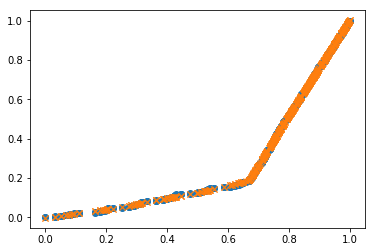

In [247]:
plt.plot(xs_n, ys_n, 'o')
plt.plot(xs_n, model(cuda(to.Tensor([xs_n]).view(-1, 1))).cpu().detach().numpy(), 'x')
plt.show()

In [256]:
float(loss_fn(
    model(cuda(to.Tensor([xs_n]).view(-1, 1))),
    cuda(to.Tensor([ys_n]).type(to.FloatTensor).view(-1, 1))
).data[0])

/home/ubuntu/.pyenv/versions/3.6.1/envs/ihor/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  after removing the cwd from sys.path.


0.02206496335566044

In [259]:
xs_n[777], float(model(cuda(to.Tensor([xs_n[777]]))).cpu()[0]) * np.max(ys)

(0.9438992779114979, 778.0415011644363)

In [294]:
from sklearn import svm
clf = svm.SVR('poly', C=2.0)
# clf = svm.SVR('sigmoid')
# ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
clf.fit(xs_n.reshape(-1, 1), ys_n.reshape(-1, 1)) 
clf.predict(xs_n[10]) * np.max(ys)

/home/ubuntu/.pyenv/versions/3.6.1/envs/ihor/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([13.12396071])

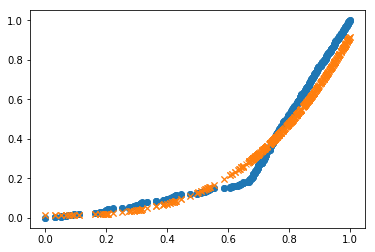

In [295]:
ys_srv = clf.predict(xs_n.reshape(-1,1))
plt.plot(xs_n, ys_n, 'o')
plt.plot(xs_n, ys_srv, 'x')
plt.show()

In [261]:
# import sklearn

In [262]:
# from sklearn import datasets, linear_model

In [263]:
# regr = linear_model.LinearRegression()


In [264]:
# regr.fit(xsn.reshape(-1, 1), ys.reshape(-1, 1))

# # Make predictions using the testing set
# diabetes_y_pred = regr.predict(xsn.reshape(-1, 1))

In [265]:
# plt.plot(xsn, ys, 'o')
# plt.plot(xsn, diabetes_y_pred, 'x')
# plt.show()